In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# This is the library for the Reservoir Computing got it by: https://github.com/cknd/pyESN
%matplotlib inline

In [14]:
#https://github.com/NRT23/Bayesian-Neural-Networks-Variational-Inference-and-MC-Dropout
#https://github.com/huyng/incertae
import os
os.chdir("C:\Users\SUJAN\OneDrive\Documents\Energies\EP2")
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
import numpy
from sklearn.neural_network import *
from pandas import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.tree import *
from sklearn.preprocessing import *
import tensorflow.keras.backend as K
import numpy as np
from tensorflow.keras.models import *
from scipy.ndimage import gaussian_filter1d
import seaborn as sns
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tqdm import tqdm
from sklearn.metrics import *
import TSMETRICS
from tensorflow.keras.layers import *
from tensorflow.keras.layers import *
import time
import optuna
from optuna.study import *
from optuna.trial import *
import math
import datetime
import PIALL
import tensorflow as tf

from tensorflow.keras import initializers 


In [15]:
df= pd.read_excel('1D.xlsx',sheet_name='1D')
data = df.filter(["Cornubia"])
df1=data.dropna()


In [16]:
df1

,Cornubia
0,256.24435
1,237.21017
2,242.90308
3,242.07736
4,250.59495
...,...
3648,241.15000
3649,199.91000
3650,227.13000
3651,220.72000


In [17]:
df2=df1
lag =range(1,19)

for col in df2.columns:
    for l in lag:
        df2.loc[:,col+"_"+str(l)] = df2[col].shift(l)

In [18]:
df2

,Cornubia,Cornubia_1,Cornubia_2,Cornubia_3,Cornubia_4,Cornubia_5,Cornubia_6,Cornubia_7,Cornubia_8,Cornubia_9,Cornubia_10,Cornubia_11,Cornubia_12,Cornubia_13,Cornubia_14,Cornubia_15,Cornubia_16,Cornubia_17,Cornubia_18
0,256.24435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,237.21017,256.24435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,242.90308,237.21017,256.24435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,242.07736,242.90308,237.21017,256.24435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,250.59495,242.07736,242.90308,237.21017,256.24435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,241.15000,243.83000,222.60000,233.73000,202.64000,208.60,202.20,202.79,204.40,190.15,219.74,249.57,239.79,202.75,203.23,232.43,236.35,232.78,218.24
3649,199.91000,241.15000,243.83000,222.60000,233.73000,202.64,208.60,202.20,202.79,204.40,190.15,219.74,249.57,239.79,202.75,203.23,232.43,236.35,232.78
3650,227.13000,199.91000,241.15000,243.83000,222.60000,233.73,202.64,208.60,202.20,202.79,204.40,190.15,219.74,249.57,239.79,202.75,203.23,232.43,236.35
3651,220.72000,227.13000,199.91000,241.15000,243.83000,222.60,233.73,202.64,208.60,202.20,202.79,204.40,190.15,219.74,249.57,239.79,202.75,203.23,232.43


In [19]:
df_A= pd.read_excel('1D.xlsx',sheet_name='SILO_Cornubia')
df_A

,YYYY-MM-DD,daily_rain,max_temp,min_temp,vp,vp_deficit,evap_pan,evap_syn,evap_comb,evap_morton_lake,radiation,rh_tmax,rh_tmin,et_short_crop,et_tall_crop,et_morton_actual,et_morton_potential,et_morton_wet
0,2011-07-01,1.0,20.6,10.7,13.0,7.8,2.3,2.6,2.3,2.2,13.0,53.6,100.0,2.0,2.8,1.2,3.2,2.2
1,2011-07-02,0.1,21.0,9.8,14.0,6.9,2.3,2.3,2.3,1.8,11.2,56.3,100.0,1.8,2.4,1.3,2.4,1.8
2,2011-07-03,0.1,20.4,11.0,13.5,7.2,1.6,2.2,1.6,1.8,10.7,56.4,100.0,1.9,2.5,0.9,2.7,1.8
3,2011-07-04,0.0,24.1,10.0,13.8,10.4,1.6,3.0,1.6,2.8,15.1,46.0,100.0,2.5,3.4,1.7,3.9,2.8
4,2011-07-05,0.0,23.2,10.4,13.8,9.6,2.8,2.9,2.8,2.8,15.0,48.5,100.0,2.4,3.2,1.7,3.8,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2021-06-26,1.8,17.9,15.5,15.3,4.4,2.0,1.2,2.0,1.3,4.4,74.6,86.9,1.3,1.8,0.7,1.9,1.3
3649,2021-06-27,0.1,21.4,7.6,10.4,10.2,2.8,2.6,2.8,1.9,12.2,40.8,99.7,2.3,3.4,0.5,3.4,1.9
3650,2021-06-28,0.0,21.3,7.6,12.0,8.5,2.0,2.6,2.0,2.2,13.2,47.4,100.0,2.1,2.9,1.2,3.1,2.2
3651,2021-06-29,0.6,21.1,9.5,15.3,5.6,1.2,2.3,1.2,1.9,11.4,61.2,100.0,1.6,2.0,1.8,1.9,1.9


In [20]:
df_B=df_A.drop(['YYYY-MM-DD'], axis=1)
df_B

,daily_rain,max_temp,min_temp,vp,vp_deficit,evap_pan,evap_syn,evap_comb,evap_morton_lake,radiation,rh_tmax,rh_tmin,et_short_crop,et_tall_crop,et_morton_actual,et_morton_potential,et_morton_wet
0,1.0,20.6,10.7,13.0,7.8,2.3,2.6,2.3,2.2,13.0,53.6,100.0,2.0,2.8,1.2,3.2,2.2
1,0.1,21.0,9.8,14.0,6.9,2.3,2.3,2.3,1.8,11.2,56.3,100.0,1.8,2.4,1.3,2.4,1.8
2,0.1,20.4,11.0,13.5,7.2,1.6,2.2,1.6,1.8,10.7,56.4,100.0,1.9,2.5,0.9,2.7,1.8
3,0.0,24.1,10.0,13.8,10.4,1.6,3.0,1.6,2.8,15.1,46.0,100.0,2.5,3.4,1.7,3.9,2.8
4,0.0,23.2,10.4,13.8,9.6,2.8,2.9,2.8,2.8,15.0,48.5,100.0,2.4,3.2,1.7,3.8,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,1.8,17.9,15.5,15.3,4.4,2.0,1.2,2.0,1.3,4.4,74.6,86.9,1.3,1.8,0.7,1.9,1.3
3649,0.1,21.4,7.6,10.4,10.2,2.8,2.6,2.8,1.9,12.2,40.8,99.7,2.3,3.4,0.5,3.4,1.9
3650,0.0,21.3,7.6,12.0,8.5,2.0,2.6,2.0,2.2,13.2,47.4,100.0,2.1,2.9,1.2,3.1,2.2
3651,0.6,21.1,9.5,15.3,5.6,1.2,2.3,1.2,1.9,11.4,61.2,100.0,1.6,2.0,1.8,1.9,1.9


In [21]:
df_C=pd.concat([df2, df_B], axis=1, join='inner')
df_C

,Cornubia,Cornubia_1,Cornubia_2,Cornubia_3,Cornubia_4,Cornubia_5,Cornubia_6,Cornubia_7,Cornubia_8,Cornubia_9,...,evap_comb,evap_morton_lake,radiation,rh_tmax,rh_tmin,et_short_crop,et_tall_crop,et_morton_actual,et_morton_potential,et_morton_wet
0,256.24435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.3,2.2,13.0,53.6,100.0,2.0,2.8,1.2,3.2,2.2
1,237.21017,256.24435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.3,1.8,11.2,56.3,100.0,1.8,2.4,1.3,2.4,1.8
2,242.90308,237.21017,256.24435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6,1.8,10.7,56.4,100.0,1.9,2.5,0.9,2.7,1.8
3,242.07736,242.90308,237.21017,256.24435,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6,2.8,15.1,46.0,100.0,2.5,3.4,1.7,3.9,2.8
4,250.59495,242.07736,242.90308,237.21017,256.24435,NaN,NaN,NaN,NaN,NaN,...,2.8,2.8,15.0,48.5,100.0,2.4,3.2,1.7,3.8,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,241.15000,243.83000,222.60000,233.73000,202.64000,208.60,202.20,202.79,204.40,190.15,...,2.0,1.3,4.4,74.6,86.9,1.3,1.8,0.7,1.9,1.3
3649,199.91000,241.15000,243.83000,222.60000,233.73000,202.64,208.60,202.20,202.79,204.40,...,2.8,1.9,12.2,40.8,99.7,2.3,3.4,0.5,3.4,1.9
3650,227.13000,199.91000,241.15000,243.83000,222.60000,233.73,202.64,208.60,202.20,202.79,...,2.0,2.2,13.2,47.4,100.0,2.1,2.9,1.2,3.1,2.2
3651,220.72000,227.13000,199.91000,241.15000,243.83000,222.60,233.73,202.64,208.60,202.20,...,1.2,1.9,11.4,61.2,100.0,1.6,2.0,1.8,1.9,1.9


In [22]:
df5=df_C.dropna()
df5

,Cornubia,Cornubia_1,Cornubia_2,Cornubia_3,Cornubia_4,Cornubia_5,Cornubia_6,Cornubia_7,Cornubia_8,Cornubia_9,...,evap_comb,evap_morton_lake,radiation,rh_tmax,rh_tmin,et_short_crop,et_tall_crop,et_morton_actual,et_morton_potential,et_morton_wet
18,275.30027,267.04339,252.78955,273.30123,272.25824,270.30271,289.11959,288.53296,290.90134,277.06029,...,2.6,2.9,16.1,44.8,99.0,2.5,3.4,1.5,4.2,2.9
19,291.37938,275.30027,267.04339,252.78955,273.30123,272.25824,270.30271,289.11959,288.53296,290.90134,...,1.8,2.7,16.2,37.6,97.0,2.6,3.7,1.1,4.4,2.7
20,265.30515,291.37938,275.30027,267.04339,252.78955,273.30123,272.25824,270.30271,289.11959,288.53296,...,2.8,3.0,16.3,40.2,100.0,2.8,3.9,1.5,4.5,3.0
21,255.57083,265.30515,291.37938,275.30027,267.04339,252.78955,273.30123,272.25824,270.30271,289.11959,...,2.8,2.8,15.7,39.8,90.6,2.8,3.9,0.9,4.8,2.8
22,243.18552,255.57083,265.30515,291.37938,275.30027,267.04339,252.78955,273.30123,272.25824,270.30271,...,2.6,2.7,15.8,43.6,100.0,2.5,3.4,1.5,4.0,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,241.15000,243.83000,222.60000,233.73000,202.64000,208.60000,202.20000,202.79000,204.40000,190.15000,...,2.0,1.3,4.4,74.6,86.9,1.3,1.8,0.7,1.9,1.3
3649,199.91000,241.15000,243.83000,222.60000,233.73000,202.64000,208.60000,202.20000,202.79000,204.40000,...,2.8,1.9,12.2,40.8,99.7,2.3,3.4,0.5,3.4,1.9
3650,227.13000,199.91000,241.15000,243.83000,222.60000,233.73000,202.64000,208.60000,202.20000,202.79000,...,2.0,2.2,13.2,47.4,100.0,2.1,2.9,1.2,3.1,2.2
3651,220.72000,227.13000,199.91000,241.15000,243.83000,222.60000,233.73000,202.64000,208.60000,202.20000,...,1.2,1.9,11.4,61.2,100.0,1.6,2.0,1.8,1.9,1.9


In [23]:
df6=df5
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
column_names_to_not_normalize = ['Cornubia']
column_names_to_normalize = [x for x in list(df6) if x not in column_names_to_not_normalize ]
x = df6[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df6.index)
df6[column_names_to_normalize] = df_temp

In [24]:
df6

,Cornubia,Cornubia_1,Cornubia_2,Cornubia_3,Cornubia_4,Cornubia_5,Cornubia_6,Cornubia_7,Cornubia_8,Cornubia_9,...,evap_comb,evap_morton_lake,radiation,rh_tmax,rh_tmin,et_short_crop,et_tall_crop,et_morton_actual,et_morton_potential,et_morton_wet
18,275.30027,0.723527,0.680158,0.742567,0.739394,0.733444,0.790696,0.788912,0.796118,0.754005,...,0.092199,0.272727,0.452381,0.393728,0.984615,0.230769,0.259615,0.180723,0.276923,0.270588
19,291.37938,0.748649,0.723527,0.680158,0.742567,0.739394,0.733444,0.790696,0.788912,0.796118,...,0.063830,0.250000,0.455782,0.310105,0.953846,0.243590,0.288462,0.132530,0.292308,0.247059
20,265.30515,0.797572,0.748649,0.723527,0.680158,0.742567,0.739394,0.733444,0.790696,0.788912,...,0.099291,0.284091,0.459184,0.340302,1.000000,0.269231,0.307692,0.180723,0.300000,0.282353
21,255.57083,0.718238,0.797572,0.748649,0.723527,0.680158,0.742567,0.739394,0.733444,0.790696,...,0.099291,0.261364,0.438776,0.335656,0.855385,0.269231,0.307692,0.108434,0.323077,0.258824
22,243.18552,0.688620,0.718238,0.797572,0.748649,0.723527,0.680158,0.742567,0.739394,0.733444,...,0.092199,0.250000,0.442177,0.379791,1.000000,0.230769,0.259615,0.180723,0.261538,0.247059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,241.15000,0.652897,0.588302,0.622167,0.527571,0.545705,0.526233,0.528028,0.532926,0.489569,...,0.070922,0.090909,0.054422,0.739837,0.798462,0.076923,0.105769,0.084337,0.100000,0.082353
3649,199.91000,0.644743,0.652897,0.588302,0.622167,0.527571,0.545705,0.526233,0.528028,0.532926,...,0.099291,0.159091,0.319728,0.347271,0.995385,0.205128,0.259615,0.060241,0.215385,0.152941
3650,227.13000,0.519265,0.644743,0.652897,0.588302,0.622167,0.527571,0.545705,0.526233,0.528028,...,0.070922,0.193182,0.353741,0.423926,1.000000,0.179487,0.211538,0.144578,0.192308,0.188235
3651,220.72000,0.602085,0.519265,0.644743,0.652897,0.588302,0.622167,0.527571,0.545705,0.526233,...,0.042553,0.159091,0.292517,0.584204,1.000000,0.115385,0.125000,0.216867,0.100000,0.152941


In [25]:
Train=df6.iloc[0:3270,0:36]
Test=df6.iloc[3270:,0:36]

In [26]:
array=Train.values
X1=array[:,1:36]
y1=array[:,0]
time_steps= 1
X_train= np.zeros((X1.shape[0] - time_steps +1, 1, X1.shape[1]))
y_train= np.zeros((y1.shape[0] -time_steps +1,))
for ix in range(X_train.shape[0]):
    for jx in range(time_steps):
        X_train[ix, jx, :]= X1[ix +jx, :]
    y_train[ix]= y1[ix + time_steps -1]
print (X_train.shape, y_train.shape)
array3=Test.values
X1=array3[:,1:36]
y1=array3[:,0]
time_steps= 1
X_test= np.zeros((X1.shape[0] - time_steps +1, 1, X1.shape[1]))
y_test= np.zeros((y1.shape[0] -time_steps +1,))
for ix in range(X_test.shape[0]):
    for jx in range(time_steps):
        X_test[ix, jx, :]= X1[ix +jx, :]
    y_test[ix]= y1[ix + time_steps -1]
print (X_test.shape, y_test.shape)


(3270, 1, 35) (3270,)
(365, 1, 35) (365,)


In [27]:
import time
import optuna
from optuna.study import *
from optuna.trial import *
import math
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
import datetime
path_best_model = 'CNNBLSTM_OPTUNA_Cornubia.h5'
best_score=0

X_train_shape = X_train.shape
TimeSteps=X_train_shape[1]
Dims=X_train_shape[2]

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

def model_learning_curve(history):
    """
    This function plots a training and testing loss
    """
    
    # Loss with Epoch
    plt.figure('16,6')
    plt.title('Model Loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


def callbacks():
    DNN_lr_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                         patience=8, verbose=2, factor=0.7,min_delta = 1e-04, cooldown = 0,min_lr =0)
    callbacks = [EarlyStopping(monitor='val_loss', patience=20),
                 ModelCheckpoint(filepath='best_weights_CELM_Kalbar_OPT_SILO.h5',verbose=2,
                                 monitor='val_loss', save_best_only=True),DNN_lr_reduction]
    return callbacks
callbacks_list = callbacks()   

In [28]:
def objective(trial):
        
    inputs = Input(shape=(TimeSteps, Dims))
    x=Conv1D(
            filters=trial.suggest_int('filters1', 10, 1000, 10),
            kernel_size=trial.suggest_int('kernel_size',2,20,step=2),
            activation=trial.suggest_categorical('activation1', ['relu', 'tanh']),
            padding='same',kernel_initializer="glorot_uniform")(inputs)
    x1=Conv1D(
            filters=trial.suggest_int('filters2', 10, 800, 10),
            kernel_size=1,
            activation=trial.suggest_categorical('activation2', ['relu', 'tanh']),
            padding='same',kernel_initializer="glorot_uniform")(x)
    x2=Conv1D(
            filters=trial.suggest_int('filters3', 10, 800, 10),
            kernel_size=1,
            activation=trial.suggest_categorical('activation3', ['relu', 'tanh']),
            padding='same',kernel_initializer="glorot_uniform")(x1)

    Flatten_=Flatten(data_format=None,name='FLATTEN')(x2)
    x3= Dense(10, activation='sigmoid')(Flatten_ )
    output = Dense(1, activation='sigmoid')(x3 )
    model = Model(inputs=[inputs], outputs=output)   
    optimizer_name = trial.suggest_categorical('optimizer_name', ['Adam', 'RMSprop'])

    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=trial.suggest_float('learning_rate',  1e-6, 1e-2, log=True))
    else:
        optimizer = RMSprop(
            learning_rate=trial.suggest_float('learning_rate',  1e-6, 1e-2, log=True),
            momentum=trial.suggest_float('momentum',  0.1, 0.9, log=True),
        )    
        
    # We compile our model with a sampled learning rate.
    model.compile(loss=root_mean_squared_error, optimizer=optimizer,metrics='mse')
    history=model.fit(
        X_train,
        y_train,
        shuffle=False,
        batch_size=trial.suggest_int('batch_size', 1, 20, 1),
        epochs=500,
        validation_split=0.2,
        verbose=2,
        callbacks=callbacks_list
    )

    # Evaluate the model accuracy on the test set.
    YP = model.predict(X_test)
    YT=y_test
    score=root_mean_squared_error(YT.flatten(),YP.flatten())
    model_learning_curve(history)
    return score

[I 2022-05-25 20:18:19,847] A new study created in memory with name: cnn_study_Kalbar_Opt_SILO


Epoch 1/500

Epoch 00001: val_loss improved from inf to 173.23648, saving model to best_weights_CELM_Kalbar_OPT_SILO.h5
238/238 - 2s - loss: 136.2063 - mse: 19214.3477 - val_loss: 173.2365 - val_mse: 30921.5605 - lr: 1.2751e-05 - 2s/epoch - 6ms/step
Epoch 2/500

Epoch 00002: val_loss improved from 173.23648 to 173.21797, saving model to best_weights_CELM_Kalbar_OPT_SILO.h5
238/238 - 1s - loss: 136.1532 - mse: 19200.6348 - val_loss: 173.2180 - val_mse: 30915.1777 - lr: 1.2751e-05 - 965ms/epoch - 4ms/step
Epoch 3/500

Epoch 00003: val_loss improved from 173.21797 to 173.20398, saving model to best_weights_CELM_Kalbar_OPT_SILO.h5
238/238 - 1s - loss: 136.1370 - mse: 19196.2539 - val_loss: 173.2040 - val_mse: 30910.3418 - lr: 1.2751e-05 - 974ms/epoch - 4ms/step
Epoch 4/500

Epoch 00004: val_loss improved from 173.20398 to 173.19200, saving model to best_weights_CELM_Kalbar_OPT_SILO.h5
238/238 - 1s - loss: 136.1240 - mse: 19192.7305 - val_loss: 173.1920 - val_mse: 30906.1895 - lr: 1.2751e-0

Epoch 33/500

Epoch 00033: val_loss improved from 173.09158 to 173.09119, saving model to best_weights_CELM_Kalbar_OPT_SILO.h5
238/238 - 1s - loss: 136.0171 - mse: 19163.7422 - val_loss: 173.0912 - val_mse: 30871.2852 - lr: 1.2751e-05 - 1s/epoch - 5ms/step
Epoch 34/500

Epoch 00034: val_loss improved from 173.09119 to 173.09085, saving model to best_weights_CELM_Kalbar_OPT_SILO.h5
238/238 - 1s - loss: 136.0168 - mse: 19163.6250 - val_loss: 173.0909 - val_mse: 30871.1680 - lr: 1.2751e-05 - 1s/epoch - 4ms/step
Epoch 35/500

Epoch 00035: val_loss improved from 173.09085 to 173.09055, saving model to best_weights_CELM_Kalbar_OPT_SILO.h5
238/238 - 1s - loss: 136.0165 - mse: 19163.5449 - val_loss: 173.0905 - val_mse: 30871.0605 - lr: 1.2751e-05 - 957ms/epoch - 4ms/step
Epoch 36/500

Epoch 00036: val_loss improved from 173.09055 to 173.09027, saving model to best_weights_CELM_Kalbar_OPT_SILO.h5
238/238 - 1s - loss: 136.0162 - mse: 19163.4688 - val_loss: 173.0903 - val_mse: 30870.9668 - lr: 1.

Epoch 66/500

Epoch 00066: val_loss improved from 173.08844 to 173.08842, saving model to best_weights_CELM_Kalbar_OPT_SILO.h5
238/238 - 1s - loss: 136.0142 - mse: 19162.9336 - val_loss: 173.0884 - val_mse: 30870.3281 - lr: 1.2751e-05 - 1s/epoch - 4ms/step
Epoch 67/500

Epoch 00067: val_loss did not improve from 173.08842

Epoch 00067: ReduceLROnPlateau reducing learning rate to 8.926034388423431e-06.
238/238 - 1s - loss: 136.0142 - mse: 19162.9336 - val_loss: 173.0884 - val_mse: 30870.3281 - lr: 1.2751e-05 - 872ms/epoch - 4ms/step
Epoch 68/500

Epoch 00068: val_loss did not improve from 173.08842
238/238 - 1s - loss: 136.0142 - mse: 19162.9336 - val_loss: 173.0884 - val_mse: 30870.3281 - lr: 8.9260e-06 - 886ms/epoch - 4ms/step
Epoch 69/500

Epoch 00069: val_loss improved from 173.08842 to 173.08841, saving model to best_weights_CELM_Kalbar_OPT_SILO.h5
238/238 - 1s - loss: 136.0142 - mse: 19162.9297 - val_loss: 173.0884 - val_mse: 30870.3203 - lr: 8.9260e-06 - 923ms/epoch - 4ms/step
Ep

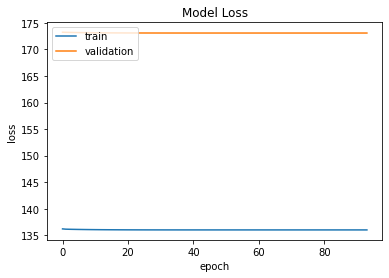

[I 2022-05-25 20:19:51,772] Trial 0 finished with value: 158.44553580773152 and parameters: {'filters1': 550, 'kernel_size': 10, 'activation1': 'tanh', 'filters2': 520, 'activation2': 'tanh', 'filters3': 40, 'activation3': 'tanh', 'optimizer_name': 'RMSprop', 'learning_rate': 1.2751477875257103e-05, 'momentum': 0.7641972134766826, 'batch_size': 11}. Best is trial 0 with value: 158.44553580773152.


Epoch 1/500

Epoch 00001: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.4668 - mse: 19285.8691 - val_loss: 173.5093 - val_mse: 31015.8809 - lr: 2.1125e-06 - 2s/epoch - 9ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.4166 - mse: 19271.9297 - val_loss: 173.4515 - val_mse: 30995.4805 - lr: 2.1125e-06 - 2s/epoch - 8ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.3640 - mse: 19257.3555 - val_loss: 173.3951 - val_mse: 30975.7500 - lr: 2.1125e-06 - 2s/epoch - 7ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.3127 - mse: 19243.3008 - val_loss: 173.3465 - val_mse: 30958.9512 - lr: 2.1125e-06 - 2s/epoch - 7ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.2686 - mse: 19231.3906 - val_loss: 173.3100 - val_mse: 30946.4863 - lr: 2.1125e-06 - 2s/epoch - 7ms/step
Epoch 6/500

Epoch 0

Epoch 43/500

Epoch 00043: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.1506 - mse: 19200.0430 - val_loss: 173.2242 - val_mse: 30917.3574 - lr: 2.1125e-06 - 2s/epoch - 8ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.1501 - mse: 19199.8906 - val_loss: 173.2237 - val_mse: 30917.1719 - lr: 2.1125e-06 - 2s/epoch - 8ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.1496 - mse: 19199.7578 - val_loss: 173.2231 - val_mse: 30916.9883 - lr: 2.1125e-06 - 2s/epoch - 8ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.1490 - mse: 19199.6094 - val_loss: 173.2226 - val_mse: 30916.8008 - lr: 2.1125e-06 - 2s/epoch - 8ms/step
Epoch 47/500

Epoch 00047: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.1485 - mse: 19199.4609 - val_loss: 173.2221 - val_mse: 30916.6211 - lr: 2.1125e-06 - 2s/epoch - 8ms/step
Epoch 48/500

E

Epoch 85/500

Epoch 00085: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.1299 - mse: 19194.3984 - val_loss: 173.2036 - val_mse: 30910.2324 - lr: 2.1125e-06 - 2s/epoch - 7ms/step
Epoch 86/500

Epoch 00086: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.1294 - mse: 19194.2754 - val_loss: 173.2032 - val_mse: 30910.0762 - lr: 2.1125e-06 - 2s/epoch - 7ms/step
Epoch 87/500

Epoch 00087: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.1289 - mse: 19194.1504 - val_loss: 173.2027 - val_mse: 30909.9121 - lr: 2.1125e-06 - 2s/epoch - 8ms/step
Epoch 88/500

Epoch 00088: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.1286 - mse: 19194.0273 - val_loss: 173.2023 - val_mse: 30909.7637 - lr: 2.1125e-06 - 2s/epoch - 7ms/step
Epoch 89/500

Epoch 00089: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.1281 - mse: 19193.9043 - val_loss: 173.2018 - val_mse: 30909.6113 - lr: 2.1125e-06 - 2s/epoch - 7ms/step
Epoch 90/500

E

Epoch 127/500

Epoch 00127: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.1120 - mse: 19189.5586 - val_loss: 173.1860 - val_mse: 30904.1074 - lr: 2.1125e-06 - 2s/epoch - 10ms/step
Epoch 128/500

Epoch 00128: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.1117 - mse: 19189.4512 - val_loss: 173.1855 - val_mse: 30903.9688 - lr: 2.1125e-06 - 2s/epoch - 10ms/step
Epoch 129/500

Epoch 00129: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.1113 - mse: 19189.3496 - val_loss: 173.1852 - val_mse: 30903.8320 - lr: 2.1125e-06 - 2s/epoch - 10ms/step
Epoch 130/500

Epoch 00130: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.1109 - mse: 19189.2383 - val_loss: 173.1848 - val_mse: 30903.7012 - lr: 2.1125e-06 - 2s/epoch - 10ms/step
Epoch 131/500

Epoch 00131: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.1105 - mse: 19189.1309 - val_loss: 173.1844 - val_mse: 30903.5625 - lr: 2.1125e-06 - 2s/epoch - 10ms/step
Epoch

Epoch 169/500

Epoch 00169: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.0968 - mse: 19185.3984 - val_loss: 173.1707 - val_mse: 30898.8340 - lr: 2.1125e-06 - 2s/epoch - 10ms/step
Epoch 170/500

Epoch 00170: val_loss did not improve from 173.08838
238/238 - 3s - loss: 136.0964 - mse: 19185.3203 - val_loss: 173.1704 - val_mse: 30898.7129 - lr: 2.1125e-06 - 3s/epoch - 11ms/step
Epoch 171/500

Epoch 00171: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.0961 - mse: 19185.2207 - val_loss: 173.1701 - val_mse: 30898.6094 - lr: 2.1125e-06 - 2s/epoch - 10ms/step
Epoch 172/500

Epoch 00172: val_loss did not improve from 173.08838
238/238 - 3s - loss: 136.0958 - mse: 19185.1328 - val_loss: 173.1697 - val_mse: 30898.4824 - lr: 2.1125e-06 - 3s/epoch - 11ms/step
Epoch 173/500

Epoch 00173: val_loss did not improve from 173.08838
238/238 - 2s - loss: 136.0955 - mse: 19185.0391 - val_loss: 173.1694 - val_mse: 30898.3828 - lr: 2.1125e-06 - 2s/epoch - 10ms/step
Epoch

Epoch 211/500

Epoch 00211: val_loss did not improve from 173.08838
238/238 - 3s - loss: 136.0837 - mse: 19181.8516 - val_loss: 173.1577 - val_mse: 30894.3242 - lr: 2.1125e-06 - 3s/epoch - 14ms/step
Epoch 212/500

Epoch 00212: val_loss did not improve from 173.08838
238/238 - 3s - loss: 136.0834 - mse: 19181.7676 - val_loss: 173.1575 - val_mse: 30894.2266 - lr: 2.1125e-06 - 3s/epoch - 14ms/step
Epoch 213/500

Epoch 00213: val_loss did not improve from 173.08838
238/238 - 3s - loss: 136.0831 - mse: 19181.6992 - val_loss: 173.1572 - val_mse: 30894.1230 - lr: 2.1125e-06 - 3s/epoch - 14ms/step
Epoch 214/500

Epoch 00214: val_loss did not improve from 173.08838
238/238 - 3s - loss: 136.0829 - mse: 19181.6172 - val_loss: 173.1569 - val_mse: 30894.0273 - lr: 2.1125e-06 - 3s/epoch - 14ms/step
Epoch 215/500

Epoch 00215: val_loss did not improve from 173.08838
238/238 - 3s - loss: 136.0826 - mse: 19181.5449 - val_loss: 173.1566 - val_mse: 30893.9395 - lr: 2.1125e-06 - 3s/epoch - 13ms/step
Epoch

Epoch 253/500

Epoch 00253: val_loss did not improve from 173.08838
238/238 - 4s - loss: 136.0726 - mse: 19178.8223 - val_loss: 173.1467 - val_mse: 30890.4805 - lr: 2.1125e-06 - 4s/epoch - 15ms/step
Epoch 254/500

Epoch 00254: val_loss did not improve from 173.08838
238/238 - 4s - loss: 136.0723 - mse: 19178.7637 - val_loss: 173.1464 - val_mse: 30890.4102 - lr: 2.1125e-06 - 4s/epoch - 15ms/step
Epoch 255/500

Epoch 00255: val_loss did not improve from 173.08838
238/238 - 3s - loss: 136.0721 - mse: 19178.6816 - val_loss: 173.1461 - val_mse: 30890.3184 - lr: 2.1125e-06 - 3s/epoch - 14ms/step
Epoch 256/500

Epoch 00256: val_loss did not improve from 173.08838
238/238 - 3s - loss: 136.0719 - mse: 19178.6250 - val_loss: 173.1459 - val_mse: 30890.2324 - lr: 2.1125e-06 - 3s/epoch - 13ms/step
Epoch 257/500

Epoch 00257: val_loss did not improve from 173.08838
238/238 - 3s - loss: 136.0717 - mse: 19178.5586 - val_loss: 173.1457 - val_mse: 30890.1504 - lr: 2.1125e-06 - 3s/epoch - 13ms/step
Epoch

Epoch 295/500

Epoch 00295: val_loss did not improve from 173.08838
238/238 - 5s - loss: 136.0631 - mse: 19176.2441 - val_loss: 173.1372 - val_mse: 30887.2266 - lr: 2.1125e-06 - 5s/epoch - 20ms/step
Epoch 296/500

Epoch 00296: val_loss did not improve from 173.08838
238/238 - 5s - loss: 136.0630 - mse: 19176.1934 - val_loss: 173.1370 - val_mse: 30887.1562 - lr: 2.1125e-06 - 5s/epoch - 22ms/step
Epoch 297/500

Epoch 00297: val_loss did not improve from 173.08838
238/238 - 5s - loss: 136.0628 - mse: 19176.1367 - val_loss: 173.1368 - val_mse: 30887.0762 - lr: 2.1125e-06 - 5s/epoch - 20ms/step
Epoch 298/500

Epoch 00298: val_loss did not improve from 173.08838
238/238 - 4s - loss: 136.0625 - mse: 19176.0918 - val_loss: 173.1366 - val_mse: 30887.0176 - lr: 2.1125e-06 - 4s/epoch - 18ms/step
Epoch 299/500

Epoch 00299: val_loss did not improve from 173.08838
238/238 - 4s - loss: 136.0623 - mse: 19176.0312 - val_loss: 173.1364 - val_mse: 30886.9414 - lr: 2.1125e-06 - 4s/epoch - 16ms/step
Epoch

Epoch 337/500

Epoch 00337: val_loss did not improve from 173.08838
238/238 - 4s - loss: 136.0551 - mse: 19174.0801 - val_loss: 173.1293 - val_mse: 30884.4688 - lr: 2.1125e-06 - 4s/epoch - 18ms/step
Epoch 338/500

Epoch 00338: val_loss did not improve from 173.08838
238/238 - 5s - loss: 136.0550 - mse: 19174.0312 - val_loss: 173.1291 - val_mse: 30884.4121 - lr: 2.1125e-06 - 5s/epoch - 20ms/step
Epoch 339/500

Epoch 00339: val_loss did not improve from 173.08838
238/238 - 5s - loss: 136.0548 - mse: 19173.9785 - val_loss: 173.1289 - val_mse: 30884.3516 - lr: 2.1125e-06 - 5s/epoch - 20ms/step
Epoch 340/500

Epoch 00340: val_loss did not improve from 173.08838
238/238 - 4s - loss: 136.0546 - mse: 19173.9316 - val_loss: 173.1287 - val_mse: 30884.2910 - lr: 2.1125e-06 - 4s/epoch - 19ms/step
Epoch 341/500

Epoch 00341: val_loss did not improve from 173.08838
238/238 - 5s - loss: 136.0545 - mse: 19173.8906 - val_loss: 173.1286 - val_mse: 30884.2285 - lr: 2.1125e-06 - 5s/epoch - 20ms/step
Epoch

Epoch 379/500

Epoch 00379: val_loss did not improve from 173.08838
238/238 - 5s - loss: 136.0484 - mse: 19172.2500 - val_loss: 173.1226 - val_mse: 30882.1367 - lr: 2.1125e-06 - 5s/epoch - 19ms/step
Epoch 380/500

Epoch 00380: val_loss did not improve from 173.08838
238/238 - 5s - loss: 136.0483 - mse: 19172.2051 - val_loss: 173.1224 - val_mse: 30882.0977 - lr: 2.1125e-06 - 5s/epoch - 19ms/step
Epoch 381/500

Epoch 00381: val_loss did not improve from 173.08838
238/238 - 5s - loss: 136.0481 - mse: 19172.1660 - val_loss: 173.1223 - val_mse: 30882.0391 - lr: 2.1125e-06 - 5s/epoch - 22ms/step
Epoch 382/500

Epoch 00382: val_loss did not improve from 173.08838
238/238 - 5s - loss: 136.0480 - mse: 19172.1289 - val_loss: 173.1221 - val_mse: 30881.9961 - lr: 2.1125e-06 - 5s/epoch - 21ms/step
Epoch 383/500

Epoch 00383: val_loss did not improve from 173.08838
238/238 - 4s - loss: 136.0479 - mse: 19172.0859 - val_loss: 173.1219 - val_mse: 30881.9414 - lr: 2.1125e-06 - 4s/epoch - 19ms/step
Epoch

Epoch 421/500

Epoch 00421: val_loss did not improve from 173.08838
238/238 - 5s - loss: 136.0428 - mse: 19170.7031 - val_loss: 173.1169 - val_mse: 30880.1797 - lr: 2.1125e-06 - 5s/epoch - 20ms/step
Epoch 422/500

Epoch 00422: val_loss did not improve from 173.08838
238/238 - 5s - loss: 136.0427 - mse: 19170.6777 - val_loss: 173.1168 - val_mse: 30880.1445 - lr: 2.1125e-06 - 5s/epoch - 19ms/step
Epoch 423/500

Epoch 00423: val_loss did not improve from 173.08838
238/238 - 4s - loss: 136.0425 - mse: 19170.6426 - val_loss: 173.1167 - val_mse: 30880.1016 - lr: 2.1125e-06 - 4s/epoch - 18ms/step
Epoch 424/500

Epoch 00424: val_loss did not improve from 173.08838
238/238 - 5s - loss: 136.0424 - mse: 19170.6016 - val_loss: 173.1165 - val_mse: 30880.0645 - lr: 2.1125e-06 - 5s/epoch - 20ms/step
Epoch 425/500

Epoch 00425: val_loss did not improve from 173.08838
238/238 - 5s - loss: 136.0423 - mse: 19170.5625 - val_loss: 173.1164 - val_mse: 30880.0254 - lr: 2.1125e-06 - 5s/epoch - 20ms/step
Epoch

Epoch 463/500

Epoch 00463: val_loss did not improve from 173.08838
238/238 - 5s - loss: 136.0379 - mse: 19169.4062 - val_loss: 173.1121 - val_mse: 30878.5312 - lr: 2.1125e-06 - 5s/epoch - 19ms/step
Epoch 464/500

Epoch 00464: val_loss did not improve from 173.08838
238/238 - 5s - loss: 136.0378 - mse: 19169.3789 - val_loss: 173.1120 - val_mse: 30878.5078 - lr: 2.1125e-06 - 5s/epoch - 21ms/step
Epoch 465/500

Epoch 00465: val_loss did not improve from 173.08838
238/238 - 5s - loss: 136.0378 - mse: 19169.3496 - val_loss: 173.1119 - val_mse: 30878.4746 - lr: 2.1125e-06 - 5s/epoch - 21ms/step
Epoch 466/500

Epoch 00466: val_loss did not improve from 173.08838
238/238 - 5s - loss: 136.0376 - mse: 19169.3203 - val_loss: 173.1118 - val_mse: 30878.4375 - lr: 2.1125e-06 - 5s/epoch - 20ms/step
Epoch 467/500

Epoch 00467: val_loss did not improve from 173.08838
238/238 - 5s - loss: 136.0376 - mse: 19169.2871 - val_loss: 173.1117 - val_mse: 30878.3984 - lr: 2.1125e-06 - 5s/epoch - 21ms/step
Epoch

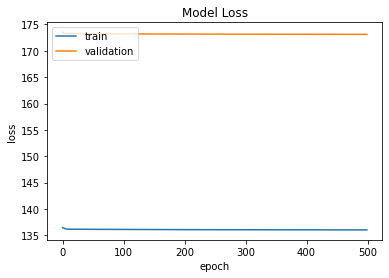

[I 2022-05-25 20:48:18,302] Trial 1 finished with value: 158.46531030182166 and parameters: {'filters1': 630, 'kernel_size': 6, 'activation1': 'tanh', 'filters2': 740, 'activation2': 'relu', 'filters3': 260, 'activation3': 'tanh', 'optimizer_name': 'RMSprop', 'learning_rate': 2.112530396368383e-06, 'momentum': 0.3188246324932265, 'batch_size': 11}. Best is trial 0 with value: 158.44553580773152.


Epoch 1/500

Epoch 00001: val_loss improved from 173.08838 to 171.94711, saving model to best_weights_CELM_Kalbar_OPT_SILO.h5
2616/2616 - 50s - loss: 135.2755 - mse: 19172.7188 - val_loss: 171.9471 - val_mse: 30872.5723 - lr: 5.8436e-04 - 50s/epoch - 19ms/step
Epoch 2/500

Epoch 00002: val_loss improved from 171.94711 to 171.94179, saving model to best_weights_CELM_Kalbar_OPT_SILO.h5
2616/2616 - 31s - loss: 135.2404 - mse: 19163.7695 - val_loss: 171.9418 - val_mse: 30870.7500 - lr: 5.8436e-04 - 31s/epoch - 12ms/step
Epoch 3/500

Epoch 00003: val_loss improved from 171.94179 to 171.94072, saving model to best_weights_CELM_Kalbar_OPT_SILO.h5
2616/2616 - 28s - loss: 135.2380 - mse: 19163.1094 - val_loss: 171.9407 - val_mse: 30870.4004 - lr: 5.8436e-04 - 28s/epoch - 11ms/step
Epoch 4/500

Epoch 00004: val_loss improved from 171.94072 to 171.94051, saving model to best_weights_CELM_Kalbar_OPT_SILO.h5
2616/2616 - 29s - loss: 135.2375 - mse: 19162.9531 - val_loss: 171.9405 - val_mse: 30870.30

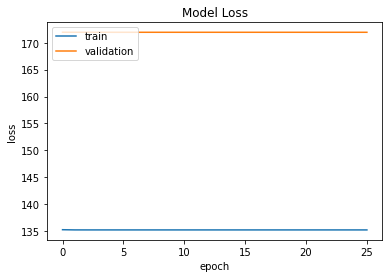

[I 2022-05-25 21:00:48,657] Trial 2 finished with value: 158.44546757601 and parameters: {'filters1': 160, 'kernel_size': 14, 'activation1': 'relu', 'filters2': 720, 'activation2': 'tanh', 'filters3': 560, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.0005843611085243388, 'batch_size': 1}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
1308/1308 - 27s - loss: 135.5335 - mse: 19192.4395 - val_loss: 172.2503 - val_mse: 30894.8633 - lr: 1.1173e-04 - 27s/epoch - 21ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
1308/1308 - 15s - loss: 135.4770 - mse: 19177.3047 - val_loss: 172.2188 - val_mse: 30884.0098 - lr: 1.1173e-04 - 15s/epoch - 12ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
1308/1308 - 16s - loss: 135.4541 - mse: 19171.1543 - val_loss: 172.2024 - val_mse: 30878.3730 - lr: 1.1173e-04 - 16s/epoch - 12ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
1308/1308 - 15s - loss: 135.4418 - mse: 19167.8555 - val_loss: 172.1930 - val_mse: 30875.2070 - lr: 1.1173e-04 - 15s/epoch - 11ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
1308/1308 - 15s - loss: 135.4346 - mse: 19165.9355 - val_loss: 172.1878 - val_mse: 30873.3242 - lr: 1.1173e-04 - 15s/epoch - 12ms/

Epoch 41/500

Epoch 00041: val_loss did not improve from 171.94044
1308/1308 - 17s - loss: 135.4234 - mse: 19162.9043 - val_loss: 172.1789 - val_mse: 30870.2754 - lr: 5.4748e-05 - 17s/epoch - 13ms/step


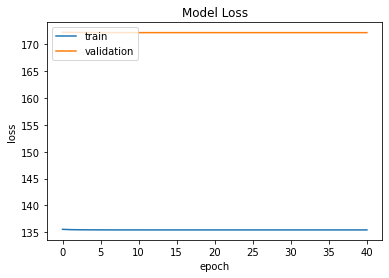

[I 2022-05-25 21:11:57,265] Trial 3 finished with value: 158.44546757601 and parameters: {'filters1': 550, 'kernel_size': 20, 'activation1': 'relu', 'filters2': 290, 'activation2': 'relu', 'filters3': 340, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.00011172968006254132, 'batch_size': 2}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
154/154 - 18s - loss: 136.9570 - mse: 19374.1504 - val_loss: 174.0589 - val_mse: 31132.4121 - lr: 1.1703e-05 - 18s/epoch - 120ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
154/154 - 4s - loss: 136.9181 - mse: 19363.1387 - val_loss: 173.9948 - val_mse: 31109.6719 - lr: 1.1703e-05 - 4s/epoch - 27ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
154/154 - 4s - loss: 136.8354 - mse: 19339.8633 - val_loss: 173.8734 - val_mse: 31066.9727 - lr: 1.1703e-05 - 4s/epoch - 23ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
154/154 - 5s - loss: 136.7124 - mse: 19305.9590 - val_loss: 173.7567 - val_mse: 31026.7305 - lr: 1.1703e-05 - 5s/epoch - 31ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
154/154 - 4s - loss: 136.6210 - mse: 19281.6309 - val_loss: 173.7088 - val_mse: 31010.5840 - lr: 1.1703e-05 - 4s/epoch - 27ms/step
Epoch 6/500


Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
154/154 - 4s - loss: 136.4818 - mse: 19244.3789 - val_loss: 173.5997 - val_mse: 30972.9727 - lr: 1.1703e-05 - 4s/epoch - 28ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
154/154 - 4s - loss: 136.4777 - mse: 19243.2852 - val_loss: 173.5965 - val_mse: 30971.8438 - lr: 1.1703e-05 - 4s/epoch - 29ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
154/154 - 4s - loss: 136.4745 - mse: 19242.4336 - val_loss: 173.5936 - val_mse: 30970.8496 - lr: 1.1703e-05 - 4s/epoch - 27ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 171.94044
154/154 - 5s - loss: 136.4717 - mse: 19241.6582 - val_loss: 173.5909 - val_mse: 30969.9082 - lr: 1.1703e-05 - 5s/epoch - 30ms/step
Epoch 47/500

Epoch 00047: val_loss did not improve from 171.94044
154/154 - 4s - loss: 136.4690 - mse: 19240.9258 - val_loss: 173.5882 - val_mse: 30968.9844 - lr: 1.1703e-05 - 4s/epoch - 28ms/step
Epoch 48/5

Epoch 85/500

Epoch 00085: val_loss did not improve from 171.94044
154/154 - 4s - loss: 136.3801 - mse: 19216.6758 - val_loss: 173.4998 - val_mse: 30938.2988 - lr: 1.1703e-05 - 4s/epoch - 24ms/step
Epoch 86/500

Epoch 00086: val_loss did not improve from 171.94044
154/154 - 4s - loss: 136.3781 - mse: 19216.1309 - val_loss: 173.4978 - val_mse: 30937.6094 - lr: 1.1703e-05 - 4s/epoch - 27ms/step
Epoch 87/500

Epoch 00087: val_loss did not improve from 171.94044
154/154 - 4s - loss: 136.3761 - mse: 19215.5703 - val_loss: 173.4958 - val_mse: 30936.9043 - lr: 1.1703e-05 - 4s/epoch - 27ms/step
Epoch 88/500

Epoch 00088: val_loss did not improve from 171.94044
154/154 - 4s - loss: 136.3740 - mse: 19215.0254 - val_loss: 173.4938 - val_mse: 30936.2227 - lr: 1.1703e-05 - 4s/epoch - 26ms/step
Epoch 89/500

Epoch 00089: val_loss did not improve from 171.94044
154/154 - 4s - loss: 136.3721 - mse: 19214.4902 - val_loss: 173.4918 - val_mse: 30935.5352 - lr: 1.1703e-05 - 4s/epoch - 27ms/step
Epoch 90/5

Epoch 127/500

Epoch 00127: val_loss did not improve from 171.94044
154/154 - 4s - loss: 136.3081 - mse: 19197.0371 - val_loss: 173.4282 - val_mse: 30913.4473 - lr: 1.1703e-05 - 4s/epoch - 25ms/step
Epoch 128/500

Epoch 00128: val_loss did not improve from 171.94044
154/154 - 4s - loss: 136.3066 - mse: 19196.6562 - val_loss: 173.4267 - val_mse: 30912.9609 - lr: 1.1703e-05 - 4s/epoch - 28ms/step
Epoch 129/500

Epoch 00129: val_loss did not improve from 171.94044
154/154 - 5s - loss: 136.3052 - mse: 19196.2715 - val_loss: 173.4254 - val_mse: 30912.4863 - lr: 1.1703e-05 - 5s/epoch - 31ms/step
Epoch 130/500

Epoch 00130: val_loss did not improve from 171.94044
154/154 - 4s - loss: 136.3039 - mse: 19195.8965 - val_loss: 173.4240 - val_mse: 30912.0117 - lr: 1.1703e-05 - 4s/epoch - 26ms/step
Epoch 131/500

Epoch 00131: val_loss did not improve from 171.94044
154/154 - 4s - loss: 136.3026 - mse: 19195.5312 - val_loss: 173.4227 - val_mse: 30911.5391 - lr: 1.1703e-05 - 4s/epoch - 29ms/step
Epoch

Epoch 169/500

Epoch 00169: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.2598 - mse: 19183.8789 - val_loss: 173.3802 - val_mse: 30896.8047 - lr: 1.1703e-05 - 3s/epoch - 16ms/step
Epoch 170/500

Epoch 00170: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.2588 - mse: 19183.6309 - val_loss: 173.3793 - val_mse: 30896.4863 - lr: 1.1703e-05 - 3s/epoch - 19ms/step
Epoch 171/500

Epoch 00171: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.2579 - mse: 19183.3848 - val_loss: 173.3784 - val_mse: 30896.1836 - lr: 1.1703e-05 - 3s/epoch - 19ms/step
Epoch 172/500

Epoch 00172: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.2570 - mse: 19183.1406 - val_loss: 173.3775 - val_mse: 30895.8809 - lr: 1.1703e-05 - 3s/epoch - 18ms/step
Epoch 173/500

Epoch 00173: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.2562 - mse: 19182.8926 - val_loss: 173.3766 - val_mse: 30895.5723 - lr: 1.1703e-05 - 3s/epoch - 23ms/step
Epoch

Epoch 211/500

Epoch 00211: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.2291 - mse: 19175.5215 - val_loss: 173.3497 - val_mse: 30886.2422 - lr: 1.1703e-05 - 3s/epoch - 21ms/step
Epoch 212/500

Epoch 00212: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.2285 - mse: 19175.3691 - val_loss: 173.3492 - val_mse: 30886.0488 - lr: 1.1703e-05 - 3s/epoch - 17ms/step
Epoch 213/500

Epoch 00213: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.2280 - mse: 19175.2188 - val_loss: 173.3486 - val_mse: 30885.8496 - lr: 1.1703e-05 - 3s/epoch - 22ms/step
Epoch 214/500

Epoch 00214: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.2274 - mse: 19175.0605 - val_loss: 173.3480 - val_mse: 30885.6641 - lr: 1.1703e-05 - 3s/epoch - 22ms/step
Epoch 215/500

Epoch 00215: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.2268 - mse: 19174.9180 - val_loss: 173.3475 - val_mse: 30885.4707 - lr: 1.1703e-05 - 3s/epoch - 20ms/step
Epoch

Epoch 253/500

Epoch 00253: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.2103 - mse: 19170.3887 - val_loss: 173.3310 - val_mse: 30879.7578 - lr: 1.1703e-05 - 3s/epoch - 23ms/step
Epoch 254/500

Epoch 00254: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.2099 - mse: 19170.3008 - val_loss: 173.3307 - val_mse: 30879.6367 - lr: 1.1703e-05 - 3s/epoch - 20ms/step
Epoch 255/500

Epoch 00255: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.2095 - mse: 19170.2051 - val_loss: 173.3304 - val_mse: 30879.5195 - lr: 1.1703e-05 - 3s/epoch - 22ms/step
Epoch 256/500

Epoch 00256: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.2092 - mse: 19170.1191 - val_loss: 173.3300 - val_mse: 30879.4062 - lr: 1.1703e-05 - 3s/epoch - 22ms/step
Epoch 257/500

Epoch 00257: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.2089 - mse: 19170.0254 - val_loss: 173.3297 - val_mse: 30879.2930 - lr: 1.1703e-05 - 3s/epoch - 20ms/step
Epoch

Epoch 295/500

Epoch 00295: val_loss did not improve from 171.94044
154/154 - 4s - loss: 136.1989 - mse: 19167.3125 - val_loss: 173.3198 - val_mse: 30875.8711 - lr: 1.1703e-05 - 4s/epoch - 23ms/step
Epoch 296/500

Epoch 00296: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1988 - mse: 19167.2598 - val_loss: 173.3196 - val_mse: 30875.7930 - lr: 1.1703e-05 - 3s/epoch - 22ms/step
Epoch 297/500

Epoch 00297: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1985 - mse: 19167.2070 - val_loss: 173.3194 - val_mse: 30875.7344 - lr: 1.1703e-05 - 3s/epoch - 21ms/step
Epoch 298/500

Epoch 00298: val_loss did not improve from 171.94044
154/154 - 4s - loss: 136.1984 - mse: 19167.1445 - val_loss: 173.3192 - val_mse: 30875.6582 - lr: 1.1703e-05 - 4s/epoch - 24ms/step
Epoch 299/500

Epoch 00299: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1981 - mse: 19167.0977 - val_loss: 173.3190 - val_mse: 30875.5898 - lr: 1.1703e-05 - 3s/epoch - 21ms/step
Epoch

Epoch 337/500

Epoch 00337: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1922 - mse: 19165.4883 - val_loss: 173.3131 - val_mse: 30873.5625 - lr: 1.1703e-05 - 3s/epoch - 21ms/step
Epoch 338/500

Epoch 00338: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1921 - mse: 19165.4609 - val_loss: 173.3130 - val_mse: 30873.5176 - lr: 1.1703e-05 - 3s/epoch - 21ms/step
Epoch 339/500

Epoch 00339: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1920 - mse: 19165.4297 - val_loss: 173.3129 - val_mse: 30873.4746 - lr: 1.1703e-05 - 3s/epoch - 21ms/step
Epoch 340/500

Epoch 00340: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1919 - mse: 19165.3906 - val_loss: 173.3127 - val_mse: 30873.4336 - lr: 1.1703e-05 - 3s/epoch - 22ms/step
Epoch 341/500

Epoch 00341: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1917 - mse: 19165.3535 - val_loss: 173.3126 - val_mse: 30873.3945 - lr: 1.1703e-05 - 3s/epoch - 21ms/step
Epoch

Epoch 379/500

Epoch 00379: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1883 - mse: 19164.4121 - val_loss: 173.3092 - val_mse: 30872.2051 - lr: 1.1703e-05 - 3s/epoch - 22ms/step
Epoch 380/500

Epoch 00380: val_loss did not improve from 171.94044
154/154 - 4s - loss: 136.1882 - mse: 19164.3906 - val_loss: 173.3091 - val_mse: 30872.1719 - lr: 1.1703e-05 - 4s/epoch - 24ms/step
Epoch 381/500

Epoch 00381: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1881 - mse: 19164.3730 - val_loss: 173.3091 - val_mse: 30872.1562 - lr: 1.1703e-05 - 3s/epoch - 21ms/step
Epoch 382/500

Epoch 00382: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1881 - mse: 19164.3555 - val_loss: 173.3090 - val_mse: 30872.1191 - lr: 1.1703e-05 - 3s/epoch - 22ms/step
Epoch 383/500

Epoch 00383: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1880 - mse: 19164.3418 - val_loss: 173.3089 - val_mse: 30872.1035 - lr: 1.1703e-05 - 3s/epoch - 22ms/step
Epoch

Epoch 421/500

Epoch 00421: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1860 - mse: 19163.7852 - val_loss: 173.3069 - val_mse: 30871.4043 - lr: 1.1703e-05 - 3s/epoch - 23ms/step
Epoch 422/500

Epoch 00422: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1859 - mse: 19163.7715 - val_loss: 173.3069 - val_mse: 30871.3945 - lr: 1.1703e-05 - 3s/epoch - 22ms/step
Epoch 423/500

Epoch 00423: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1859 - mse: 19163.7578 - val_loss: 173.3068 - val_mse: 30871.3789 - lr: 1.1703e-05 - 3s/epoch - 20ms/step
Epoch 424/500

Epoch 00424: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1859 - mse: 19163.7480 - val_loss: 173.3067 - val_mse: 30871.3613 - lr: 1.1703e-05 - 3s/epoch - 22ms/step
Epoch 425/500

Epoch 00425: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1858 - mse: 19163.7383 - val_loss: 173.3067 - val_mse: 30871.3555 - lr: 1.1703e-05 - 3s/epoch - 21ms/step
Epoch

Epoch 463/500

Epoch 00463: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1846 - mse: 19163.4121 - val_loss: 173.3056 - val_mse: 30870.9395 - lr: 1.1703e-05 - 3s/epoch - 19ms/step
Epoch 464/500

Epoch 00464: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1846 - mse: 19163.4043 - val_loss: 173.3056 - val_mse: 30870.9238 - lr: 1.1703e-05 - 3s/epoch - 19ms/step
Epoch 465/500

Epoch 00465: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1846 - mse: 19163.3984 - val_loss: 173.3056 - val_mse: 30870.9199 - lr: 1.1703e-05 - 3s/epoch - 17ms/step
Epoch 466/500

Epoch 00466: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1845 - mse: 19163.3945 - val_loss: 173.3055 - val_mse: 30870.9141 - lr: 1.1703e-05 - 3s/epoch - 20ms/step
Epoch 467/500

Epoch 00467: val_loss did not improve from 171.94044
154/154 - 3s - loss: 136.1845 - mse: 19163.3906 - val_loss: 173.3055 - val_mse: 30870.9121 - lr: 1.1703e-05 - 3s/epoch - 18ms/step
Epoch

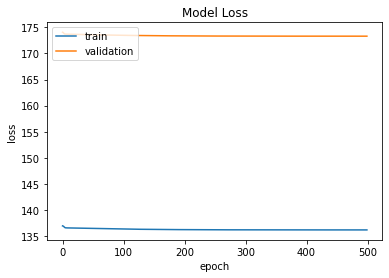

[I 2022-05-25 21:42:10,392] Trial 4 finished with value: 158.44664047395008 and parameters: {'filters1': 80, 'kernel_size': 14, 'activation1': 'tanh', 'filters2': 780, 'activation2': 'relu', 'filters3': 670, 'activation3': 'relu', 'optimizer_name': 'RMSprop', 'learning_rate': 1.1702707153786893e-05, 'momentum': 0.3005766195022171, 'batch_size': 17}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
872/872 - 23s - loss: 135.5874 - mse: 19167.6406 - val_loss: 172.3757 - val_mse: 30871.4316 - lr: 0.0016 - 23s/epoch - 26ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
872/872 - 11s - loss: 135.5709 - mse: 19163.3984 - val_loss: 172.3733 - val_mse: 30870.6484 - lr: 0.0016 - 11s/epoch - 13ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
872/872 - 12s - loss: 135.5697 - mse: 19163.0859 - val_loss: 172.3728 - val_mse: 30870.4551 - lr: 0.0016 - 12s/epoch - 14ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
872/872 - 13s - loss: 135.5694 - mse: 19162.9883 - val_loss: 172.3725 - val_mse: 30870.3789 - lr: 0.0016 - 13s/epoch - 15ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
872/872 - 13s - loss: 135.5692 - mse: 19162.9414 - val_loss: 172.3724 - val_mse: 30870.3418 - lr: 0.0016 - 13s/epoch - 15ms/step
Epoch 6/500

Epoch 00006:

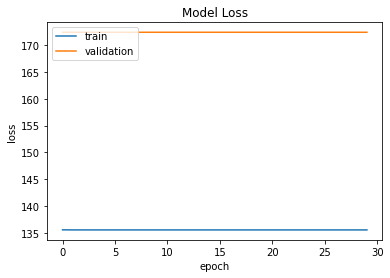

[I 2022-05-25 21:50:41,819] Trial 5 finished with value: 158.44546757601 and parameters: {'filters1': 350, 'kernel_size': 2, 'activation1': 'relu', 'filters2': 790, 'activation2': 'relu', 'filters3': 760, 'activation3': 'relu', 'optimizer_name': 'Adam', 'learning_rate': 0.0015892801449009471, 'batch_size': 3}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
175/175 - 18s - loss: 136.1476 - mse: 19170.7422 - val_loss: 173.2126 - val_mse: 30871.7246 - lr: 0.0028 - 18s/epoch - 101ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
175/175 - 3s - loss: 136.1194 - mse: 19163.2520 - val_loss: 173.2087 - val_mse: 30870.3730 - lr: 0.0028 - 3s/epoch - 17ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
175/175 - 3s - loss: 136.1181 - mse: 19162.9316 - val_loss: 173.2085 - val_mse: 30870.3125 - lr: 0.0028 - 3s/epoch - 18ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
175/175 - 3s - loss: 136.1180 - mse: 19162.9043 - val_loss: 173.2085 - val_mse: 30870.2988 - lr: 0.0028 - 3s/epoch - 14ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
175/175 - 3s - loss: 136.1180 - mse: 19162.8984 - val_loss: 173.2085 - val_mse: 30870.2969 - lr: 0.0028 - 3s/epoch - 18ms/step
Epoch 6/500

Epoch 00006: val_lo

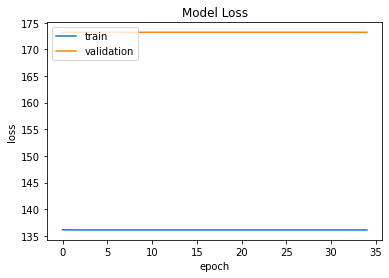

[I 2022-05-25 21:52:42,097] Trial 6 finished with value: 158.44547162235128 and parameters: {'filters1': 270, 'kernel_size': 16, 'activation1': 'tanh', 'filters2': 320, 'activation2': 'relu', 'filters3': 700, 'activation3': 'relu', 'optimizer_name': 'RMSprop', 'learning_rate': 0.0028211996371505935, 'momentum': 0.3072876121174003, 'batch_size': 15}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
262/262 - 26s - loss: 136.5203 - mse: 19312.7480 - val_loss: 173.6186 - val_mse: 31059.3516 - lr: 1.8899e-06 - 26s/epoch - 97ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
262/262 - 4s - loss: 136.5132 - mse: 19310.7676 - val_loss: 173.6096 - val_mse: 31056.1465 - lr: 1.8899e-06 - 4s/epoch - 14ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.5039 - mse: 19308.1582 - val_loss: 173.5970 - val_mse: 31051.6875 - lr: 1.8899e-06 - 3s/epoch - 12ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.4906 - mse: 19304.4551 - val_loss: 173.5790 - val_mse: 31045.3359 - lr: 1.8899e-06 - 3s/epoch - 10ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.4722 - mse: 19299.3066 - val_loss: 173.5548 - val_mse: 31036.7773 - lr: 1.8899e-06 - 3s/epoch - 11ms/step
Epoch 6/500



Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.1790 - mse: 19219.7109 - val_loss: 173.2813 - val_mse: 30942.3789 - lr: 1.8899e-06 - 3s/epoch - 13ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
262/262 - 2s - loss: 136.1785 - mse: 19219.5664 - val_loss: 173.2808 - val_mse: 30942.2051 - lr: 1.8899e-06 - 2s/epoch - 9ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
262/262 - 4s - loss: 136.1779 - mse: 19219.4258 - val_loss: 173.2803 - val_mse: 30942.0254 - lr: 1.8899e-06 - 4s/epoch - 13ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.1774 - mse: 19219.2871 - val_loss: 173.2798 - val_mse: 30941.8555 - lr: 1.8899e-06 - 3s/epoch - 11ms/step
Epoch 47/500

Epoch 00047: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.1768 - mse: 19219.1484 - val_loss: 173.2793 - val_mse: 30941.6758 - lr: 1.8899e-06 - 3s/epoch - 11ms/step
Epoch 48/50

Epoch 85/500

Epoch 00085: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.1590 - mse: 19214.2695 - val_loss: 173.2615 - val_mse: 30935.5195 - lr: 1.8899e-06 - 3s/epoch - 13ms/step
Epoch 86/500

Epoch 00086: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.1586 - mse: 19214.1445 - val_loss: 173.2610 - val_mse: 30935.3633 - lr: 1.8899e-06 - 3s/epoch - 13ms/step
Epoch 87/500

Epoch 00087: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.1580 - mse: 19214.0312 - val_loss: 173.2606 - val_mse: 30935.2012 - lr: 1.8899e-06 - 3s/epoch - 13ms/step
Epoch 88/500

Epoch 00088: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.1576 - mse: 19213.8965 - val_loss: 173.2601 - val_mse: 30935.0430 - lr: 1.8899e-06 - 3s/epoch - 13ms/step
Epoch 89/500

Epoch 00089: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.1572 - mse: 19213.7852 - val_loss: 173.2597 - val_mse: 30934.9023 - lr: 1.8899e-06 - 3s/epoch - 12ms/step
Epoch 90/5

Epoch 127/500

Epoch 00127: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.1408 - mse: 19209.3125 - val_loss: 173.2433 - val_mse: 30929.2148 - lr: 1.8899e-06 - 3s/epoch - 12ms/step
Epoch 128/500

Epoch 00128: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.1403 - mse: 19209.1992 - val_loss: 173.2429 - val_mse: 30929.0742 - lr: 1.8899e-06 - 3s/epoch - 13ms/step
Epoch 129/500

Epoch 00129: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.1400 - mse: 19209.0938 - val_loss: 173.2425 - val_mse: 30928.9395 - lr: 1.8899e-06 - 3s/epoch - 11ms/step
Epoch 130/500

Epoch 00130: val_loss did not improve from 171.94044
262/262 - 4s - loss: 136.1395 - mse: 19208.9707 - val_loss: 173.2421 - val_mse: 30928.7793 - lr: 1.8899e-06 - 4s/epoch - 14ms/step
Epoch 131/500

Epoch 00131: val_loss did not improve from 171.94044
262/262 - 4s - loss: 136.1391 - mse: 19208.8594 - val_loss: 173.2417 - val_mse: 30928.6484 - lr: 1.8899e-06 - 4s/epoch - 14ms/step
Epoch

Epoch 169/500

Epoch 00169: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.1239 - mse: 19204.7461 - val_loss: 173.2266 - val_mse: 30923.4258 - lr: 1.8899e-06 - 3s/epoch - 11ms/step
Epoch 170/500

Epoch 00170: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.1236 - mse: 19204.6328 - val_loss: 173.2262 - val_mse: 30923.2773 - lr: 1.8899e-06 - 3s/epoch - 10ms/step
Epoch 171/500

Epoch 00171: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.1232 - mse: 19204.5371 - val_loss: 173.2258 - val_mse: 30923.1582 - lr: 1.8899e-06 - 3s/epoch - 13ms/step
Epoch 172/500

Epoch 00172: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.1228 - mse: 19204.4355 - val_loss: 173.2254 - val_mse: 30923.0254 - lr: 1.8899e-06 - 3s/epoch - 12ms/step
Epoch 173/500

Epoch 00173: val_loss did not improve from 171.94044
262/262 - 4s - loss: 136.1224 - mse: 19204.3340 - val_loss: 173.2251 - val_mse: 30922.9023 - lr: 1.8899e-06 - 4s/epoch - 14ms/step
Epoch

Epoch 211/500

Epoch 00211: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.1086 - mse: 19200.5547 - val_loss: 173.2113 - val_mse: 30918.1133 - lr: 1.8899e-06 - 3s/epoch - 11ms/step
Epoch 212/500

Epoch 00212: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.1082 - mse: 19200.4629 - val_loss: 173.2109 - val_mse: 30917.9844 - lr: 1.8899e-06 - 3s/epoch - 12ms/step
Epoch 213/500

Epoch 00213: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.1079 - mse: 19200.3691 - val_loss: 173.2105 - val_mse: 30917.8594 - lr: 1.8899e-06 - 3s/epoch - 11ms/step
Epoch 214/500

Epoch 00214: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.1075 - mse: 19200.2793 - val_loss: 173.2102 - val_mse: 30917.7461 - lr: 1.8899e-06 - 3s/epoch - 11ms/step
Epoch 215/500

Epoch 00215: val_loss did not improve from 171.94044
262/262 - 2s - loss: 136.1072 - mse: 19200.1816 - val_loss: 173.2098 - val_mse: 30917.6230 - lr: 1.8899e-06 - 2s/epoch - 9ms/step
Epoch 

Epoch 253/500

Epoch 00253: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0945 - mse: 19196.7285 - val_loss: 173.1972 - val_mse: 30913.2500 - lr: 1.8899e-06 - 3s/epoch - 11ms/step
Epoch 254/500

Epoch 00254: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0942 - mse: 19196.6445 - val_loss: 173.1969 - val_mse: 30913.1367 - lr: 1.8899e-06 - 3s/epoch - 11ms/step
Epoch 255/500

Epoch 00255: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0939 - mse: 19196.5664 - val_loss: 173.1966 - val_mse: 30913.0312 - lr: 1.8899e-06 - 3s/epoch - 10ms/step
Epoch 256/500

Epoch 00256: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0936 - mse: 19196.4746 - val_loss: 173.1963 - val_mse: 30912.9258 - lr: 1.8899e-06 - 3s/epoch - 11ms/step
Epoch 257/500

Epoch 00257: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0932 - mse: 19196.3906 - val_loss: 173.1959 - val_mse: 30912.8008 - lr: 1.8899e-06 - 3s/epoch - 11ms/step
Epoch

Epoch 295/500

Epoch 00295: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0817 - mse: 19193.2500 - val_loss: 173.1844 - val_mse: 30908.8223 - lr: 1.8899e-06 - 3s/epoch - 12ms/step
Epoch 296/500

Epoch 00296: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0815 - mse: 19193.1719 - val_loss: 173.1842 - val_mse: 30908.7227 - lr: 1.8899e-06 - 3s/epoch - 10ms/step
Epoch 297/500

Epoch 00297: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0811 - mse: 19193.0879 - val_loss: 173.1839 - val_mse: 30908.6211 - lr: 1.8899e-06 - 3s/epoch - 12ms/step
Epoch 298/500

Epoch 00298: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0808 - mse: 19193.0000 - val_loss: 173.1836 - val_mse: 30908.5137 - lr: 1.8899e-06 - 3s/epoch - 11ms/step
Epoch 299/500

Epoch 00299: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0806 - mse: 19192.9375 - val_loss: 173.1833 - val_mse: 30908.4277 - lr: 1.8899e-06 - 3s/epoch - 10ms/step
Epoch

Epoch 337/500

Epoch 00337: val_loss did not improve from 171.94044
262/262 - 2s - loss: 136.0701 - mse: 19190.0723 - val_loss: 173.1728 - val_mse: 30904.7988 - lr: 1.8899e-06 - 2s/epoch - 8ms/step
Epoch 338/500

Epoch 00338: val_loss did not improve from 171.94044
262/262 - 2s - loss: 136.0698 - mse: 19190.0059 - val_loss: 173.1726 - val_mse: 30904.7188 - lr: 1.8899e-06 - 2s/epoch - 7ms/step
Epoch 339/500

Epoch 00339: val_loss did not improve from 171.94044
262/262 - 2s - loss: 136.0696 - mse: 19189.9395 - val_loss: 173.1723 - val_mse: 30904.6211 - lr: 1.8899e-06 - 2s/epoch - 8ms/step
Epoch 340/500

Epoch 00340: val_loss did not improve from 171.94044
262/262 - 2s - loss: 136.0693 - mse: 19189.8730 - val_loss: 173.1720 - val_mse: 30904.5293 - lr: 1.8899e-06 - 2s/epoch - 7ms/step
Epoch 341/500

Epoch 00341: val_loss did not improve from 171.94044
262/262 - 2s - loss: 136.0691 - mse: 19189.7969 - val_loss: 173.1718 - val_mse: 30904.4375 - lr: 1.8899e-06 - 2s/epoch - 8ms/step
Epoch 342/

Epoch 379/500

Epoch 00379: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0596 - mse: 19187.2090 - val_loss: 173.1623 - val_mse: 30901.1523 - lr: 1.8899e-06 - 3s/epoch - 11ms/step
Epoch 380/500

Epoch 00380: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0593 - mse: 19187.1504 - val_loss: 173.1621 - val_mse: 30901.0762 - lr: 1.8899e-06 - 3s/epoch - 11ms/step
Epoch 381/500

Epoch 00381: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0591 - mse: 19187.0742 - val_loss: 173.1618 - val_mse: 30900.9961 - lr: 1.8899e-06 - 3s/epoch - 10ms/step
Epoch 382/500

Epoch 00382: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0588 - mse: 19187.0234 - val_loss: 173.1616 - val_mse: 30900.9121 - lr: 1.8899e-06 - 3s/epoch - 11ms/step
Epoch 383/500

Epoch 00383: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0586 - mse: 19186.9570 - val_loss: 173.1614 - val_mse: 30900.8320 - lr: 1.8899e-06 - 3s/epoch - 12ms/step
Epoch

Epoch 421/500

Epoch 00421: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0500 - mse: 19184.6270 - val_loss: 173.1528 - val_mse: 30897.8633 - lr: 1.8899e-06 - 3s/epoch - 10ms/step
Epoch 422/500

Epoch 00422: val_loss did not improve from 171.94044
262/262 - 2s - loss: 136.0498 - mse: 19184.5664 - val_loss: 173.1526 - val_mse: 30897.7852 - lr: 1.8899e-06 - 2s/epoch - 9ms/step
Epoch 423/500

Epoch 00423: val_loss did not improve from 171.94044
262/262 - 2s - loss: 136.0496 - mse: 19184.4961 - val_loss: 173.1524 - val_mse: 30897.7246 - lr: 1.8899e-06 - 2s/epoch - 9ms/step
Epoch 424/500

Epoch 00424: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0493 - mse: 19184.4336 - val_loss: 173.1521 - val_mse: 30897.6426 - lr: 1.8899e-06 - 3s/epoch - 10ms/step
Epoch 425/500

Epoch 00425: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0491 - mse: 19184.3887 - val_loss: 173.1519 - val_mse: 30897.5625 - lr: 1.8899e-06 - 3s/epoch - 10ms/step
Epoch 4

Epoch 463/500

Epoch 00463: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0414 - mse: 19182.2773 - val_loss: 173.1442 - val_mse: 30894.8965 - lr: 1.8899e-06 - 3s/epoch - 10ms/step
Epoch 464/500

Epoch 00464: val_loss did not improve from 171.94044
262/262 - 3s - loss: 136.0412 - mse: 19182.2227 - val_loss: 173.1440 - val_mse: 30894.8340 - lr: 1.8899e-06 - 3s/epoch - 11ms/step
Epoch 465/500

Epoch 00465: val_loss did not improve from 171.94044
262/262 - 2s - loss: 136.0410 - mse: 19182.1758 - val_loss: 173.1438 - val_mse: 30894.7637 - lr: 1.8899e-06 - 2s/epoch - 6ms/step
Epoch 466/500

Epoch 00466: val_loss did not improve from 171.94044
262/262 - 2s - loss: 136.0408 - mse: 19182.1172 - val_loss: 173.1437 - val_mse: 30894.6973 - lr: 1.8899e-06 - 2s/epoch - 7ms/step
Epoch 467/500

Epoch 00467: val_loss did not improve from 171.94044
262/262 - 2s - loss: 136.0406 - mse: 19182.0703 - val_loss: 173.1434 - val_mse: 30894.6270 - lr: 1.8899e-06 - 2s/epoch - 7ms/step
Epoch 46

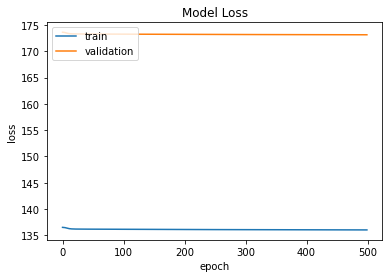

[I 2022-05-25 22:16:53,586] Trial 7 finished with value: 158.50878772007493 and parameters: {'filters1': 530, 'kernel_size': 10, 'activation1': 'relu', 'filters2': 80, 'activation2': 'tanh', 'filters3': 750, 'activation3': 'relu', 'optimizer_name': 'Adam', 'learning_rate': 1.889864639212224e-06, 'batch_size': 10}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
146/146 - 16s - loss: 136.6252 - mse: 19282.5098 - val_loss: 173.6163 - val_mse: 31010.3789 - lr: 8.4464e-06 - 16s/epoch - 109ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.5570 - mse: 19263.4961 - val_loss: 173.5302 - val_mse: 30980.3457 - lr: 8.4464e-06 - 2s/epoch - 15ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.4865 - mse: 19244.4258 - val_loss: 173.4846 - val_mse: 30964.7305 - lr: 8.4464e-06 - 2s/epoch - 11ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.4556 - mse: 19236.2793 - val_loss: 173.4705 - val_mse: 30959.9785 - lr: 8.4464e-06 - 2s/epoch - 11ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.4443 - mse: 19233.3555 - val_loss: 173.4648 - val_mse: 30958.0879 - lr: 8.4464e-06 - 2s/epoch - 15ms/step
Epoch 6/500


Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.3870 - mse: 19217.8535 - val_loss: 173.4124 - val_mse: 30939.9570 - lr: 8.4464e-06 - 2s/epoch - 16ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.3858 - mse: 19217.5449 - val_loss: 173.4112 - val_mse: 30939.5566 - lr: 8.4464e-06 - 2s/epoch - 14ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.3847 - mse: 19217.2266 - val_loss: 173.4101 - val_mse: 30939.1562 - lr: 8.4464e-06 - 2s/epoch - 12ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.3835 - mse: 19216.9180 - val_loss: 173.4090 - val_mse: 30938.7559 - lr: 8.4464e-06 - 2s/epoch - 13ms/step
Epoch 47/500

Epoch 00047: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.3824 - mse: 19216.6094 - val_loss: 173.4078 - val_mse: 30938.3672 - lr: 8.4464e-06 - 2s/epoch - 15ms/step
Epoch 48/5

Epoch 85/500

Epoch 00085: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.3428 - mse: 19205.8262 - val_loss: 173.3684 - val_mse: 30924.6934 - lr: 8.4464e-06 - 2s/epoch - 14ms/step
Epoch 86/500

Epoch 00086: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.3419 - mse: 19205.5586 - val_loss: 173.3675 - val_mse: 30924.3574 - lr: 8.4464e-06 - 2s/epoch - 11ms/step
Epoch 87/500

Epoch 00087: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.3410 - mse: 19205.3047 - val_loss: 173.3665 - val_mse: 30924.0391 - lr: 8.4464e-06 - 2s/epoch - 11ms/step
Epoch 88/500

Epoch 00088: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.3400 - mse: 19205.0508 - val_loss: 173.3656 - val_mse: 30923.7129 - lr: 8.4464e-06 - 2s/epoch - 10ms/step
Epoch 89/500

Epoch 00089: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.3391 - mse: 19204.7988 - val_loss: 173.3646 - val_mse: 30923.3945 - lr: 8.4464e-06 - 2s/epoch - 11ms/step
Epoch 90/5

Epoch 127/500

Epoch 00127: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.3070 - mse: 19196.0586 - val_loss: 173.3327 - val_mse: 30912.3086 - lr: 8.4464e-06 - 2s/epoch - 15ms/step
Epoch 128/500

Epoch 00128: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.3062 - mse: 19195.8516 - val_loss: 173.3319 - val_mse: 30912.0449 - lr: 8.4464e-06 - 2s/epoch - 16ms/step
Epoch 129/500

Epoch 00129: val_loss did not improve from 171.94044
146/146 - 3s - loss: 136.3055 - mse: 19195.6465 - val_loss: 173.3312 - val_mse: 30911.7891 - lr: 8.4464e-06 - 3s/epoch - 18ms/step
Epoch 130/500

Epoch 00130: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.3047 - mse: 19195.4395 - val_loss: 173.3304 - val_mse: 30911.5312 - lr: 8.4464e-06 - 2s/epoch - 11ms/step
Epoch 131/500

Epoch 00131: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.3040 - mse: 19195.2285 - val_loss: 173.3297 - val_mse: 30911.2695 - lr: 8.4464e-06 - 2s/epoch - 16ms/step
Epoch

Epoch 169/500

Epoch 00169: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2785 - mse: 19188.2891 - val_loss: 173.3043 - val_mse: 30902.4688 - lr: 8.4464e-06 - 2s/epoch - 12ms/step
Epoch 170/500

Epoch 00170: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2779 - mse: 19188.1250 - val_loss: 173.3037 - val_mse: 30902.2578 - lr: 8.4464e-06 - 2s/epoch - 14ms/step
Epoch 171/500

Epoch 00171: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2773 - mse: 19187.9629 - val_loss: 173.3031 - val_mse: 30902.0605 - lr: 8.4464e-06 - 2s/epoch - 15ms/step
Epoch 172/500

Epoch 00172: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2768 - mse: 19187.8027 - val_loss: 173.3025 - val_mse: 30901.8535 - lr: 8.4464e-06 - 2s/epoch - 16ms/step
Epoch 173/500

Epoch 00173: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2761 - mse: 19187.6445 - val_loss: 173.3020 - val_mse: 30901.6445 - lr: 8.4464e-06 - 2s/epoch - 15ms/step
Epoch

Epoch 211/500

Epoch 00211: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2462 - mse: 19179.4824 - val_loss: 173.2720 - val_mse: 30891.2852 - lr: 8.4464e-06 - 2s/epoch - 12ms/step
Epoch 212/500

Epoch 00212: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2456 - mse: 19179.3359 - val_loss: 173.2715 - val_mse: 30891.0879 - lr: 8.4464e-06 - 2s/epoch - 14ms/step
Epoch 213/500

Epoch 00213: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2451 - mse: 19179.1934 - val_loss: 173.2710 - val_mse: 30890.9121 - lr: 8.4464e-06 - 2s/epoch - 15ms/step
Epoch 214/500

Epoch 00214: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2446 - mse: 19179.0508 - val_loss: 173.2705 - val_mse: 30890.7344 - lr: 8.4464e-06 - 2s/epoch - 15ms/step
Epoch 215/500

Epoch 00215: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2440 - mse: 19178.9043 - val_loss: 173.2699 - val_mse: 30890.5527 - lr: 8.4464e-06 - 2s/epoch - 15ms/step
Epoch

Epoch 253/500

Epoch 00253: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2273 - mse: 19174.3379 - val_loss: 173.2532 - val_mse: 30884.7715 - lr: 8.4464e-06 - 2s/epoch - 13ms/step
Epoch 254/500

Epoch 00254: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2270 - mse: 19174.2441 - val_loss: 173.2529 - val_mse: 30884.6484 - lr: 8.4464e-06 - 2s/epoch - 14ms/step
Epoch 255/500

Epoch 00255: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2265 - mse: 19174.1367 - val_loss: 173.2526 - val_mse: 30884.5195 - lr: 8.4464e-06 - 2s/epoch - 13ms/step
Epoch 256/500

Epoch 00256: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2263 - mse: 19174.0391 - val_loss: 173.2522 - val_mse: 30884.3945 - lr: 8.4464e-06 - 2s/epoch - 14ms/step
Epoch 257/500

Epoch 00257: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2259 - mse: 19173.9473 - val_loss: 173.2518 - val_mse: 30884.2695 - lr: 8.4464e-06 - 2s/epoch - 13ms/step
Epoch

Epoch 295/500

Epoch 00295: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2142 - mse: 19170.7559 - val_loss: 173.2402 - val_mse: 30880.2383 - lr: 8.4464e-06 - 2s/epoch - 13ms/step
Epoch 296/500

Epoch 00296: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2139 - mse: 19170.6875 - val_loss: 173.2399 - val_mse: 30880.1465 - lr: 8.4464e-06 - 2s/epoch - 11ms/step
Epoch 297/500

Epoch 00297: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2137 - mse: 19170.6191 - val_loss: 173.2397 - val_mse: 30880.0586 - lr: 8.4464e-06 - 2s/epoch - 15ms/step
Epoch 298/500

Epoch 00298: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2134 - mse: 19170.5527 - val_loss: 173.2394 - val_mse: 30879.9785 - lr: 8.4464e-06 - 2s/epoch - 15ms/step
Epoch 299/500

Epoch 00299: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2131 - mse: 19170.4805 - val_loss: 173.2391 - val_mse: 30879.8848 - lr: 8.4464e-06 - 2s/epoch - 16ms/step
Epoch

Epoch 337/500

Epoch 00337: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2050 - mse: 19168.2734 - val_loss: 173.2311 - val_mse: 30877.1016 - lr: 8.4464e-06 - 2s/epoch - 13ms/step
Epoch 338/500

Epoch 00338: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2049 - mse: 19168.2285 - val_loss: 173.2309 - val_mse: 30877.0332 - lr: 8.4464e-06 - 2s/epoch - 13ms/step
Epoch 339/500

Epoch 00339: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2047 - mse: 19168.1816 - val_loss: 173.2308 - val_mse: 30876.9746 - lr: 8.4464e-06 - 2s/epoch - 11ms/step
Epoch 340/500

Epoch 00340: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2045 - mse: 19168.1309 - val_loss: 173.2306 - val_mse: 30876.9043 - lr: 8.4464e-06 - 2s/epoch - 12ms/step
Epoch 341/500

Epoch 00341: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.2043 - mse: 19168.0840 - val_loss: 173.2304 - val_mse: 30876.8555 - lr: 8.4464e-06 - 2s/epoch - 14ms/step
Epoch

Epoch 379/500

Epoch 00379: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.1987 - mse: 19166.5625 - val_loss: 173.2248 - val_mse: 30874.9355 - lr: 8.4464e-06 - 2s/epoch - 13ms/step
Epoch 380/500

Epoch 00380: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.1986 - mse: 19166.5391 - val_loss: 173.2247 - val_mse: 30874.8809 - lr: 8.4464e-06 - 2s/epoch - 13ms/step
Epoch 381/500

Epoch 00381: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.1986 - mse: 19166.5020 - val_loss: 173.2246 - val_mse: 30874.8496 - lr: 8.4464e-06 - 2s/epoch - 14ms/step
Epoch 382/500

Epoch 00382: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.1984 - mse: 19166.4688 - val_loss: 173.2245 - val_mse: 30874.8105 - lr: 8.4464e-06 - 2s/epoch - 12ms/step
Epoch 383/500

Epoch 00383: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.1983 - mse: 19166.4336 - val_loss: 173.2244 - val_mse: 30874.7617 - lr: 8.4464e-06 - 2s/epoch - 13ms/step
Epoch

Epoch 421/500

Epoch 00421: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.1945 - mse: 19165.3984 - val_loss: 173.2205 - val_mse: 30873.4492 - lr: 8.4464e-06 - 2s/epoch - 15ms/step
Epoch 422/500

Epoch 00422: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.1944 - mse: 19165.3789 - val_loss: 173.2205 - val_mse: 30873.4199 - lr: 8.4464e-06 - 2s/epoch - 15ms/step
Epoch 423/500

Epoch 00423: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.1943 - mse: 19165.3555 - val_loss: 173.2204 - val_mse: 30873.3906 - lr: 8.4464e-06 - 2s/epoch - 15ms/step
Epoch 424/500

Epoch 00424: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.1942 - mse: 19165.3281 - val_loss: 173.2204 - val_mse: 30873.3672 - lr: 8.4464e-06 - 2s/epoch - 12ms/step
Epoch 425/500

Epoch 00425: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.1942 - mse: 19165.3008 - val_loss: 173.2203 - val_mse: 30873.3340 - lr: 8.4464e-06 - 2s/epoch - 11ms/step
Epoch

Epoch 463/500

Epoch 00463: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.1915 - mse: 19164.5898 - val_loss: 173.2177 - val_mse: 30872.4375 - lr: 8.4464e-06 - 2s/epoch - 14ms/step
Epoch 464/500

Epoch 00464: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.1915 - mse: 19164.5781 - val_loss: 173.2176 - val_mse: 30872.4199 - lr: 8.4464e-06 - 2s/epoch - 15ms/step
Epoch 465/500

Epoch 00465: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.1914 - mse: 19164.5605 - val_loss: 173.2175 - val_mse: 30872.4004 - lr: 8.4464e-06 - 2s/epoch - 13ms/step
Epoch 466/500

Epoch 00466: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.1913 - mse: 19164.5527 - val_loss: 173.2175 - val_mse: 30872.3770 - lr: 8.4464e-06 - 2s/epoch - 14ms/step
Epoch 467/500

Epoch 00467: val_loss did not improve from 171.94044
146/146 - 2s - loss: 136.1913 - mse: 19164.5391 - val_loss: 173.2174 - val_mse: 30872.3574 - lr: 8.4464e-06 - 2s/epoch - 15ms/step
Epoch

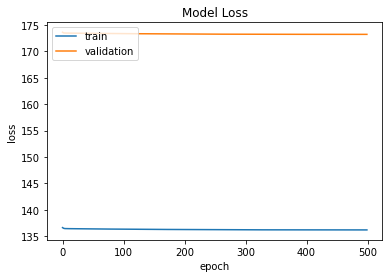

[I 2022-05-25 22:33:28,902] Trial 8 finished with value: 158.44983062168234 and parameters: {'filters1': 230, 'kernel_size': 20, 'activation1': 'relu', 'filters2': 790, 'activation2': 'tanh', 'filters3': 330, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 8.44639141992942e-06, 'batch_size': 18}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
175/175 - 11s - loss: 136.7888 - mse: 19345.4961 - val_loss: 173.8352 - val_mse: 31087.2930 - lr: 7.4314e-06 - 11s/epoch - 63ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
175/175 - 3s - loss: 136.6827 - mse: 19315.4297 - val_loss: 173.6623 - val_mse: 31026.6719 - lr: 7.4314e-06 - 3s/epoch - 20ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.5272 - mse: 19273.1875 - val_loss: 173.5590 - val_mse: 30991.3770 - lr: 7.4314e-06 - 4s/epoch - 23ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.4638 - mse: 19256.6152 - val_loss: 173.5366 - val_mse: 30983.9238 - lr: 7.4314e-06 - 4s/epoch - 25ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.4471 - mse: 19252.3535 - val_loss: 173.5303 - val_mse: 30981.8105 - lr: 7.4314e-06 - 4s/epoch - 25ms/step
Epoch 6/500



Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.3867 - mse: 19236.0820 - val_loss: 173.4761 - val_mse: 30963.1035 - lr: 7.4314e-06 - 4s/epoch - 25ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.3855 - mse: 19235.7383 - val_loss: 173.4749 - val_mse: 30962.6660 - lr: 7.4314e-06 - 4s/epoch - 24ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.3842 - mse: 19235.4004 - val_loss: 173.4736 - val_mse: 30962.2383 - lr: 7.4314e-06 - 4s/epoch - 23ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.3829 - mse: 19235.0566 - val_loss: 173.4724 - val_mse: 30961.8008 - lr: 7.4314e-06 - 4s/epoch - 25ms/step
Epoch 47/500

Epoch 00047: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.3817 - mse: 19234.7188 - val_loss: 173.4712 - val_mse: 30961.3828 - lr: 7.4314e-06 - 4s/epoch - 24ms/step
Epoch 48/5

Epoch 85/500

Epoch 00085: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.3374 - mse: 19222.6523 - val_loss: 173.4271 - val_mse: 30946.0664 - lr: 7.4314e-06 - 4s/epoch - 25ms/step
Epoch 86/500

Epoch 00086: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.3363 - mse: 19222.3594 - val_loss: 173.4260 - val_mse: 30945.6934 - lr: 7.4314e-06 - 4s/epoch - 23ms/step
Epoch 87/500

Epoch 00087: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.3352 - mse: 19222.0645 - val_loss: 173.4249 - val_mse: 30945.3125 - lr: 7.4314e-06 - 4s/epoch - 24ms/step
Epoch 88/500

Epoch 00088: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.3342 - mse: 19221.7695 - val_loss: 173.4238 - val_mse: 30944.9473 - lr: 7.4314e-06 - 4s/epoch - 24ms/step
Epoch 89/500

Epoch 00089: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.3331 - mse: 19221.4746 - val_loss: 173.4227 - val_mse: 30944.5664 - lr: 7.4314e-06 - 5s/epoch - 27ms/step
Epoch 90/5

Epoch 127/500

Epoch 00127: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.2952 - mse: 19211.1250 - val_loss: 173.3849 - val_mse: 30931.4434 - lr: 7.4314e-06 - 4s/epoch - 20ms/step
Epoch 128/500

Epoch 00128: val_loss did not improve from 171.94044
175/175 - 3s - loss: 136.2943 - mse: 19210.8789 - val_loss: 173.3840 - val_mse: 30931.1289 - lr: 7.4314e-06 - 3s/epoch - 19ms/step
Epoch 129/500

Epoch 00129: val_loss did not improve from 171.94044
175/175 - 3s - loss: 136.2933 - mse: 19210.6309 - val_loss: 173.3831 - val_mse: 30930.8125 - lr: 7.4314e-06 - 3s/epoch - 18ms/step
Epoch 130/500

Epoch 00130: val_loss did not improve from 171.94044
175/175 - 3s - loss: 136.2924 - mse: 19210.3789 - val_loss: 173.3821 - val_mse: 30930.4922 - lr: 7.4314e-06 - 3s/epoch - 20ms/step
Epoch 131/500

Epoch 00131: val_loss did not improve from 171.94044
175/175 - 3s - loss: 136.2915 - mse: 19210.1270 - val_loss: 173.3812 - val_mse: 30930.1777 - lr: 7.4314e-06 - 3s/epoch - 19ms/step
Epoch

Epoch 169/500

Epoch 00169: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.2596 - mse: 19201.4492 - val_loss: 173.3495 - val_mse: 30919.1719 - lr: 7.4314e-06 - 5s/epoch - 27ms/step
Epoch 170/500

Epoch 00170: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.2589 - mse: 19201.2363 - val_loss: 173.3488 - val_mse: 30918.9121 - lr: 7.4314e-06 - 5s/epoch - 27ms/step
Epoch 171/500

Epoch 00171: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.2581 - mse: 19201.0312 - val_loss: 173.3480 - val_mse: 30918.6426 - lr: 7.4314e-06 - 5s/epoch - 28ms/step
Epoch 172/500

Epoch 00172: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.2573 - mse: 19200.8242 - val_loss: 173.3472 - val_mse: 30918.3789 - lr: 7.4314e-06 - 4s/epoch - 23ms/step
Epoch 173/500

Epoch 00173: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.2566 - mse: 19200.6250 - val_loss: 173.3464 - val_mse: 30918.1152 - lr: 7.4314e-06 - 4s/epoch - 22ms/step
Epoch

Epoch 211/500

Epoch 00211: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.2303 - mse: 19193.4609 - val_loss: 173.3203 - val_mse: 30909.0391 - lr: 7.4314e-06 - 4s/epoch - 23ms/step
Epoch 212/500

Epoch 00212: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.2297 - mse: 19193.2930 - val_loss: 173.3196 - val_mse: 30908.8320 - lr: 7.4314e-06 - 4s/epoch - 23ms/step
Epoch 213/500

Epoch 00213: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.2291 - mse: 19193.1289 - val_loss: 173.3190 - val_mse: 30908.6094 - lr: 7.4314e-06 - 4s/epoch - 23ms/step
Epoch 214/500

Epoch 00214: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.2284 - mse: 19192.9551 - val_loss: 173.3184 - val_mse: 30908.3887 - lr: 7.4314e-06 - 4s/epoch - 22ms/step
Epoch 215/500

Epoch 00215: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.2279 - mse: 19192.7832 - val_loss: 173.3178 - val_mse: 30908.1777 - lr: 7.4314e-06 - 5s/epoch - 31ms/step
Epoch

Epoch 253/500

Epoch 00253: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.2065 - mse: 19186.9805 - val_loss: 173.2965 - val_mse: 30900.8066 - lr: 7.4314e-06 - 4s/epoch - 25ms/step
Epoch 254/500

Epoch 00254: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.2060 - mse: 19186.8379 - val_loss: 173.2960 - val_mse: 30900.6328 - lr: 7.4314e-06 - 5s/epoch - 27ms/step
Epoch 255/500

Epoch 00255: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.2055 - mse: 19186.7012 - val_loss: 173.2955 - val_mse: 30900.4648 - lr: 7.4314e-06 - 5s/epoch - 29ms/step
Epoch 256/500

Epoch 00256: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.2050 - mse: 19186.5684 - val_loss: 173.2950 - val_mse: 30900.2930 - lr: 7.4314e-06 - 5s/epoch - 30ms/step
Epoch 257/500

Epoch 00257: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.2045 - mse: 19186.4277 - val_loss: 173.2945 - val_mse: 30900.1230 - lr: 7.4314e-06 - 5s/epoch - 27ms/step
Epoch

Epoch 295/500

Epoch 00295: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.1873 - mse: 19181.7637 - val_loss: 173.2775 - val_mse: 30894.2012 - lr: 7.4314e-06 - 4s/epoch - 21ms/step
Epoch 296/500

Epoch 00296: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.1869 - mse: 19181.6504 - val_loss: 173.2771 - val_mse: 30894.0645 - lr: 7.4314e-06 - 4s/epoch - 24ms/step
Epoch 297/500

Epoch 00297: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.1865 - mse: 19181.5469 - val_loss: 173.2767 - val_mse: 30893.9238 - lr: 7.4314e-06 - 4s/epoch - 25ms/step
Epoch 298/500

Epoch 00298: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.1862 - mse: 19181.4258 - val_loss: 173.2763 - val_mse: 30893.7832 - lr: 7.4314e-06 - 4s/epoch - 22ms/step
Epoch 299/500

Epoch 00299: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.1857 - mse: 19181.3281 - val_loss: 173.2758 - val_mse: 30893.6426 - lr: 7.4314e-06 - 4s/epoch - 23ms/step
Epoch

Epoch 337/500

Epoch 00337: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.1721 - mse: 19177.6133 - val_loss: 173.2623 - val_mse: 30888.9336 - lr: 7.4314e-06 - 5s/epoch - 28ms/step
Epoch 338/500

Epoch 00338: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.1718 - mse: 19177.5234 - val_loss: 173.2619 - val_mse: 30888.8320 - lr: 7.4314e-06 - 5s/epoch - 28ms/step
Epoch 339/500

Epoch 00339: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.1715 - mse: 19177.4395 - val_loss: 173.2616 - val_mse: 30888.7227 - lr: 7.4314e-06 - 4s/epoch - 25ms/step
Epoch 340/500

Epoch 00340: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.1711 - mse: 19177.3477 - val_loss: 173.2613 - val_mse: 30888.6055 - lr: 7.4314e-06 - 5s/epoch - 27ms/step
Epoch 341/500

Epoch 00341: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.1708 - mse: 19177.2617 - val_loss: 173.2610 - val_mse: 30888.5039 - lr: 7.4314e-06 - 5s/epoch - 27ms/step
Epoch

Epoch 379/500

Epoch 00379: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.1601 - mse: 19174.3398 - val_loss: 173.2503 - val_mse: 30884.7832 - lr: 7.4314e-06 - 5s/epoch - 28ms/step
Epoch 380/500

Epoch 00380: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.1598 - mse: 19174.2695 - val_loss: 173.2500 - val_mse: 30884.7031 - lr: 7.4314e-06 - 5s/epoch - 29ms/step
Epoch 381/500

Epoch 00381: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.1596 - mse: 19174.1934 - val_loss: 173.2498 - val_mse: 30884.6152 - lr: 7.4314e-06 - 5s/epoch - 29ms/step
Epoch 382/500

Epoch 00382: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.1593 - mse: 19174.1250 - val_loss: 173.2495 - val_mse: 30884.5234 - lr: 7.4314e-06 - 5s/epoch - 28ms/step
Epoch 383/500

Epoch 00383: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.1591 - mse: 19174.0625 - val_loss: 173.2493 - val_mse: 30884.4395 - lr: 7.4314e-06 - 5s/epoch - 29ms/step
Epoch

Epoch 421/500

Epoch 00421: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.1506 - mse: 19171.7734 - val_loss: 173.2409 - val_mse: 30881.5312 - lr: 7.4314e-06 - 5s/epoch - 27ms/step
Epoch 422/500

Epoch 00422: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.1504 - mse: 19171.7148 - val_loss: 173.2407 - val_mse: 30881.4590 - lr: 7.4314e-06 - 5s/epoch - 29ms/step
Epoch 423/500

Epoch 00423: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.1503 - mse: 19171.6523 - val_loss: 173.2405 - val_mse: 30881.3945 - lr: 7.4314e-06 - 5s/epoch - 28ms/step
Epoch 424/500

Epoch 00424: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.1501 - mse: 19171.6094 - val_loss: 173.2403 - val_mse: 30881.3281 - lr: 7.4314e-06 - 4s/epoch - 20ms/step
Epoch 425/500

Epoch 00425: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.1499 - mse: 19171.5566 - val_loss: 173.2401 - val_mse: 30881.2578 - lr: 7.4314e-06 - 5s/epoch - 27ms/step
Epoch

Epoch 463/500

Epoch 00463: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.1433 - mse: 19169.7598 - val_loss: 173.2336 - val_mse: 30878.9883 - lr: 7.4314e-06 - 5s/epoch - 26ms/step
Epoch 464/500

Epoch 00464: val_loss did not improve from 171.94044
175/175 - 4s - loss: 136.1431 - mse: 19169.7188 - val_loss: 173.2334 - val_mse: 30878.9297 - lr: 7.4314e-06 - 4s/epoch - 22ms/step
Epoch 465/500

Epoch 00465: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.1430 - mse: 19169.6719 - val_loss: 173.2333 - val_mse: 30878.8867 - lr: 7.4314e-06 - 5s/epoch - 28ms/step
Epoch 466/500

Epoch 00466: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.1428 - mse: 19169.6367 - val_loss: 173.2331 - val_mse: 30878.8340 - lr: 7.4314e-06 - 5s/epoch - 28ms/step
Epoch 467/500

Epoch 00467: val_loss did not improve from 171.94044
175/175 - 5s - loss: 136.1427 - mse: 19169.5977 - val_loss: 173.2329 - val_mse: 30878.7793 - lr: 7.4314e-06 - 5s/epoch - 29ms/step
Epoch

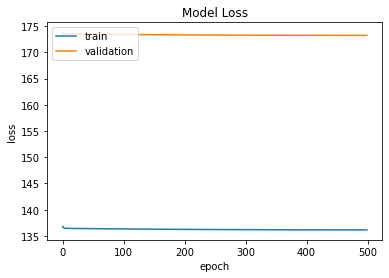

[I 2022-05-25 23:11:12,107] Trial 9 finished with value: 158.46521951861723 and parameters: {'filters1': 590, 'kernel_size': 14, 'activation1': 'relu', 'filters2': 530, 'activation2': 'tanh', 'filters3': 740, 'activation3': 'relu', 'optimizer_name': 'Adam', 'learning_rate': 7.431410639004986e-06, 'batch_size': 15}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
436/436 - 19s - loss: 135.9770 - mse: 19211.9863 - val_loss: 172.9167 - val_mse: 30915.0879 - lr: 3.1265e-04 - 19s/epoch - 44ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
436/436 - 10s - loss: 135.8950 - mse: 19189.8906 - val_loss: 172.8641 - val_mse: 30896.9023 - lr: 3.1265e-04 - 10s/epoch - 23ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
436/436 - 10s - loss: 135.8566 - mse: 19179.5957 - val_loss: 172.8367 - val_mse: 30887.4316 - lr: 3.1265e-04 - 10s/epoch - 22ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
436/436 - 8s - loss: 135.8358 - mse: 19174.0000 - val_loss: 172.8210 - val_mse: 30882.0098 - lr: 3.1265e-04 - 8s/epoch - 19ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
436/436 - 10s - loss: 135.8234 - mse: 19170.6562 - val_loss: 172.8113 - val_mse: 30878.6602 - lr: 3.1265e-04 - 10s/epoch - 22ms/step
Epoch 6

Epoch 42/500

Epoch 00042: val_loss did not improve from 171.94044
436/436 - 9s - loss: 135.7946 - mse: 19162.9004 - val_loss: 172.7871 - val_mse: 30870.2871 - lr: 2.1886e-04 - 9s/epoch - 21ms/step
Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
436/436 - 10s - loss: 135.7946 - mse: 19162.9004 - val_loss: 172.7871 - val_mse: 30870.2871 - lr: 2.1886e-04 - 10s/epoch - 22ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
436/436 - 10s - loss: 135.7946 - mse: 19162.8984 - val_loss: 172.7871 - val_mse: 30870.2852 - lr: 2.1886e-04 - 10s/epoch - 23ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
436/436 - 10s - loss: 135.7946 - mse: 19162.8984 - val_loss: 172.7871 - val_mse: 30870.2852 - lr: 2.1886e-04 - 10s/epoch - 23ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 171.94044

Epoch 00046: ReduceLROnPlateau reducing learning rate to 0.0001531999252620153.
436/436 - 9s - loss: 135.7946 - mse: 19162.8984 - val_

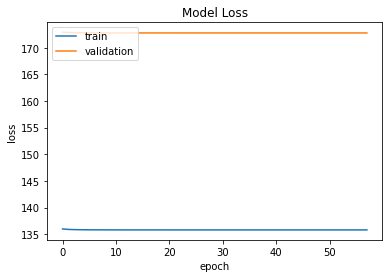

[I 2022-05-25 23:20:38,333] Trial 10 finished with value: 158.4454683930913 and parameters: {'filters1': 890, 'kernel_size': 6, 'activation1': 'relu', 'filters2': 580, 'activation2': 'tanh', 'filters3': 530, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.0003126529089360234, 'batch_size': 6}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
2616/2616 - 57s - loss: 135.3504 - mse: 19192.5488 - val_loss: 171.9821 - val_mse: 30884.6309 - lr: 1.8167e-04 - 57s/epoch - 22ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
2616/2616 - 44s - loss: 135.2603 - mse: 19168.9199 - val_loss: 171.9517 - val_mse: 30874.1582 - lr: 1.8167e-04 - 44s/epoch - 17ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
2616/2616 - 43s - loss: 135.2439 - mse: 19164.6680 - val_loss: 171.9439 - val_mse: 30871.4980 - lr: 1.8167e-04 - 43s/epoch - 16ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
2616/2616 - 45s - loss: 135.2394 - mse: 19163.4668 - val_loss: 171.9417 - val_mse: 30870.6719 - lr: 1.8167e-04 - 45s/epoch - 17ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
2616/2616 - 44s - loss: 135.2380 - mse: 19163.0957 - val_loss: 171.9407 - val_mse: 30870.4102 - lr: 1.8167e-04 - 44s/epoch - 17ms/

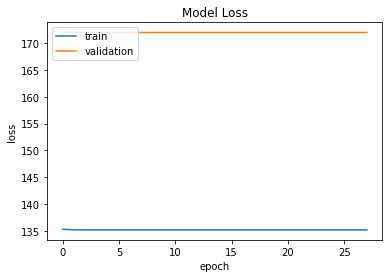

[I 2022-05-25 23:40:11,229] Trial 11 finished with value: 158.44546757601 and parameters: {'filters1': 830, 'kernel_size': 18, 'activation1': 'relu', 'filters2': 270, 'activation2': 'relu', 'filters3': 450, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.00018167004052367598, 'batch_size': 1}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
524/524 - 17s - loss: 135.8560 - mse: 19195.4688 - val_loss: 172.7549 - val_mse: 30892.8164 - lr: 7.0154e-04 - 17s/epoch - 33ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
524/524 - 4s - loss: 135.7797 - mse: 19175.0391 - val_loss: 172.7208 - val_mse: 30881.0645 - lr: 7.0154e-04 - 4s/epoch - 8ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
524/524 - 3s - loss: 135.7580 - mse: 19169.2520 - val_loss: 172.7075 - val_mse: 30876.4277 - lr: 7.0154e-04 - 3s/epoch - 6ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
524/524 - 2s - loss: 135.7484 - mse: 19166.7207 - val_loss: 172.7008 - val_mse: 30874.1680 - lr: 7.0154e-04 - 2s/epoch - 4ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
524/524 - 2s - loss: 135.7434 - mse: 19165.3711 - val_loss: 172.6972 - val_mse: 30872.8848 - lr: 7.0154e-04 - 2s/epoch - 4ms/step
Epoch 6/500

Epoc

Epoch 42/500

Epoch 00042: val_loss did not improve from 171.94044
524/524 - 4s - loss: 135.7342 - mse: 19162.9043 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 3.4376e-04 - 4s/epoch - 8ms/step
Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
524/524 - 4s - loss: 135.7342 - mse: 19162.9043 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 3.4376e-04 - 4s/epoch - 7ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
524/524 - 3s - loss: 135.7342 - mse: 19162.9043 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 3.4376e-04 - 3s/epoch - 7ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
524/524 - 4s - loss: 135.7342 - mse: 19162.9043 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 3.4376e-04 - 4s/epoch - 8ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 171.94044
524/524 - 4s - loss: 135.7342 - mse: 19162.9043 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 3.4376e-04 - 4s/epoch - 7ms/step
Epoch 47/500

E

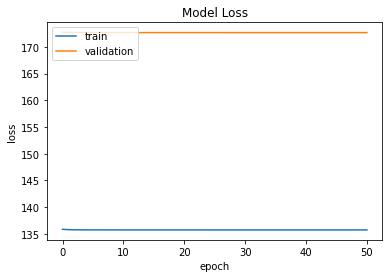

[I 2022-05-25 23:43:31,725] Trial 12 finished with value: 158.44546757601 and parameters: {'filters1': 40, 'kernel_size': 20, 'activation1': 'relu', 'filters2': 150, 'activation2': 'relu', 'filters3': 510, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.0007015416874312154, 'batch_size': 5}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
2616/2616 - 34s - loss: 135.2792 - mse: 19174.0703 - val_loss: 171.9610 - val_mse: 30877.3418 - lr: 9.0054e-05 - 34s/epoch - 13ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
2616/2616 - 23s - loss: 135.2502 - mse: 19166.3125 - val_loss: 171.9481 - val_mse: 30872.9355 - lr: 9.0054e-05 - 23s/epoch - 9ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
2616/2616 - 22s - loss: 135.2422 - mse: 19164.2480 - val_loss: 171.9434 - val_mse: 30871.3398 - lr: 9.0054e-05 - 22s/epoch - 9ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
2616/2616 - 23s - loss: 135.2393 - mse: 19163.4375 - val_loss: 171.9417 - val_mse: 30870.6914 - lr: 9.0054e-05 - 23s/epoch - 9ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
2616/2616 - 23s - loss: 135.2380 - mse: 19163.1191 - val_loss: 171.9410 - val_mse: 30870.4492 - lr: 9.0054e-05 - 23s/epoch - 9ms/step

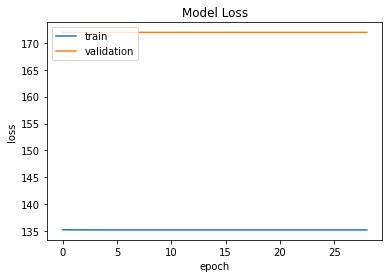

[I 2022-05-25 23:54:04,025] Trial 13 finished with value: 158.44546757601 and parameters: {'filters1': 360, 'kernel_size': 14, 'activation1': 'relu', 'filters2': 390, 'activation2': 'tanh', 'filters3': 260, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 9.005413691251669e-05, 'batch_size': 1}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
374/374 - 9s - loss: 135.9793 - mse: 19193.3691 - val_loss: 172.8839 - val_mse: 30897.4648 - lr: 7.6541e-05 - 9s/epoch - 25ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
374/374 - 4s - loss: 135.9355 - mse: 19182.1289 - val_loss: 172.8692 - val_mse: 30892.3906 - lr: 7.6541e-05 - 4s/epoch - 11ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
374/374 - 5s - loss: 135.9225 - mse: 19178.6484 - val_loss: 172.8580 - val_mse: 30888.5234 - lr: 7.6541e-05 - 5s/epoch - 12ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
374/374 - 4s - loss: 135.9126 - mse: 19175.9512 - val_loss: 172.8492 - val_mse: 30885.4824 - lr: 7.6541e-05 - 4s/epoch - 11ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
374/374 - 4s - loss: 135.9048 - mse: 19173.8164 - val_loss: 172.8422 - val_mse: 30883.0488 - lr: 7.6541e-05 - 4s/epoch - 10ms/step
Epoch 6/500

Ep

Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
374/374 - 7s - loss: 135.8645 - mse: 19162.9453 - val_loss: 172.8055 - val_mse: 30870.3457 - lr: 7.6541e-05 - 7s/epoch - 18ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
374/374 - 7s - loss: 135.8645 - mse: 19162.9395 - val_loss: 172.8054 - val_mse: 30870.3301 - lr: 7.6541e-05 - 7s/epoch - 18ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
374/374 - 7s - loss: 135.8645 - mse: 19162.9336 - val_loss: 172.8054 - val_mse: 30870.3281 - lr: 7.6541e-05 - 7s/epoch - 18ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 171.94044
374/374 - 6s - loss: 135.8645 - mse: 19162.9277 - val_loss: 172.8054 - val_mse: 30870.3242 - lr: 7.6541e-05 - 6s/epoch - 17ms/step
Epoch 47/500

Epoch 00047: val_loss did not improve from 171.94044
374/374 - 6s - loss: 135.8645 - mse: 19162.9219 - val_loss: 172.8054 - val_mse: 30870.3203 - lr: 7.6541e-05 - 6s/epoch - 17ms/step
Epoch 48/5

Epoch 83/500

Epoch 00083: val_loss did not improve from 171.94044
374/374 - 6s - loss: 135.8643 - mse: 19162.8984 - val_loss: 172.8053 - val_mse: 30870.2930 - lr: 1.8378e-05 - 6s/epoch - 15ms/step
Epoch 84/500

Epoch 00084: val_loss did not improve from 171.94044
374/374 - 5s - loss: 135.8643 - mse: 19162.8984 - val_loss: 172.8053 - val_mse: 30870.2930 - lr: 1.8378e-05 - 5s/epoch - 13ms/step
Epoch 85/500

Epoch 00085: val_loss did not improve from 171.94044
374/374 - 5s - loss: 135.8643 - mse: 19162.8984 - val_loss: 172.8053 - val_mse: 30870.2930 - lr: 1.8378e-05 - 5s/epoch - 13ms/step
Epoch 86/500

Epoch 00086: val_loss did not improve from 171.94044
374/374 - 5s - loss: 135.8643 - mse: 19162.8984 - val_loss: 172.8053 - val_mse: 30870.2930 - lr: 1.8378e-05 - 5s/epoch - 13ms/step
Epoch 87/500

Epoch 00087: val_loss did not improve from 171.94044
374/374 - 6s - loss: 135.8643 - mse: 19162.8984 - val_loss: 172.8053 - val_mse: 30870.2930 - lr: 1.8378e-05 - 6s/epoch - 15ms/step


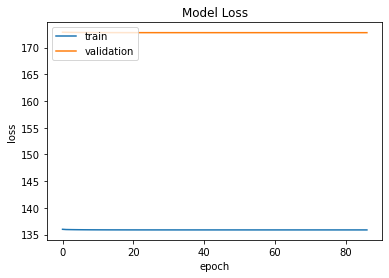

[I 2022-05-26 00:02:52,198] Trial 14 finished with value: 158.445470600533 and parameters: {'filters1': 740, 'kernel_size': 18, 'activation1': 'relu', 'filters2': 210, 'activation2': 'tanh', 'filters3': 130, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 7.654138600761298e-05, 'batch_size': 7}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
654/654 - 21s - loss: 135.6679 - mse: 19166.1230 - val_loss: 172.5893 - val_mse: 30870.6426 - lr: 0.0098 - 21s/epoch - 32ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
654/654 - 10s - loss: 135.6562 - mse: 19163.0488 - val_loss: 172.5887 - val_mse: 30870.4062 - lr: 0.0098 - 10s/epoch - 15ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
654/654 - 10s - loss: 135.6558 - mse: 19162.9629 - val_loss: 172.5885 - val_mse: 30870.3457 - lr: 0.0098 - 10s/epoch - 15ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
654/654 - 9s - loss: 135.6557 - mse: 19162.9277 - val_loss: 172.5884 - val_mse: 30870.3184 - lr: 0.0098 - 9s/epoch - 14ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
654/654 - 10s - loss: 135.6557 - mse: 19162.9121 - val_loss: 172.5884 - val_mse: 30870.3086 - lr: 0.0098 - 10s/epoch - 15ms/step
Epoch 6/500

Epoch 00006: v

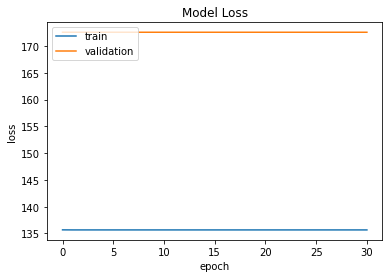

[I 2022-05-26 00:08:30,607] Trial 15 finished with value: 158.44546757601 and parameters: {'filters1': 410, 'kernel_size': 12, 'activation1': 'relu', 'filters2': 610, 'activation2': 'relu', 'filters3': 570, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.009842296937282398, 'batch_size': 4}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
291/291 - 16s - loss: 136.5001 - mse: 19309.0605 - val_loss: 173.4016 - val_mse: 31018.4531 - lr: 4.3992e-05 - 16s/epoch - 56ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
291/291 - 2s - loss: 136.3789 - mse: 19278.3926 - val_loss: 173.3935 - val_mse: 31015.6699 - lr: 4.3992e-05 - 2s/epoch - 8ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
291/291 - 3s - loss: 136.3714 - mse: 19276.3906 - val_loss: 173.3869 - val_mse: 31013.4102 - lr: 4.3992e-05 - 3s/epoch - 10ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
291/291 - 3s - loss: 136.3650 - mse: 19274.6250 - val_loss: 173.3806 - val_mse: 31011.2207 - lr: 4.3992e-05 - 3s/epoch - 11ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
291/291 - 3s - loss: 136.3586 - mse: 19272.9219 - val_loss: 173.3744 - val_mse: 31009.0801 - lr: 4.3992e-05 - 3s/epoch - 12ms/step
Epoch 6/500

E

Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
291/291 - 3s - loss: 136.1634 - mse: 19219.7441 - val_loss: 173.1805 - val_mse: 30941.8770 - lr: 4.3992e-05 - 3s/epoch - 9ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
291/291 - 3s - loss: 136.1594 - mse: 19218.6523 - val_loss: 173.1766 - val_mse: 30940.5137 - lr: 4.3992e-05 - 3s/epoch - 10ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
291/291 - 3s - loss: 136.1555 - mse: 19217.5801 - val_loss: 173.1727 - val_mse: 30939.1504 - lr: 4.3992e-05 - 3s/epoch - 11ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 171.94044
291/291 - 4s - loss: 136.1517 - mse: 19216.5312 - val_loss: 173.1688 - val_mse: 30937.8262 - lr: 4.3992e-05 - 4s/epoch - 12ms/step
Epoch 47/500

Epoch 00047: val_loss did not improve from 171.94044
291/291 - 3s - loss: 136.1479 - mse: 19215.4902 - val_loss: 173.1650 - val_mse: 30936.5039 - lr: 4.3992e-05 - 3s/epoch - 10ms/step
Epoch 48/50

Epoch 85/500

Epoch 00085: val_loss did not improve from 171.94044
291/291 - 3s - loss: 136.0422 - mse: 19186.7285 - val_loss: 173.0604 - val_mse: 30900.2715 - lr: 4.3992e-05 - 3s/epoch - 10ms/step
Epoch 86/500

Epoch 00086: val_loss did not improve from 171.94044
291/291 - 4s - loss: 136.0402 - mse: 19186.2168 - val_loss: 173.0585 - val_mse: 30899.6211 - lr: 4.3992e-05 - 4s/epoch - 12ms/step
Epoch 87/500

Epoch 00087: val_loss did not improve from 171.94044
291/291 - 4s - loss: 136.0384 - mse: 19185.7227 - val_loss: 173.0567 - val_mse: 30898.9941 - lr: 4.3992e-05 - 4s/epoch - 13ms/step
Epoch 88/500

Epoch 00088: val_loss did not improve from 171.94044
291/291 - 4s - loss: 136.0366 - mse: 19185.2285 - val_loss: 173.0549 - val_mse: 30898.3770 - lr: 4.3992e-05 - 4s/epoch - 13ms/step
Epoch 89/500

Epoch 00089: val_loss did not improve from 171.94044
291/291 - 4s - loss: 136.0348 - mse: 19184.7441 - val_loss: 173.0531 - val_mse: 30897.7559 - lr: 4.3992e-05 - 4s/epoch - 12ms/step
Epoch 90/5

Epoch 127/500

Epoch 00127: val_loss did not improve from 171.94044
291/291 - 3s - loss: 135.9683 - mse: 19166.6582 - val_loss: 172.9873 - val_mse: 30874.9746 - lr: 4.3992e-05 - 3s/epoch - 12ms/step
Epoch 128/500

Epoch 00128: val_loss did not improve from 171.94044
291/291 - 4s - loss: 135.9677 - mse: 19166.5039 - val_loss: 172.9867 - val_mse: 30874.7852 - lr: 4.3992e-05 - 4s/epoch - 12ms/step
Epoch 129/500

Epoch 00129: val_loss did not improve from 171.94044
291/291 - 4s - loss: 135.9672 - mse: 19166.3555 - val_loss: 172.9862 - val_mse: 30874.5898 - lr: 4.3992e-05 - 4s/epoch - 13ms/step
Epoch 130/500

Epoch 00130: val_loss did not improve from 171.94044
291/291 - 4s - loss: 135.9666 - mse: 19166.2051 - val_loss: 172.9856 - val_mse: 30874.4121 - lr: 4.3992e-05 - 4s/epoch - 13ms/step
Epoch 131/500

Epoch 00131: val_loss did not improve from 171.94044
291/291 - 3s - loss: 135.9661 - mse: 19166.0723 - val_loss: 172.9851 - val_mse: 30874.2363 - lr: 4.3992e-05 - 3s/epoch - 12ms/step
Epoch

Epoch 169/500

Epoch 00169: val_loss did not improve from 171.94044
291/291 - 3s - loss: 135.9567 - mse: 19163.5176 - val_loss: 172.9760 - val_mse: 30871.0645 - lr: 4.3992e-05 - 3s/epoch - 11ms/step
Epoch 170/500

Epoch 00170: val_loss did not improve from 171.94044
291/291 - 3s - loss: 135.9566 - mse: 19163.4922 - val_loss: 172.9759 - val_mse: 30871.0215 - lr: 4.3992e-05 - 3s/epoch - 11ms/step
Epoch 171/500

Epoch 00171: val_loss did not improve from 171.94044
291/291 - 3s - loss: 135.9565 - mse: 19163.4746 - val_loss: 172.9758 - val_mse: 30870.9902 - lr: 4.3992e-05 - 3s/epoch - 9ms/step
Epoch 172/500

Epoch 00172: val_loss did not improve from 171.94044
291/291 - 3s - loss: 135.9564 - mse: 19163.4551 - val_loss: 172.9757 - val_mse: 30870.9629 - lr: 4.3992e-05 - 3s/epoch - 9ms/step
Epoch 173/500

Epoch 00173: val_loss did not improve from 171.94044
291/291 - 3s - loss: 135.9563 - mse: 19163.4355 - val_loss: 172.9756 - val_mse: 30870.9355 - lr: 4.3992e-05 - 3s/epoch - 10ms/step
Epoch 1

Epoch 211/500

Epoch 00211: val_loss did not improve from 171.94044
291/291 - 3s - loss: 135.9548 - mse: 19163.0020 - val_loss: 172.9741 - val_mse: 30870.4102 - lr: 4.3992e-05 - 3s/epoch - 11ms/step
Epoch 212/500

Epoch 00212: val_loss did not improve from 171.94044
291/291 - 3s - loss: 135.9548 - mse: 19163.0000 - val_loss: 172.9741 - val_mse: 30870.4062 - lr: 4.3992e-05 - 3s/epoch - 11ms/step
Epoch 213/500

Epoch 00213: val_loss did not improve from 171.94044
291/291 - 3s - loss: 135.9548 - mse: 19162.9980 - val_loss: 172.9741 - val_mse: 30870.3984 - lr: 4.3992e-05 - 3s/epoch - 10ms/step
Epoch 214/500

Epoch 00214: val_loss did not improve from 171.94044
291/291 - 2s - loss: 135.9548 - mse: 19162.9922 - val_loss: 172.9740 - val_mse: 30870.3945 - lr: 4.3992e-05 - 2s/epoch - 8ms/step
Epoch 215/500

Epoch 00215: val_loss did not improve from 171.94044
291/291 - 2s - loss: 135.9547 - mse: 19162.9902 - val_loss: 172.9740 - val_mse: 30870.3848 - lr: 4.3992e-05 - 2s/epoch - 8ms/step
Epoch 2

Epoch 251/500

Epoch 00251: val_loss did not improve from 171.94044
291/291 - 3s - loss: 135.9545 - mse: 19162.9297 - val_loss: 172.9739 - val_mse: 30870.3301 - lr: 1.0562e-05 - 3s/epoch - 11ms/step
Epoch 252/500

Epoch 00252: val_loss did not improve from 171.94044
291/291 - 3s - loss: 135.9545 - mse: 19162.9297 - val_loss: 172.9739 - val_mse: 30870.3301 - lr: 1.0562e-05 - 3s/epoch - 11ms/step
Epoch 253/500

Epoch 00253: val_loss did not improve from 171.94044
291/291 - 3s - loss: 135.9545 - mse: 19162.9258 - val_loss: 172.9738 - val_mse: 30870.3242 - lr: 1.0562e-05 - 3s/epoch - 11ms/step
Epoch 254/500

Epoch 00254: val_loss did not improve from 171.94044
291/291 - 3s - loss: 135.9545 - mse: 19162.9258 - val_loss: 172.9738 - val_mse: 30870.3242 - lr: 1.0562e-05 - 3s/epoch - 11ms/step
Epoch 255/500

Epoch 00255: val_loss did not improve from 171.94044
291/291 - 2s - loss: 135.9545 - mse: 19162.9258 - val_loss: 172.9738 - val_mse: 30870.3242 - lr: 1.0562e-05 - 2s/epoch - 8ms/step
Epoch 

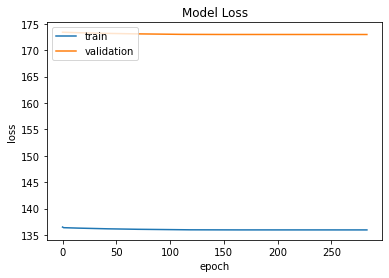

[I 2022-05-26 00:23:33,004] Trial 16 finished with value: 158.44556684357997 and parameters: {'filters1': 170, 'kernel_size': 18, 'activation1': 'relu', 'filters2': 430, 'activation2': 'relu', 'filters3': 350, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 4.399207849938641e-05, 'batch_size': 9}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
1308/1308 - 37s - loss: 135.4460 - mse: 19168.8320 - val_loss: 172.1864 - val_mse: 30872.8984 - lr: 4.7690e-04 - 37s/epoch - 28ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
1308/1308 - 24s - loss: 135.4277 - mse: 19164.0684 - val_loss: 172.1813 - val_mse: 30871.1504 - lr: 4.7690e-04 - 24s/epoch - 18ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
1308/1308 - 23s - loss: 135.4251 - mse: 19163.3496 - val_loss: 172.1801 - val_mse: 30870.6641 - lr: 4.7690e-04 - 23s/epoch - 17ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
1308/1308 - 24s - loss: 135.4241 - mse: 19163.1113 - val_loss: 172.1795 - val_mse: 30870.4746 - lr: 4.7690e-04 - 24s/epoch - 18ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
1308/1308 - 24s - loss: 135.4237 - mse: 19162.9941 - val_loss: 172.1791 - val_mse: 30870.3887 - lr: 4.7690e-04 - 24s/epoch - 19ms/

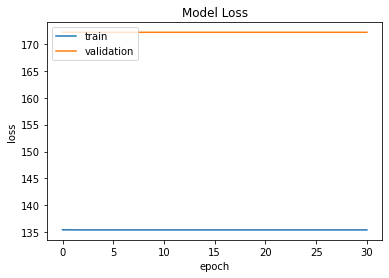

[I 2022-05-26 00:35:38,263] Trial 17 finished with value: 158.44546757601 and parameters: {'filters1': 700, 'kernel_size': 8, 'activation1': 'relu', 'filters2': 680, 'activation2': 'tanh', 'filters3': 420, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.0004768973910828164, 'batch_size': 2}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
654/654 - 29s - loss: 135.6568 - mse: 19163.2012 - val_loss: 172.5883 - val_mse: 30870.2871 - lr: 0.0097 - 29s/epoch - 44ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
654/654 - 16s - loss: 135.6556 - mse: 19162.8984 - val_loss: 172.5883 - val_mse: 30870.2871 - lr: 0.0097 - 16s/epoch - 24ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
654/654 - 17s - loss: 135.6556 - mse: 19162.8984 - val_loss: 172.5883 - val_mse: 30870.2871 - lr: 0.0097 - 17s/epoch - 26ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
654/654 - 15s - loss: 135.6556 - mse: 19162.8984 - val_loss: 172.5883 - val_mse: 30870.2871 - lr: 0.0097 - 15s/epoch - 23ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
654/654 - 17s - loss: 135.6556 - mse: 19162.8984 - val_loss: 172.5883 - val_mse: 30870.2871 - lr: 0.0097 - 17s/epoch - 25ms/step
Epoch 6/500

Epoch 00006:

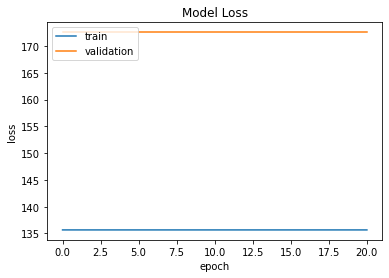

[I 2022-05-26 00:41:24,797] Trial 18 finished with value: 158.44546792191272 and parameters: {'filters1': 970, 'kernel_size': 8, 'activation1': 'tanh', 'filters2': 650, 'activation2': 'tanh', 'filters3': 630, 'activation3': 'tanh', 'optimizer_name': 'RMSprop', 'learning_rate': 0.00969641202225761, 'momentum': 0.10622800043235756, 'batch_size': 4}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
327/327 - 20s - loss: 135.9011 - mse: 19167.4668 - val_loss: 172.9776 - val_mse: 30870.9902 - lr: 0.0091 - 20s/epoch - 60ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
327/327 - 5s - loss: 135.8846 - mse: 19163.2246 - val_loss: 172.9763 - val_mse: 30870.5391 - lr: 0.0091 - 5s/epoch - 16ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
327/327 - 6s - loss: 135.8839 - mse: 19163.0312 - val_loss: 172.9760 - val_mse: 30870.4160 - lr: 0.0091 - 6s/epoch - 18ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
327/327 - 5s - loss: 135.8837 - mse: 19162.9785 - val_loss: 172.9758 - val_mse: 30870.3730 - lr: 0.0091 - 5s/epoch - 17ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
327/327 - 5s - loss: 135.8836 - mse: 19162.9473 - val_loss: 172.9757 - val_mse: 30870.3418 - lr: 0.0091 - 5s/epoch - 16ms/step
Epoch 6/500

Epoch 00006: val_los

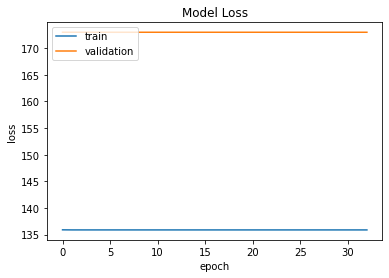

[I 2022-05-26 00:44:41,338] Trial 19 finished with value: 158.4454689767208 and parameters: {'filters1': 390, 'kernel_size': 12, 'activation1': 'relu', 'filters2': 650, 'activation2': 'relu', 'filters3': 580, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.009102910148660985, 'batch_size': 8}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
202/202 - 17s - loss: 136.3449 - mse: 19237.1230 - val_loss: 173.2836 - val_mse: 30950.1309 - lr: 6.1298e-04 - 17s/epoch - 83ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
202/202 - 5s - loss: 136.2745 - mse: 19217.9121 - val_loss: 173.2306 - val_mse: 30931.7988 - lr: 6.1298e-04 - 5s/epoch - 23ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
202/202 - 4s - loss: 136.2287 - mse: 19205.5137 - val_loss: 173.1915 - val_mse: 30918.2539 - lr: 6.1298e-04 - 4s/epoch - 21ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
202/202 - 5s - loss: 136.1950 - mse: 19196.3848 - val_loss: 173.1627 - val_mse: 30908.2715 - lr: 6.1298e-04 - 5s/epoch - 24ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
202/202 - 5s - loss: 136.1700 - mse: 19189.6289 - val_loss: 173.1413 - val_mse: 30900.8477 - lr: 6.1298e-04 - 5s/epoch - 23ms/step
Epoch 6/500



Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
202/202 - 4s - loss: 136.0724 - mse: 19163.1660 - val_loss: 173.0540 - val_mse: 30870.6113 - lr: 6.1298e-04 - 4s/epoch - 20ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
202/202 - 4s - loss: 136.0723 - mse: 19163.1387 - val_loss: 173.0539 - val_mse: 30870.5898 - lr: 6.1298e-04 - 4s/epoch - 21ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
202/202 - 4s - loss: 136.0722 - mse: 19163.1230 - val_loss: 173.0538 - val_mse: 30870.5527 - lr: 6.1298e-04 - 4s/epoch - 22ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 171.94044
202/202 - 4s - loss: 136.0721 - mse: 19163.0957 - val_loss: 173.0537 - val_mse: 30870.5254 - lr: 6.1298e-04 - 4s/epoch - 22ms/step
Epoch 47/500

Epoch 00047: val_loss did not improve from 171.94044
202/202 - 4s - loss: 136.0721 - mse: 19163.0801 - val_loss: 173.0536 - val_mse: 30870.5098 - lr: 6.1298e-04 - 4s/epoch - 18ms/step
Epoch 48/5

Epoch 84/500

Epoch 00084: val_loss did not improve from 171.94044
202/202 - 4s - loss: 136.0714 - mse: 19162.8984 - val_loss: 173.0530 - val_mse: 30870.2969 - lr: 3.0036e-04 - 4s/epoch - 21ms/step
Epoch 85/500

Epoch 00085: val_loss did not improve from 171.94044
202/202 - 4s - loss: 136.0714 - mse: 19162.8984 - val_loss: 173.0530 - val_mse: 30870.2969 - lr: 3.0036e-04 - 4s/epoch - 21ms/step
Epoch 86/500

Epoch 00086: val_loss did not improve from 171.94044
202/202 - 4s - loss: 136.0714 - mse: 19162.8984 - val_loss: 173.0530 - val_mse: 30870.2969 - lr: 3.0036e-04 - 4s/epoch - 22ms/step
Epoch 87/500

Epoch 00087: val_loss did not improve from 171.94044
202/202 - 5s - loss: 136.0714 - mse: 19162.8965 - val_loss: 173.0530 - val_mse: 30870.2910 - lr: 3.0036e-04 - 5s/epoch - 22ms/step
Epoch 88/500

Epoch 00088: val_loss did not improve from 171.94044

Epoch 00088: ReduceLROnPlateau reducing learning rate to 0.00021025267196819186.
202/202 - 4s - loss: 136.0714 - mse: 19162.8945 - val_loss:

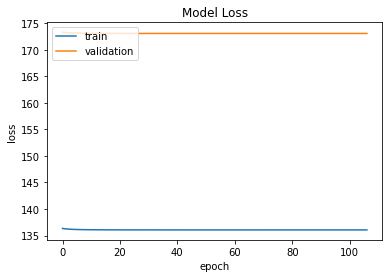

[I 2022-05-26 00:52:38,762] Trial 20 finished with value: 158.44547557173405 and parameters: {'filters1': 690, 'kernel_size': 2, 'activation1': 'relu', 'filters2': 670, 'activation2': 'tanh', 'filters3': 460, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.0006129815869898738, 'batch_size': 13}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
1308/1308 - 25s - loss: 135.5335 - mse: 19192.2129 - val_loss: 172.2382 - val_mse: 30890.6973 - lr: 3.0843e-04 - 25s/epoch - 19ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
1308/1308 - 14s - loss: 135.4626 - mse: 19173.3770 - val_loss: 172.2043 - val_mse: 30879.0312 - lr: 3.0843e-04 - 14s/epoch - 10ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
1308/1308 - 13s - loss: 135.4414 - mse: 19167.7285 - val_loss: 172.1915 - val_mse: 30874.6055 - lr: 3.0843e-04 - 13s/epoch - 10ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
1308/1308 - 13s - loss: 135.4326 - mse: 19165.3672 - val_loss: 172.1854 - val_mse: 30872.5508 - lr: 3.0843e-04 - 13s/epoch - 10ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
1308/1308 - 12s - loss: 135.4282 - mse: 19164.2109 - val_loss: 172.1825 - val_mse: 30871.5137 - lr: 3.0843e-04 - 12s/epoch - 9ms/s

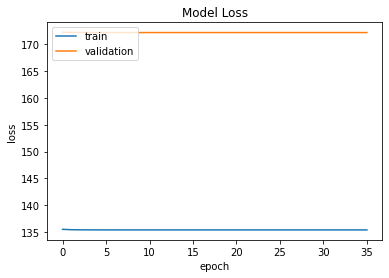

[I 2022-05-26 01:01:05,671] Trial 21 finished with value: 158.44546757601 and parameters: {'filters1': 480, 'kernel_size': 6, 'activation1': 'relu', 'filters2': 420, 'activation2': 'tanh', 'filters3': 380, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.0003084254292305317, 'batch_size': 2}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
872/872 - 17s - loss: 135.6624 - mse: 19187.3066 - val_loss: 172.4194 - val_mse: 30886.5312 - lr: 3.4970e-05 - 17s/epoch - 19ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
872/872 - 5s - loss: 135.6096 - mse: 19173.8223 - val_loss: 172.4075 - val_mse: 30882.4590 - lr: 3.4970e-05 - 5s/epoch - 5ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
872/872 - 4s - loss: 135.6006 - mse: 19171.4277 - val_loss: 172.4005 - val_mse: 30880.0156 - lr: 3.4970e-05 - 4s/epoch - 5ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
872/872 - 4s - loss: 135.5946 - mse: 19169.7773 - val_loss: 172.3951 - val_mse: 30878.1797 - lr: 3.4970e-05 - 4s/epoch - 4ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
872/872 - 6s - loss: 135.5896 - mse: 19168.4902 - val_loss: 172.3909 - val_mse: 30876.7227 - lr: 3.4970e-05 - 6s/epoch - 6ms/step
Epoch 6/500

Epoc

Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
872/872 - 7s - loss: 135.5690 - mse: 19162.8906 - val_loss: 172.3723 - val_mse: 30870.2930 - lr: 3.4970e-05 - 7s/epoch - 8ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
872/872 - 6s - loss: 135.5690 - mse: 19162.8906 - val_loss: 172.3723 - val_mse: 30870.2910 - lr: 3.4970e-05 - 6s/epoch - 7ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
872/872 - 7s - loss: 135.5690 - mse: 19162.8906 - val_loss: 172.3723 - val_mse: 30870.2910 - lr: 3.4970e-05 - 7s/epoch - 8ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 171.94044
872/872 - 7s - loss: 135.5690 - mse: 19162.8906 - val_loss: 172.3723 - val_mse: 30870.2910 - lr: 3.4970e-05 - 7s/epoch - 8ms/step
Epoch 47/500

Epoch 00047: val_loss did not improve from 171.94044

Epoch 00047: ReduceLROnPlateau reducing learning rate to 2.447885381116066e-05.
872/872 - 6s - loss: 135.5690 - mse: 19162.8906 - val_loss: 172.

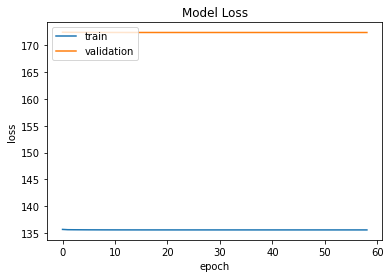

[I 2022-05-26 01:07:23,665] Trial 22 finished with value: 158.4454683786453 and parameters: {'filters1': 450, 'kernel_size': 4, 'activation1': 'relu', 'filters2': 10, 'activation2': 'tanh', 'filters3': 230, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 3.4969790526559744e-05, 'batch_size': 3}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
2616/2616 - 58s - loss: 135.3189 - mse: 19184.2949 - val_loss: 171.9695 - val_mse: 30880.2812 - lr: 1.8820e-04 - 58s/epoch - 22ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
2616/2616 - 43s - loss: 135.2532 - mse: 19167.0684 - val_loss: 171.9483 - val_mse: 30873.0117 - lr: 1.8820e-04 - 43s/epoch - 16ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
2616/2616 - 34s - loss: 135.2418 - mse: 19164.1445 - val_loss: 171.9429 - val_mse: 30871.1465 - lr: 1.8820e-04 - 34s/epoch - 13ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
2616/2616 - 37s - loss: 135.2389 - mse: 19163.2891 - val_loss: 171.9413 - val_mse: 30870.5605 - lr: 1.8820e-04 - 37s/epoch - 14ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
2616/2616 - 37s - loss: 135.2379 - mse: 19163.0312 - val_loss: 171.9407 - val_mse: 30870.3574 - lr: 1.8820e-04 - 37s/epoch - 14ms/

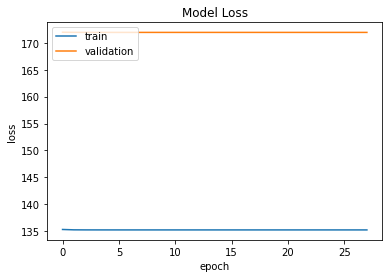

[I 2022-05-26 01:25:57,077] Trial 23 finished with value: 158.44546757601 and parameters: {'filters1': 800, 'kernel_size': 18, 'activation1': 'relu', 'filters2': 260, 'activation2': 'relu', 'filters3': 450, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.00018819689269281747, 'batch_size': 1}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
436/436 - 21s - loss: 135.8389 - mse: 19174.8320 - val_loss: 172.8159 - val_mse: 30880.2363 - lr: 2.4201e-04 - 21s/epoch - 49ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
436/436 - 6s - loss: 135.8169 - mse: 19168.8945 - val_loss: 172.8043 - val_mse: 30876.2207 - lr: 2.4201e-04 - 6s/epoch - 14ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
436/436 - 7s - loss: 135.8085 - mse: 19166.6523 - val_loss: 172.7983 - val_mse: 30874.1504 - lr: 2.4201e-04 - 7s/epoch - 16ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
436/436 - 7s - loss: 135.8039 - mse: 19165.4219 - val_loss: 172.7949 - val_mse: 30872.9746 - lr: 2.4201e-04 - 7s/epoch - 17ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
436/436 - 7s - loss: 135.8012 - mse: 19164.6836 - val_loss: 172.7927 - val_mse: 30872.2227 - lr: 2.4201e-04 - 7s/epoch - 16ms/step
Epoch 6/500



Epoch 42/500

Epoch 00042: val_loss did not improve from 171.94044
436/436 - 7s - loss: 135.7946 - mse: 19162.8984 - val_loss: 172.7871 - val_mse: 30870.2852 - lr: 1.1859e-04 - 7s/epoch - 17ms/step
Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
436/436 - 7s - loss: 135.7946 - mse: 19162.8984 - val_loss: 172.7871 - val_mse: 30870.2852 - lr: 1.1859e-04 - 7s/epoch - 15ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
436/436 - 6s - loss: 135.7946 - mse: 19162.8984 - val_loss: 172.7871 - val_mse: 30870.2852 - lr: 1.1859e-04 - 6s/epoch - 14ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
436/436 - 6s - loss: 135.7946 - mse: 19162.8984 - val_loss: 172.7871 - val_mse: 30870.2852 - lr: 1.1859e-04 - 6s/epoch - 15ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 171.94044
436/436 - 7s - loss: 135.7946 - mse: 19162.8984 - val_loss: 172.7871 - val_mse: 30870.2852 - lr: 1.1859e-04 - 7s/epoch - 17ms/step
Epoch 47/5

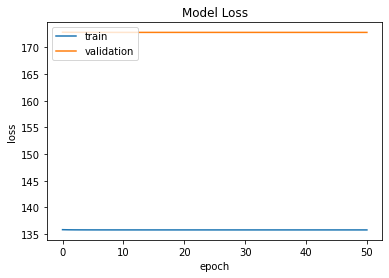

[I 2022-05-26 01:32:03,723] Trial 24 finished with value: 158.44546837378192 and parameters: {'filters1': 830, 'kernel_size': 8, 'activation1': 'relu', 'filters2': 400, 'activation2': 'tanh', 'filters3': 400, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.00024201144070469874, 'batch_size': 6}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
524/524 - 18s - loss: 135.7809 - mse: 19175.2969 - val_loss: 172.7052 - val_mse: 30875.6797 - lr: 0.0011 - 18s/epoch - 35ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
524/524 - 4s - loss: 135.7440 - mse: 19165.4902 - val_loss: 172.6957 - val_mse: 30872.3613 - lr: 0.0011 - 4s/epoch - 8ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
524/524 - 4s - loss: 135.7386 - mse: 19164.0742 - val_loss: 172.6928 - val_mse: 30871.3770 - lr: 0.0011 - 4s/epoch - 8ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
524/524 - 4s - loss: 135.7367 - mse: 19163.5586 - val_loss: 172.6915 - val_mse: 30870.9395 - lr: 0.0011 - 4s/epoch - 8ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
524/524 - 4s - loss: 135.7358 - mse: 19163.3125 - val_loss: 172.6909 - val_mse: 30870.7070 - lr: 0.0011 - 4s/epoch - 7ms/step
Epoch 6/500

Epoch 00006: val_loss di

Epoch 42/500

Epoch 00042: val_loss did not improve from 171.94044
524/524 - 4s - loss: 135.7342 - mse: 19162.9043 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 3.7817e-04 - 4s/epoch - 8ms/step
Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
524/524 - 4s - loss: 135.7342 - mse: 19162.9043 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 3.7817e-04 - 4s/epoch - 8ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
524/524 - 5s - loss: 135.7342 - mse: 19162.9043 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 3.7817e-04 - 5s/epoch - 9ms/step


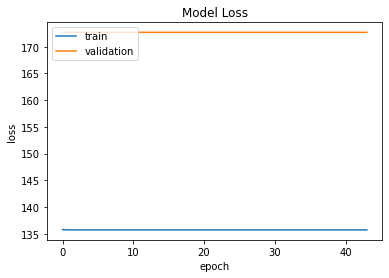

[I 2022-05-26 01:35:18,469] Trial 25 finished with value: 158.44546757601 and parameters: {'filters1': 10, 'kernel_size': 16, 'activation1': 'relu', 'filters2': 170, 'activation2': 'tanh', 'filters3': 480, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.0011025366960359835, 'batch_size': 5}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
524/524 - 28s - loss: 135.7727 - mse: 19172.6250 - val_loss: 172.6898 - val_mse: 30870.3672 - lr: 0.0029 - 28s/epoch - 53ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
524/524 - 12s - loss: 135.7343 - mse: 19162.9238 - val_loss: 172.6897 - val_mse: 30870.3027 - lr: 0.0029 - 12s/epoch - 22ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
524/524 - 10s - loss: 135.7342 - mse: 19162.9121 - val_loss: 172.6897 - val_mse: 30870.2969 - lr: 0.0029 - 10s/epoch - 20ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
524/524 - 8s - loss: 135.7342 - mse: 19162.9102 - val_loss: 172.6897 - val_mse: 30870.2969 - lr: 0.0029 - 8s/epoch - 16ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
524/524 - 10s - loss: 135.7342 - mse: 19162.9102 - val_loss: 172.6897 - val_mse: 30870.2969 - lr: 0.0029 - 10s/epoch - 19ms/step
Epoch 6/500

Epoch 00006: v

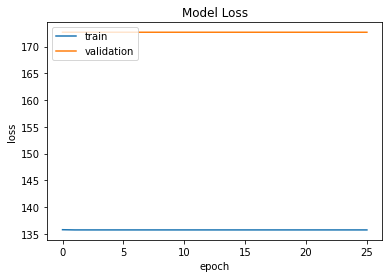

[I 2022-05-26 01:40:24,901] Trial 26 finished with value: 158.44546953472474 and parameters: {'filters1': 990, 'kernel_size': 20, 'activation1': 'tanh', 'filters2': 140, 'activation2': 'relu', 'filters3': 500, 'activation3': 'relu', 'optimizer_name': 'RMSprop', 'learning_rate': 0.002912879271589848, 'momentum': 0.10144075024068458, 'batch_size': 5}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
2616/2616 - 39s - loss: 135.3542 - mse: 19194.2422 - val_loss: 172.0244 - val_mse: 30899.1621 - lr: 3.3112e-05 - 39s/epoch - 15ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
2616/2616 - 21s - loss: 135.3059 - mse: 19181.3027 - val_loss: 171.9958 - val_mse: 30889.3184 - lr: 3.3112e-05 - 21s/epoch - 8ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
2616/2616 - 21s - loss: 135.2826 - mse: 19175.0176 - val_loss: 171.9769 - val_mse: 30882.8125 - lr: 3.3112e-05 - 21s/epoch - 8ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
2616/2616 - 25s - loss: 135.2670 - mse: 19170.8555 - val_loss: 171.9644 - val_mse: 30878.5078 - lr: 3.3112e-05 - 25s/epoch - 10ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
2616/2616 - 22s - loss: 135.2568 - mse: 19168.1523 - val_loss: 171.9561 - val_mse: 30875.6914 - lr: 3.3112e-05 - 22s/epoch - 9ms/ste

Epoch 41/500

Epoch 00041: val_loss did not improve from 171.94044
2616/2616 - 28s - loss: 135.2374 - mse: 19162.8965 - val_loss: 171.9404 - val_mse: 30870.2695 - lr: 1.1358e-05 - 28s/epoch - 11ms/step


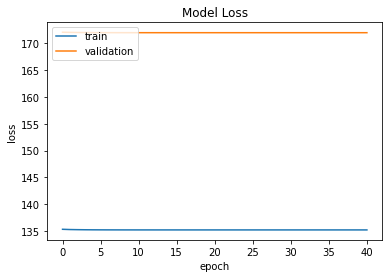

[I 2022-05-26 01:56:58,145] Trial 27 finished with value: 158.44546757601 and parameters: {'filters1': 310, 'kernel_size': 14, 'activation1': 'relu', 'filters2': 360, 'activation2': 'tanh', 'filters3': 270, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 3.3112369775909265e-05, 'batch_size': 1}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
131/131 - 16s - loss: 136.5164 - mse: 19241.5527 - val_loss: 173.6339 - val_mse: 30914.2578 - lr: 1.0101e-04 - 16s/epoch - 120ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
131/131 - 2s - loss: 136.3354 - mse: 19195.2617 - val_loss: 173.6172 - val_mse: 30908.5879 - lr: 1.0101e-04 - 2s/epoch - 14ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
131/131 - 1s - loss: 136.3231 - mse: 19192.0293 - val_loss: 173.6091 - val_mse: 30905.8125 - lr: 1.0101e-04 - 1s/epoch - 9ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
131/131 - 2s - loss: 136.3155 - mse: 19189.9902 - val_loss: 173.6026 - val_mse: 30903.5449 - lr: 1.0101e-04 - 2s/epoch - 15ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
131/131 - 2s - loss: 136.3091 - mse: 19188.2734 - val_loss: 173.5967 - val_mse: 30901.5039 - lr: 1.0101e-04 - 2s/epoch - 16ms/step
Epoch 6/500



Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
131/131 - 1s - loss: 136.2291 - mse: 19166.4863 - val_loss: 173.5196 - val_mse: 30874.7461 - lr: 1.0101e-04 - 1s/epoch - 9ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
131/131 - 1s - loss: 136.2285 - mse: 19166.3223 - val_loss: 173.5190 - val_mse: 30874.5449 - lr: 1.0101e-04 - 1s/epoch - 8ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
131/131 - 1s - loss: 136.2279 - mse: 19166.1680 - val_loss: 173.5185 - val_mse: 30874.3555 - lr: 1.0101e-04 - 731ms/epoch - 6ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 171.94044
131/131 - 1s - loss: 136.2274 - mse: 19166.0254 - val_loss: 173.5180 - val_mse: 30874.1719 - lr: 1.0101e-04 - 1s/epoch - 8ms/step
Epoch 47/500

Epoch 00047: val_loss did not improve from 171.94044
131/131 - 1s - loss: 136.2268 - mse: 19165.8770 - val_loss: 173.5175 - val_mse: 30873.9941 - lr: 1.0101e-04 - 1s/epoch - 8ms/step
Epoch 48/500

Epoch 85/500

Epoch 00085: val_loss did not improve from 171.94044
131/131 - 2s - loss: 136.2178 - mse: 19163.4336 - val_loss: 173.5087 - val_mse: 30870.9551 - lr: 1.0101e-04 - 2s/epoch - 12ms/step
Epoch 86/500

Epoch 00086: val_loss did not improve from 171.94044
131/131 - 1s - loss: 136.2177 - mse: 19163.4102 - val_loss: 173.5086 - val_mse: 30870.9180 - lr: 1.0101e-04 - 1s/epoch - 11ms/step
Epoch 87/500

Epoch 00087: val_loss did not improve from 171.94044
131/131 - 1s - loss: 136.2177 - mse: 19163.3789 - val_loss: 173.5085 - val_mse: 30870.8926 - lr: 1.0101e-04 - 1s/epoch - 11ms/step
Epoch 88/500

Epoch 00088: val_loss did not improve from 171.94044
131/131 - 2s - loss: 136.2176 - mse: 19163.3633 - val_loss: 173.5084 - val_mse: 30870.8711 - lr: 1.0101e-04 - 2s/epoch - 13ms/step
Epoch 89/500

Epoch 00089: val_loss did not improve from 171.94044
131/131 - 2s - loss: 136.2175 - mse: 19163.3457 - val_loss: 173.5084 - val_mse: 30870.8340 - lr: 1.0101e-04 - 2s/epoch - 13ms/step
Epoch 90/5

Epoch 127/500

Epoch 00127: val_loss did not improve from 171.94044
131/131 - 2s - loss: 136.2161 - mse: 19162.9746 - val_loss: 173.5071 - val_mse: 30870.3848 - lr: 1.0101e-04 - 2s/epoch - 13ms/step
Epoch 128/500

Epoch 00128: val_loss did not improve from 171.94044
131/131 - 1s - loss: 136.2161 - mse: 19162.9727 - val_loss: 173.5071 - val_mse: 30870.3848 - lr: 1.0101e-04 - 1s/epoch - 11ms/step
Epoch 129/500

Epoch 00129: val_loss did not improve from 171.94044

Epoch 00129: ReduceLROnPlateau reducing learning rate to 7.070601350278594e-05.
131/131 - 2s - loss: 136.2161 - mse: 19162.9688 - val_loss: 173.5071 - val_mse: 30870.3828 - lr: 1.0101e-04 - 2s/epoch - 12ms/step
Epoch 130/500

Epoch 00130: val_loss did not improve from 171.94044
131/131 - 2s - loss: 136.2161 - mse: 19162.9668 - val_loss: 173.5070 - val_mse: 30870.3770 - lr: 7.0706e-05 - 2s/epoch - 12ms/step
Epoch 131/500

Epoch 00131: val_loss did not improve from 171.94044
131/131 - 2s - loss: 136.2161 - mse: 19162.9648 - val_l

Epoch 167/500

Epoch 00167: val_loss did not improve from 171.94044
131/131 - 2s - loss: 136.2160 - mse: 19162.9258 - val_loss: 173.5069 - val_mse: 30870.3203 - lr: 2.4252e-05 - 2s/epoch - 11ms/step
Epoch 168/500

Epoch 00168: val_loss did not improve from 171.94044
131/131 - 2s - loss: 136.2160 - mse: 19162.9258 - val_loss: 173.5069 - val_mse: 30870.3184 - lr: 2.4252e-05 - 2s/epoch - 12ms/step
Epoch 169/500

Epoch 00169: val_loss did not improve from 171.94044
131/131 - 1s - loss: 136.2160 - mse: 19162.9219 - val_loss: 173.5069 - val_mse: 30870.3145 - lr: 2.4252e-05 - 1s/epoch - 10ms/step
Epoch 170/500

Epoch 00170: val_loss did not improve from 171.94044
131/131 - 1s - loss: 136.2160 - mse: 19162.9219 - val_loss: 173.5069 - val_mse: 30870.3145 - lr: 2.4252e-05 - 1s/epoch - 11ms/step
Epoch 171/500

Epoch 00171: val_loss did not improve from 171.94044

Epoch 00171: ReduceLROnPlateau reducing learning rate to 1.6976513325062112e-05.
131/131 - 2s - loss: 136.2160 - mse: 19162.9219 - val_

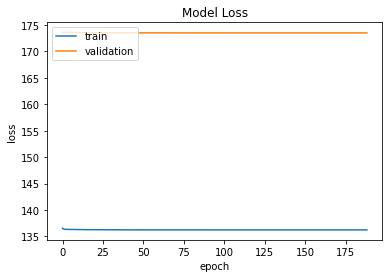

[I 2022-05-26 02:02:03,820] Trial 28 finished with value: 158.4455458837498 and parameters: {'filters1': 120, 'kernel_size': 16, 'activation1': 'relu', 'filters2': 220, 'activation2': 'tanh', 'filters3': 150, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.00010100858881895217, 'batch_size': 20}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
872/872 - 23s - loss: 135.6588 - mse: 19186.5234 - val_loss: 172.4063 - val_mse: 30882.0156 - lr: 2.3914e-05 - 23s/epoch - 27ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
872/872 - 8s - loss: 135.5865 - mse: 19167.5059 - val_loss: 172.3799 - val_mse: 30872.9473 - lr: 2.3914e-05 - 8s/epoch - 10ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
872/872 - 7s - loss: 135.5732 - mse: 19164.0039 - val_loss: 172.3742 - val_mse: 30870.9453 - lr: 2.3914e-05 - 7s/epoch - 8ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
872/872 - 7s - loss: 135.5701 - mse: 19163.1660 - val_loss: 172.3728 - val_mse: 30870.4746 - lr: 2.3914e-05 - 7s/epoch - 8ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
872/872 - 9s - loss: 135.5694 - mse: 19162.9766 - val_loss: 172.3725 - val_mse: 30870.3555 - lr: 2.3914e-05 - 9s/epoch - 10ms/step
Epoch 6/500

Ep

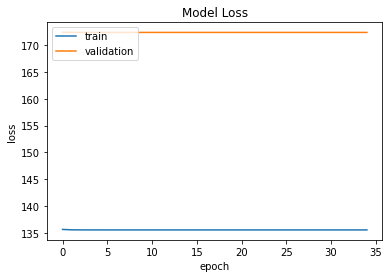

[I 2022-05-26 02:07:31,352] Trial 29 finished with value: 158.44547807182974 and parameters: {'filters1': 280, 'kernel_size': 12, 'activation1': 'tanh', 'filters2': 500, 'activation2': 'relu', 'filters3': 10, 'activation3': 'tanh', 'optimizer_name': 'RMSprop', 'learning_rate': 2.3913689926379488e-05, 'momentum': 0.8548339419822049, 'batch_size': 3}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
2616/2616 - 35s - loss: 135.2535 - mse: 19167.0957 - val_loss: 171.9424 - val_mse: 30870.9609 - lr: 6.9918e-04 - 35s/epoch - 13ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
2616/2616 - 15s - loss: 135.2382 - mse: 19163.1582 - val_loss: 171.9407 - val_mse: 30870.4102 - lr: 6.9918e-04 - 15s/epoch - 6ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
2616/2616 - 19s - loss: 135.2375 - mse: 19162.9551 - val_loss: 171.9405 - val_mse: 30870.3027 - lr: 6.9918e-04 - 19s/epoch - 7ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
2616/2616 - 20s - loss: 135.2374 - mse: 19162.9121 - val_loss: 171.9405 - val_mse: 30870.2773 - lr: 6.9918e-04 - 20s/epoch - 8ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
2616/2616 - 21s - loss: 135.2374 - mse: 19162.9043 - val_loss: 171.9404 - val_mse: 30870.2695 - lr: 6.9918e-04 - 21s/epoch - 8ms/step

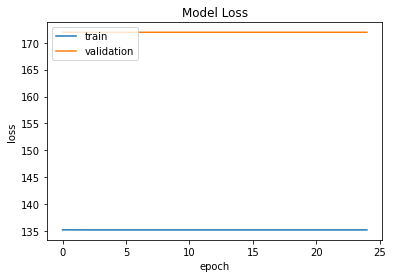

[I 2022-05-26 02:15:38,276] Trial 30 finished with value: 158.44546757601 and parameters: {'filters1': 200, 'kernel_size': 10, 'activation1': 'relu', 'filters2': 710, 'activation2': 'tanh', 'filters3': 80, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.0006991779648123028, 'batch_size': 1}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
654/654 - 26s - loss: 135.7034 - mse: 19175.2109 - val_loss: 172.5961 - val_mse: 30872.9668 - lr: 0.0040 - 26s/epoch - 40ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
654/654 - 8s - loss: 135.6599 - mse: 19164.0645 - val_loss: 172.5908 - val_mse: 30871.1465 - lr: 0.0040 - 8s/epoch - 13ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
654/654 - 6s - loss: 135.6574 - mse: 19163.3633 - val_loss: 172.5895 - val_mse: 30870.7129 - lr: 0.0040 - 6s/epoch - 9ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
654/654 - 7s - loss: 135.6565 - mse: 19163.1445 - val_loss: 172.5890 - val_mse: 30870.5195 - lr: 0.0040 - 7s/epoch - 11ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
654/654 - 8s - loss: 135.6562 - mse: 19163.0391 - val_loss: 172.5887 - val_mse: 30870.4395 - lr: 0.0040 - 8s/epoch - 12ms/step
Epoch 6/500

Epoch 00006: val_loss

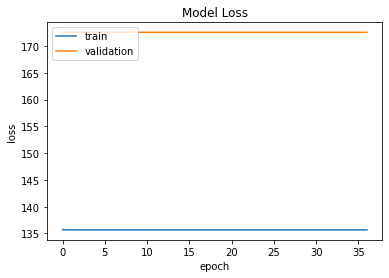

[I 2022-05-26 02:21:35,598] Trial 31 finished with value: 158.44546757601 and parameters: {'filters1': 450, 'kernel_size': 16, 'activation1': 'relu', 'filters2': 360, 'activation2': 'relu', 'filters3': 610, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.003993973019405799, 'batch_size': 4}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
654/654 - 24s - loss: 135.7057 - mse: 19175.9004 - val_loss: 172.5995 - val_mse: 30874.1465 - lr: 0.0017 - 24s/epoch - 37ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
654/654 - 7s - loss: 135.6619 - mse: 19164.6250 - val_loss: 172.5921 - val_mse: 30871.5801 - lr: 0.0017 - 7s/epoch - 11ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
654/654 - 7s - loss: 135.6582 - mse: 19163.6152 - val_loss: 172.5901 - val_mse: 30870.9258 - lr: 0.0017 - 7s/epoch - 11ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
654/654 - 6s - loss: 135.6570 - mse: 19163.2676 - val_loss: 172.5893 - val_mse: 30870.6484 - lr: 0.0017 - 6s/epoch - 9ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
654/654 - 7s - loss: 135.6564 - mse: 19163.1211 - val_loss: 172.5890 - val_mse: 30870.5078 - lr: 0.0017 - 7s/epoch - 11ms/step
Epoch 6/500

Epoch 00006: val_loss

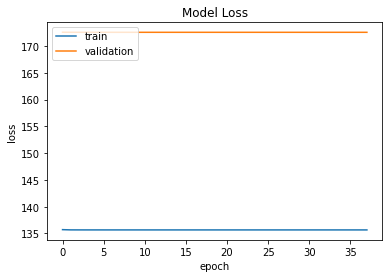

[I 2022-05-26 02:25:48,753] Trial 32 finished with value: 158.44546757601 and parameters: {'filters1': 320, 'kernel_size': 12, 'activation1': 'relu', 'filters2': 220, 'activation2': 'relu', 'filters3': 290, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.0016994173613584088, 'batch_size': 4}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
872/872 - 26s - loss: 135.5792 - mse: 19165.5488 - val_loss: 172.3733 - val_mse: 30870.6484 - lr: 0.0037 - 26s/epoch - 30ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
872/872 - 11s - loss: 135.5696 - mse: 19163.0430 - val_loss: 172.3726 - val_mse: 30870.4062 - lr: 0.0037 - 11s/epoch - 13ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
872/872 - 10s - loss: 135.5692 - mse: 19162.9473 - val_loss: 172.3724 - val_mse: 30870.3418 - lr: 0.0037 - 10s/epoch - 11ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
872/872 - 12s - loss: 135.5691 - mse: 19162.9160 - val_loss: 172.3723 - val_mse: 30870.3184 - lr: 0.0037 - 12s/epoch - 14ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
872/872 - 11s - loss: 135.5691 - mse: 19162.9004 - val_loss: 172.3723 - val_mse: 30870.3125 - lr: 0.0037 - 11s/epoch - 13ms/step
Epoch 6/500

Epoch 00006:

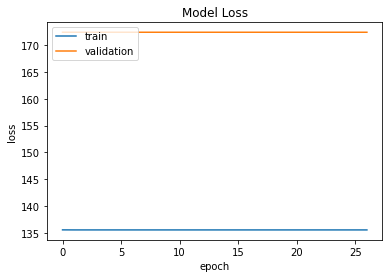

[I 2022-05-26 02:31:02,996] Trial 33 finished with value: 158.44546757601 and parameters: {'filters1': 490, 'kernel_size': 8, 'activation1': 'relu', 'filters2': 460, 'activation2': 'relu', 'filters3': 200, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.0036593014883310178, 'batch_size': 3}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
872/872 - 28s - loss: 135.6896 - mse: 19195.1992 - val_loss: 172.4440 - val_mse: 30894.9961 - lr: 2.2948e-04 - 28s/epoch - 32ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
872/872 - 14s - loss: 135.6201 - mse: 19176.5879 - val_loss: 172.4083 - val_mse: 30882.7285 - lr: 2.2948e-04 - 14s/epoch - 16ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
872/872 - 14s - loss: 135.5964 - mse: 19170.2363 - val_loss: 172.3927 - val_mse: 30877.3398 - lr: 2.2948e-04 - 14s/epoch - 16ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
872/872 - 14s - loss: 135.5851 - mse: 19167.1953 - val_loss: 172.3847 - val_mse: 30874.5742 - lr: 2.2948e-04 - 14s/epoch - 17ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
872/872 - 14s - loss: 135.5789 - mse: 19165.5684 - val_loss: 172.3801 - val_mse: 30873.0000 - lr: 2.2948e-04 - 14s/epoch - 16ms/step
Epoch

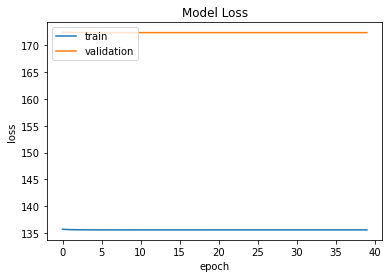

[I 2022-05-26 02:40:18,134] Trial 34 finished with value: 158.44546757601 and parameters: {'filters1': 660, 'kernel_size': 6, 'activation1': 'relu', 'filters2': 480, 'activation2': 'relu', 'filters3': 400, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.00022947556146140196, 'batch_size': 3}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
374/374 - 22s - loss: 135.9041 - mse: 19173.0000 - val_loss: 172.8057 - val_mse: 30870.4258 - lr: 0.0015 - 22s/epoch - 59ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
374/374 - 5s - loss: 135.8644 - mse: 19162.9199 - val_loss: 172.8053 - val_mse: 30870.3066 - lr: 0.0015 - 5s/epoch - 13ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
374/374 - 5s - loss: 135.8644 - mse: 19162.9043 - val_loss: 172.8053 - val_mse: 30870.2930 - lr: 0.0015 - 5s/epoch - 14ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
374/374 - 5s - loss: 135.8643 - mse: 19162.9004 - val_loss: 172.8053 - val_mse: 30870.2930 - lr: 0.0015 - 5s/epoch - 13ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
374/374 - 4s - loss: 135.8643 - mse: 19162.9004 - val_loss: 172.8053 - val_mse: 30870.2930 - lr: 0.0015 - 4s/epoch - 10ms/step
Epoch 6/500

Epoch 00006: val_los

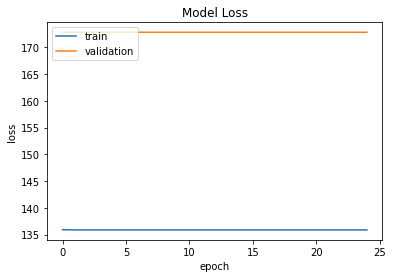

[I 2022-05-26 02:42:40,927] Trial 35 finished with value: 158.44546970071968 and parameters: {'filters1': 200, 'kernel_size': 10, 'activation1': 'tanh', 'filters2': 720, 'activation2': 'relu', 'filters3': 120, 'activation3': 'tanh', 'optimizer_name': 'RMSprop', 'learning_rate': 0.0014606887553313378, 'momentum': 0.5231040013327767, 'batch_size': 7}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
1308/1308 - 38s - loss: 135.4431 - mse: 19168.2285 - val_loss: 172.1895 - val_mse: 30873.9668 - lr: 1.5874e-04 - 38s/epoch - 29ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
1308/1308 - 22s - loss: 135.4307 - mse: 19164.8633 - val_loss: 172.1840 - val_mse: 30871.9902 - lr: 1.5874e-04 - 22s/epoch - 17ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
1308/1308 - 23s - loss: 135.4269 - mse: 19163.8477 - val_loss: 172.1813 - val_mse: 30871.1660 - lr: 1.5874e-04 - 23s/epoch - 17ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
1308/1308 - 23s - loss: 135.4253 - mse: 19163.4121 - val_loss: 172.1804 - val_mse: 30870.7715 - lr: 1.5874e-04 - 23s/epoch - 18ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
1308/1308 - 17s - loss: 135.4243 - mse: 19163.1855 - val_loss: 172.1798 - val_mse: 30870.5625 - lr: 1.5874e-04 - 17s/epoch - 13ms/

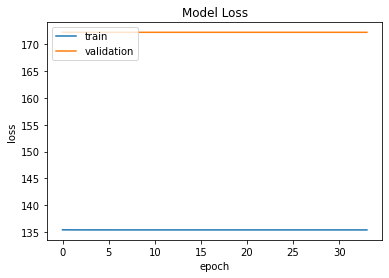

[I 2022-05-26 02:54:35,945] Trial 36 finished with value: 158.44546757601 and parameters: {'filters1': 670, 'kernel_size': 4, 'activation1': 'relu', 'filters2': 580, 'activation2': 'relu', 'filters3': 420, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.00015873957447054419, 'batch_size': 2}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
2616/2616 - 72s - loss: 135.2964 - mse: 19178.7129 - val_loss: 171.9758 - val_mse: 30882.4766 - lr: 6.2293e-05 - 72s/epoch - 28ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
2616/2616 - 52s - loss: 135.2628 - mse: 19169.6797 - val_loss: 171.9579 - val_mse: 30876.3184 - lr: 6.2293e-05 - 52s/epoch - 20ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
2616/2616 - 55s - loss: 135.2501 - mse: 19166.2695 - val_loss: 171.9493 - val_mse: 30873.3418 - lr: 6.2293e-05 - 55s/epoch - 21ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
2616/2616 - 53s - loss: 135.2437 - mse: 19164.6094 - val_loss: 171.9449 - val_mse: 30871.8262 - lr: 6.2293e-05 - 53s/epoch - 20ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
2616/2616 - 53s - loss: 135.2405 - mse: 19163.7852 - val_loss: 171.9426 - val_mse: 30871.0703 - lr: 6.2293e-05 - 53s/epoch - 20ms/

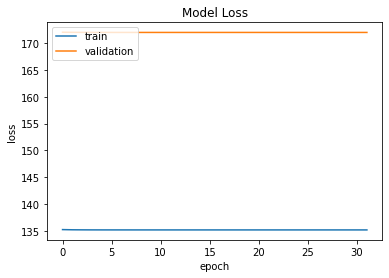

[I 2022-05-26 03:23:03,137] Trial 37 finished with value: 158.44546757601 and parameters: {'filters1': 760, 'kernel_size': 14, 'activation1': 'relu', 'filters2': 570, 'activation2': 'relu', 'filters3': 550, 'activation3': 'relu', 'optimizer_name': 'Adam', 'learning_rate': 6.229313720979276e-05, 'batch_size': 1}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
1308/1308 - 48s - loss: 135.7347 - mse: 19245.5176 - val_loss: 172.3516 - val_mse: 30929.1992 - lr: 3.5497e-06 - 48s/epoch - 36ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
1308/1308 - 25s - loss: 135.5643 - mse: 19200.5586 - val_loss: 172.2990 - val_mse: 30911.6094 - lr: 3.5497e-06 - 25s/epoch - 19ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
1308/1308 - 28s - loss: 135.5417 - mse: 19194.8828 - val_loss: 172.2939 - val_mse: 30909.8926 - lr: 3.5497e-06 - 28s/epoch - 22ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
1308/1308 - 28s - loss: 135.5372 - mse: 19193.7109 - val_loss: 172.2906 - val_mse: 30908.8125 - lr: 3.5497e-06 - 28s/epoch - 22ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
1308/1308 - 24s - loss: 135.5340 - mse: 19192.8691 - val_loss: 172.2879 - val_mse: 30907.8379 - lr: 3.5497e-06 - 24s/epoch - 18ms/

Epoch 42/500

Epoch 00042: val_loss did not improve from 171.94044
1308/1308 - 27s - loss: 135.4591 - mse: 19172.6074 - val_loss: 172.2142 - val_mse: 30882.4336 - lr: 3.5497e-06 - 27s/epoch - 21ms/step
Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
1308/1308 - 26s - loss: 135.4580 - mse: 19172.3184 - val_loss: 172.2130 - val_mse: 30882.0312 - lr: 3.5497e-06 - 26s/epoch - 20ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
1308/1308 - 29s - loss: 135.4570 - mse: 19171.9824 - val_loss: 172.2119 - val_mse: 30881.6719 - lr: 3.5497e-06 - 29s/epoch - 22ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
1308/1308 - 27s - loss: 135.4558 - mse: 19171.6934 - val_loss: 172.2110 - val_mse: 30881.2871 - lr: 3.5497e-06 - 27s/epoch - 21ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 171.94044
1308/1308 - 28s - loss: 135.4548 - mse: 19171.4121 - val_loss: 172.2099 - val_mse: 30880.9609 - lr: 3.5497e-06 - 28s/epoch - 

Epoch 83/500

Epoch 00083: val_loss did not improve from 171.94044
1308/1308 - 27s - loss: 135.4326 - mse: 19165.4160 - val_loss: 172.1881 - val_mse: 30873.4375 - lr: 3.5497e-06 - 27s/epoch - 21ms/step
Epoch 84/500

Epoch 00084: val_loss did not improve from 171.94044
1308/1308 - 26s - loss: 135.4323 - mse: 19165.3418 - val_loss: 172.1879 - val_mse: 30873.3477 - lr: 3.5497e-06 - 26s/epoch - 20ms/step
Epoch 85/500

Epoch 00085: val_loss did not improve from 171.94044
1308/1308 - 26s - loss: 135.4320 - mse: 19165.2598 - val_loss: 172.1875 - val_mse: 30873.2480 - lr: 3.5497e-06 - 26s/epoch - 20ms/step
Epoch 86/500

Epoch 00086: val_loss did not improve from 171.94044
1308/1308 - 26s - loss: 135.4316 - mse: 19165.1719 - val_loss: 172.1872 - val_mse: 30873.1562 - lr: 3.5497e-06 - 26s/epoch - 20ms/step
Epoch 87/500

Epoch 00087: val_loss did not improve from 171.94044
1308/1308 - 26s - loss: 135.4314 - mse: 19165.0957 - val_loss: 172.1869 - val_mse: 30873.0488 - lr: 3.5497e-06 - 26s/epoch - 

Epoch 124/500

Epoch 00124: val_loss did not improve from 171.94044
1308/1308 - 28s - loss: 135.4258 - mse: 19163.5312 - val_loss: 172.1811 - val_mse: 30871.0879 - lr: 3.5497e-06 - 28s/epoch - 22ms/step
Epoch 125/500

Epoch 00125: val_loss did not improve from 171.94044
1308/1308 - 29s - loss: 135.4257 - mse: 19163.5156 - val_loss: 172.1811 - val_mse: 30871.0664 - lr: 3.5497e-06 - 29s/epoch - 22ms/step
Epoch 126/500

Epoch 00126: val_loss did not improve from 171.94044
1308/1308 - 30s - loss: 135.4256 - mse: 19163.4961 - val_loss: 172.1810 - val_mse: 30871.0332 - lr: 3.5497e-06 - 30s/epoch - 23ms/step
Epoch 127/500

Epoch 00127: val_loss did not improve from 171.94044
1308/1308 - 28s - loss: 135.4255 - mse: 19163.4824 - val_loss: 172.1809 - val_mse: 30871.0156 - lr: 3.5497e-06 - 28s/epoch - 22ms/step
Epoch 128/500

Epoch 00128: val_loss did not improve from 171.94044
1308/1308 - 29s - loss: 135.4255 - mse: 19163.4609 - val_loss: 172.1809 - val_mse: 30870.9844 - lr: 3.5497e-06 - 29s/epo

Epoch 165/500

Epoch 00165: val_loss did not improve from 171.94044
1308/1308 - 26s - loss: 135.4239 - mse: 19163.0723 - val_loss: 172.1796 - val_mse: 30870.5078 - lr: 3.5497e-06 - 26s/epoch - 20ms/step
Epoch 166/500

Epoch 00166: val_loss did not improve from 171.94044
1308/1308 - 30s - loss: 135.4239 - mse: 19163.0703 - val_loss: 172.1795 - val_mse: 30870.5039 - lr: 3.5497e-06 - 30s/epoch - 23ms/step
Epoch 167/500

Epoch 00167: val_loss did not improve from 171.94044
1308/1308 - 29s - loss: 135.4239 - mse: 19163.0625 - val_loss: 172.1795 - val_mse: 30870.4980 - lr: 3.5497e-06 - 29s/epoch - 22ms/step
Epoch 168/500

Epoch 00168: val_loss did not improve from 171.94044
1308/1308 - 31s - loss: 135.4238 - mse: 19163.0586 - val_loss: 172.1795 - val_mse: 30870.4922 - lr: 3.5497e-06 - 31s/epoch - 24ms/step
Epoch 169/500

Epoch 00169: val_loss did not improve from 171.94044
1308/1308 - 30s - loss: 135.4238 - mse: 19163.0527 - val_loss: 172.1795 - val_mse: 30870.4824 - lr: 3.5497e-06 - 30s/epo

Epoch 205/500

Epoch 00205: val_loss did not improve from 171.94044
1308/1308 - 34s - loss: 135.4236 - mse: 19162.9609 - val_loss: 172.1791 - val_mse: 30870.3789 - lr: 1.7394e-06 - 34s/epoch - 26ms/step
Epoch 206/500

Epoch 00206: val_loss did not improve from 171.94044
1308/1308 - 30s - loss: 135.4236 - mse: 19162.9609 - val_loss: 172.1791 - val_mse: 30870.3789 - lr: 1.7394e-06 - 30s/epoch - 23ms/step
Epoch 207/500

Epoch 00207: val_loss did not improve from 171.94044
1308/1308 - 30s - loss: 135.4236 - mse: 19162.9609 - val_loss: 172.1791 - val_mse: 30870.3789 - lr: 1.7394e-06 - 30s/epoch - 23ms/step
Epoch 208/500

Epoch 00208: val_loss did not improve from 171.94044
1308/1308 - 30s - loss: 135.4236 - mse: 19162.9609 - val_loss: 172.1791 - val_mse: 30870.3789 - lr: 1.7394e-06 - 30s/epoch - 23ms/step
Epoch 209/500

Epoch 00209: val_loss did not improve from 171.94044
1308/1308 - 31s - loss: 135.4236 - mse: 19162.9609 - val_loss: 172.1791 - val_mse: 30870.3789 - lr: 1.7394e-06 - 31s/epo

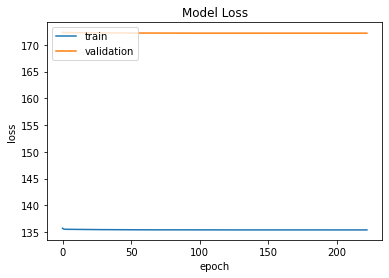

[I 2022-05-26 05:06:20,471] Trial 38 finished with value: 158.4456769383547 and parameters: {'filters1': 760, 'kernel_size': 12, 'activation1': 'tanh', 'filters2': 570, 'activation2': 'relu', 'filters3': 540, 'activation3': 'relu', 'optimizer_name': 'RMSprop', 'learning_rate': 3.5497139417874346e-06, 'momentum': 0.16836779035032054, 'batch_size': 2}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
524/524 - 21s - loss: 135.9543 - mse: 19221.1074 - val_loss: 172.8461 - val_mse: 30924.3516 - lr: 5.5981e-05 - 21s/epoch - 39ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
524/524 - 8s - loss: 135.8805 - mse: 19202.5098 - val_loss: 172.8259 - val_mse: 30917.3770 - lr: 5.5981e-05 - 8s/epoch - 15ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
524/524 - 9s - loss: 135.8618 - mse: 19197.4297 - val_loss: 172.8086 - val_mse: 30911.3789 - lr: 5.5981e-05 - 9s/epoch - 18ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
524/524 - 10s - loss: 135.8458 - mse: 19193.0996 - val_loss: 172.7938 - val_mse: 30906.2598 - lr: 5.5981e-05 - 10s/epoch - 18ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
524/524 - 10s - loss: 135.8318 - mse: 19189.3359 - val_loss: 172.7809 - val_mse: 30901.8066 - lr: 5.5981e-05 - 10s/epoch - 19ms/step
Epoch 6/5

Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
524/524 - 6s - loss: 135.7351 - mse: 19163.1113 - val_loss: 172.6904 - val_mse: 30870.5391 - lr: 5.5981e-05 - 6s/epoch - 12ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
524/524 - 6s - loss: 135.7350 - mse: 19163.0879 - val_loss: 172.6903 - val_mse: 30870.5098 - lr: 5.5981e-05 - 6s/epoch - 11ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
524/524 - 8s - loss: 135.7349 - mse: 19163.0664 - val_loss: 172.6902 - val_mse: 30870.4824 - lr: 5.5981e-05 - 8s/epoch - 15ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 171.94044
524/524 - 8s - loss: 135.7348 - mse: 19163.0430 - val_loss: 172.6902 - val_mse: 30870.4648 - lr: 5.5981e-05 - 8s/epoch - 14ms/step
Epoch 47/500

Epoch 00047: val_loss did not improve from 171.94044
524/524 - 9s - loss: 135.7347 - mse: 19163.0312 - val_loss: 172.6900 - val_mse: 30870.4434 - lr: 5.5981e-05 - 9s/epoch - 16ms/step
Epoch 48/5

Epoch 84/500

Epoch 00084: val_loss did not improve from 171.94044
524/524 - 7s - loss: 135.7342 - mse: 19162.9102 - val_loss: 172.6897 - val_mse: 30870.2969 - lr: 2.7431e-05 - 7s/epoch - 14ms/step
Epoch 85/500

Epoch 00085: val_loss did not improve from 171.94044

Epoch 00085: ReduceLROnPlateau reducing learning rate to 1.920140621223254e-05.
524/524 - 7s - loss: 135.7342 - mse: 19162.9082 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 2.7431e-05 - 7s/epoch - 13ms/step
Epoch 86/500

Epoch 00086: val_loss did not improve from 171.94044
524/524 - 8s - loss: 135.7342 - mse: 19162.9043 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 1.9201e-05 - 8s/epoch - 15ms/step
Epoch 87/500

Epoch 00087: val_loss did not improve from 171.94044
524/524 - 8s - loss: 135.7342 - mse: 19162.9043 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 1.9201e-05 - 8s/epoch - 15ms/step
Epoch 88/500

Epoch 00088: val_loss did not improve from 171.94044
524/524 - 9s - loss: 135.7342 - mse: 19162.9043 - val_loss: 

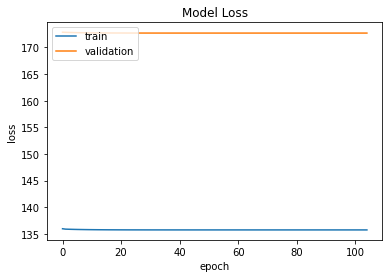

[I 2022-05-26 05:21:55,458] Trial 39 finished with value: 158.4454706111639 and parameters: {'filters1': 590, 'kernel_size': 20, 'activation1': 'relu', 'filters2': 290, 'activation2': 'relu', 'filters3': 670, 'activation3': 'relu', 'optimizer_name': 'Adam', 'learning_rate': 5.598077907313509e-05, 'batch_size': 5}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
2616/2616 - 35s - loss: 135.4124 - mse: 19209.5703 - val_loss: 172.0679 - val_mse: 30914.1680 - lr: 2.0127e-05 - 35s/epoch - 13ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
2616/2616 - 21s - loss: 135.3450 - mse: 19191.8262 - val_loss: 172.0305 - val_mse: 30901.2773 - lr: 2.0127e-05 - 21s/epoch - 8ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
2616/2616 - 21s - loss: 135.3136 - mse: 19183.3594 - val_loss: 172.0042 - val_mse: 30892.2168 - lr: 2.0127e-05 - 21s/epoch - 8ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
2616/2616 - 20s - loss: 135.2912 - mse: 19177.3770 - val_loss: 171.9854 - val_mse: 30885.7793 - lr: 2.0127e-05 - 20s/epoch - 8ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
2616/2616 - 20s - loss: 135.2753 - mse: 19173.1172 - val_loss: 171.9721 - val_mse: 30881.1875 - lr: 2.0127e-05 - 20s/epoch - 8ms/step

Epoch 41/500

Epoch 00041: val_loss did not improve from 171.94044
2616/2616 - 19s - loss: 135.2374 - mse: 19162.8965 - val_loss: 171.9404 - val_mse: 30870.2695 - lr: 9.8622e-06 - 19s/epoch - 7ms/step
Epoch 42/500

Epoch 00042: val_loss did not improve from 171.94044
2616/2616 - 19s - loss: 135.2374 - mse: 19162.8965 - val_loss: 171.9404 - val_mse: 30870.2695 - lr: 9.8622e-06 - 19s/epoch - 7ms/step
Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
2616/2616 - 20s - loss: 135.2374 - mse: 19162.8965 - val_loss: 171.9404 - val_mse: 30870.2695 - lr: 9.8622e-06 - 20s/epoch - 8ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
2616/2616 - 20s - loss: 135.2374 - mse: 19162.8965 - val_loss: 171.9404 - val_mse: 30870.2695 - lr: 9.8622e-06 - 20s/epoch - 8ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044

Epoch 00045: ReduceLROnPlateau reducing learning rate to 6.903572739247465e-06.
2616/2616 - 20s - loss: 135.2374 - mse: 19162.89

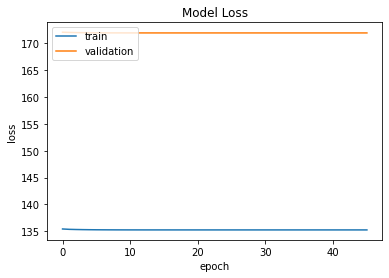

[I 2022-05-26 05:35:31,981] Trial 40 finished with value: 158.4454677659903 and parameters: {'filters1': 320, 'kernel_size': 10, 'activation1': 'relu', 'filters2': 350, 'activation2': 'tanh', 'filters3': 80, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 2.0127033785073652e-05, 'batch_size': 1}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
654/654 - 21s - loss: 135.6987 - mse: 19174.0215 - val_loss: 172.5945 - val_mse: 30872.4258 - lr: 0.0048 - 21s/epoch - 32ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
654/654 - 7s - loss: 135.6587 - mse: 19163.7070 - val_loss: 172.5894 - val_mse: 30870.6582 - lr: 0.0048 - 7s/epoch - 10ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
654/654 - 7s - loss: 135.6563 - mse: 19163.0762 - val_loss: 172.5887 - val_mse: 30870.4316 - lr: 0.0048 - 7s/epoch - 11ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
654/654 - 7s - loss: 135.6559 - mse: 19162.9824 - val_loss: 172.5885 - val_mse: 30870.3633 - lr: 0.0048 - 7s/epoch - 11ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
654/654 - 7s - loss: 135.6558 - mse: 19162.9434 - val_loss: 172.5885 - val_mse: 30870.3359 - lr: 0.0048 - 7s/epoch - 11ms/step
Epoch 6/500

Epoch 00006: val_los

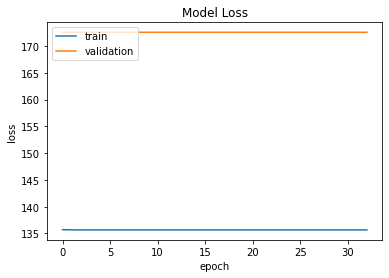

[I 2022-05-26 05:39:15,343] Trial 41 finished with value: 158.44546757601 and parameters: {'filters1': 390, 'kernel_size': 12, 'activation1': 'relu', 'filters2': 370, 'activation2': 'relu', 'filters3': 300, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.004773358638414665, 'batch_size': 4}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
218/218 - 18s - loss: 136.0619 - mse: 19172.3789 - val_loss: 173.1400 - val_mse: 30874.9746 - lr: 0.0013 - 18s/epoch - 81ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
218/218 - 2s - loss: 136.0352 - mse: 19165.2930 - val_loss: 173.1324 - val_mse: 30872.3457 - lr: 0.0013 - 2s/epoch - 8ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
218/218 - 2s - loss: 136.0307 - mse: 19164.1172 - val_loss: 173.1299 - val_mse: 30871.4707 - lr: 0.0013 - 2s/epoch - 8ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
218/218 - 2s - loss: 136.0290 - mse: 19163.6445 - val_loss: 173.1287 - val_mse: 30871.0527 - lr: 0.0013 - 2s/epoch - 9ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
218/218 - 1s - loss: 136.0281 - mse: 19163.4004 - val_loss: 173.1281 - val_mse: 30870.8203 - lr: 0.0013 - 1s/epoch - 5ms/step
Epoch 6/500

Epoch 00006: val_loss di

Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
218/218 - 2s - loss: 136.0262 - mse: 19162.9023 - val_loss: 173.1264 - val_mse: 30870.2773 - lr: 6.3308e-04 - 2s/epoch - 10ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
218/218 - 2s - loss: 136.0262 - mse: 19162.9023 - val_loss: 173.1264 - val_mse: 30870.2773 - lr: 6.3308e-04 - 2s/epoch - 9ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
218/218 - 2s - loss: 136.0262 - mse: 19162.9023 - val_loss: 173.1264 - val_mse: 30870.2773 - lr: 6.3308e-04 - 2s/epoch - 9ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 171.94044

Epoch 00046: ReduceLROnPlateau reducing learning rate to 0.0004431572800967842.
218/218 - 2s - loss: 136.0262 - mse: 19162.9023 - val_loss: 173.1264 - val_mse: 30870.2773 - lr: 6.3308e-04 - 2s/epoch - 9ms/step
Epoch 47/500

Epoch 00047: val_loss did not improve from 171.94044
218/218 - 2s - loss: 136.0262 - mse: 19162.9023 - val_loss: 173

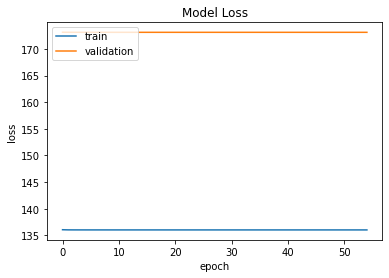

[I 2022-05-26 05:41:15,996] Trial 42 finished with value: 158.44547199228805 and parameters: {'filters1': 20, 'kernel_size': 16, 'activation1': 'relu', 'filters2': 240, 'activation2': 'relu', 'filters3': 300, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.001292003777161663, 'batch_size': 12}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
1308/1308 - 20s - loss: 135.4348 - mse: 19165.9336 - val_loss: 172.1824 - val_mse: 30871.4746 - lr: 3.6391e-04 - 20s/epoch - 15ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
1308/1308 - 12s - loss: 135.4254 - mse: 19163.4395 - val_loss: 172.1802 - val_mse: 30870.6797 - lr: 3.6391e-04 - 12s/epoch - 9ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
1308/1308 - 13s - loss: 135.4241 - mse: 19163.1055 - val_loss: 172.1794 - val_mse: 30870.4551 - lr: 3.6391e-04 - 13s/epoch - 10ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
1308/1308 - 11s - loss: 135.4236 - mse: 19162.9824 - val_loss: 172.1791 - val_mse: 30870.3789 - lr: 3.6391e-04 - 11s/epoch - 9ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
1308/1308 - 12s - loss: 135.4235 - mse: 19162.9434 - val_loss: 172.1790 - val_mse: 30870.3203 - lr: 3.6391e-04 - 12s/epoch - 9ms/ste

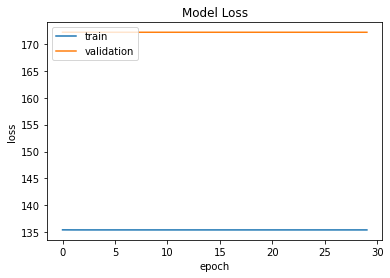

[I 2022-05-26 05:47:20,832] Trial 43 finished with value: 158.44546757601 and parameters: {'filters1': 290, 'kernel_size': 16, 'activation1': 'relu', 'filters2': 160, 'activation2': 'tanh', 'filters3': 380, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.00036390731577907873, 'batch_size': 2}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
872/872 - 26s - loss: 135.7343 - mse: 19207.2773 - val_loss: 172.4884 - val_mse: 30910.3281 - lr: 1.3938e-04 - 26s/epoch - 30ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
872/872 - 12s - loss: 135.6603 - mse: 19187.4199 - val_loss: 172.4432 - val_mse: 30894.7500 - lr: 1.3938e-04 - 12s/epoch - 14ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
872/872 - 11s - loss: 135.6261 - mse: 19178.2637 - val_loss: 172.4179 - val_mse: 30886.0156 - lr: 1.3938e-04 - 11s/epoch - 13ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
872/872 - 12s - loss: 135.6065 - mse: 19172.9668 - val_loss: 172.4026 - val_mse: 30880.7520 - lr: 1.3938e-04 - 12s/epoch - 14ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
872/872 - 12s - loss: 135.5943 - mse: 19169.6836 - val_loss: 172.3929 - val_mse: 30877.4160 - lr: 1.3938e-04 - 12s/epoch - 13ms/step
Epoch

Epoch 42/500

Epoch 00042: val_loss did not improve from 171.94044
872/872 - 10s - loss: 135.5690 - mse: 19162.8906 - val_loss: 172.3723 - val_mse: 30870.2910 - lr: 6.8296e-05 - 10s/epoch - 11ms/step
Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
872/872 - 12s - loss: 135.5690 - mse: 19162.8906 - val_loss: 172.3723 - val_mse: 30870.2910 - lr: 6.8296e-05 - 12s/epoch - 14ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
872/872 - 13s - loss: 135.5690 - mse: 19162.8906 - val_loss: 172.3723 - val_mse: 30870.2910 - lr: 6.8296e-05 - 13s/epoch - 15ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
872/872 - 13s - loss: 135.5690 - mse: 19162.8906 - val_loss: 172.3723 - val_mse: 30870.2910 - lr: 6.8296e-05 - 13s/epoch - 15ms/step


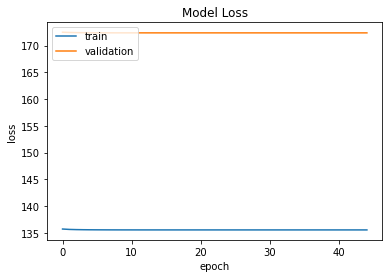

[I 2022-05-26 05:55:57,149] Trial 44 finished with value: 158.44546757601 and parameters: {'filters1': 660, 'kernel_size': 4, 'activation1': 'relu', 'filters2': 470, 'activation2': 'relu', 'filters3': 350, 'activation3': 'relu', 'optimizer_name': 'Adam', 'learning_rate': 0.0001393785934396437, 'batch_size': 3}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
1308/1308 - 23s - loss: 135.4762 - mse: 19176.9121 - val_loss: 172.1998 - val_mse: 30877.4590 - lr: 3.4341e-04 - 23s/epoch - 18ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
1308/1308 - 11s - loss: 135.4360 - mse: 19166.2812 - val_loss: 172.1864 - val_mse: 30872.8652 - lr: 3.4341e-04 - 11s/epoch - 8ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
1308/1308 - 11s - loss: 135.4283 - mse: 19164.2559 - val_loss: 172.1823 - val_mse: 30871.4375 - lr: 3.4341e-04 - 11s/epoch - 8ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
1308/1308 - 11s - loss: 135.4258 - mse: 19163.5469 - val_loss: 172.1806 - val_mse: 30870.8633 - lr: 3.4341e-04 - 11s/epoch - 9ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
1308/1308 - 11s - loss: 135.4245 - mse: 19163.2305 - val_loss: 172.1799 - val_mse: 30870.5879 - lr: 3.4341e-04 - 11s/epoch - 8ms/step

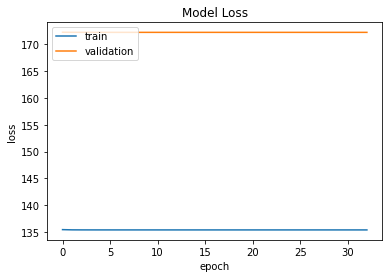

[I 2022-05-26 06:01:50,724] Trial 45 finished with value: 158.44546757601 and parameters: {'filters1': 580, 'kernel_size': 4, 'activation1': 'relu', 'filters2': 160, 'activation2': 'tanh', 'filters3': 360, 'activation3': 'relu', 'optimizer_name': 'Adam', 'learning_rate': 0.0003434123036525227, 'batch_size': 2}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
1308/1308 - 33s - loss: 135.4867 - mse: 19179.8340 - val_loss: 172.2152 - val_mse: 30882.7617 - lr: 1.1783e-04 - 33s/epoch - 25ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
1308/1308 - 14s - loss: 135.4489 - mse: 19169.7070 - val_loss: 172.1965 - val_mse: 30876.3398 - lr: 1.1783e-04 - 14s/epoch - 11ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
1308/1308 - 14s - loss: 135.4362 - mse: 19166.3750 - val_loss: 172.1884 - val_mse: 30873.5312 - lr: 1.1783e-04 - 14s/epoch - 11ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
1308/1308 - 15s - loss: 135.4304 - mse: 19164.8125 - val_loss: 172.1842 - val_mse: 30872.1152 - lr: 1.1783e-04 - 15s/epoch - 11ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
1308/1308 - 14s - loss: 135.4273 - mse: 19163.9883 - val_loss: 172.1819 - val_mse: 30871.3398 - lr: 1.1783e-04 - 14s/epoch - 11ms/

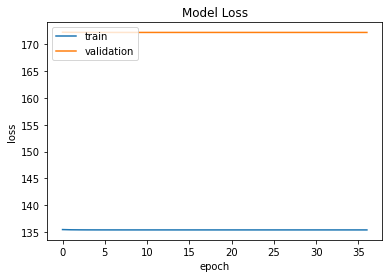

[I 2022-05-26 06:11:00,157] Trial 46 finished with value: 158.44546757601 and parameters: {'filters1': 600, 'kernel_size': 4, 'activation1': 'relu', 'filters2': 330, 'activation2': 'tanh', 'filters3': 350, 'activation3': 'relu', 'optimizer_name': 'Adam', 'learning_rate': 0.00011783368695424506, 'batch_size': 2}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
436/436 - 19s - loss: 135.9323 - mse: 19198.8418 - val_loss: 172.8606 - val_mse: 30895.6797 - lr: 6.2766e-05 - 19s/epoch - 44ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
436/436 - 6s - loss: 135.8631 - mse: 19181.4570 - val_loss: 172.8506 - val_mse: 30892.2266 - lr: 6.2766e-05 - 6s/epoch - 15ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
436/436 - 7s - loss: 135.8538 - mse: 19178.9258 - val_loss: 172.8420 - val_mse: 30889.2930 - lr: 6.2766e-05 - 7s/epoch - 15ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
436/436 - 6s - loss: 135.8459 - mse: 19176.8027 - val_loss: 172.8348 - val_mse: 30886.7637 - lr: 6.2766e-05 - 6s/epoch - 13ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
436/436 - 5s - loss: 135.8391 - mse: 19174.9707 - val_loss: 172.8286 - val_mse: 30884.6172 - lr: 6.2766e-05 - 5s/epoch - 11ms/step
Epoch 6/500



Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
436/436 - 7s - loss: 135.7949 - mse: 19163.0020 - val_loss: 172.7874 - val_mse: 30870.3848 - lr: 6.2766e-05 - 7s/epoch - 16ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
436/436 - 6s - loss: 135.7949 - mse: 19162.9902 - val_loss: 172.7874 - val_mse: 30870.3770 - lr: 6.2766e-05 - 6s/epoch - 14ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
436/436 - 7s - loss: 135.7949 - mse: 19162.9746 - val_loss: 172.7874 - val_mse: 30870.3672 - lr: 6.2766e-05 - 7s/epoch - 15ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 171.94044
436/436 - 7s - loss: 135.7949 - mse: 19162.9648 - val_loss: 172.7873 - val_mse: 30870.3613 - lr: 6.2766e-05 - 7s/epoch - 16ms/step
Epoch 47/500

Epoch 00047: val_loss did not improve from 171.94044
436/436 - 7s - loss: 135.7948 - mse: 19162.9570 - val_loss: 172.7873 - val_mse: 30870.3516 - lr: 6.2766e-05 - 7s/epoch - 15ms/step
Epoch 48/5

Epoch 83/500

Epoch 00083: val_loss did not improve from 171.94044
436/436 - 8s - loss: 135.7946 - mse: 19162.9004 - val_loss: 172.7871 - val_mse: 30870.2871 - lr: 1.5070e-05 - 8s/epoch - 17ms/step
Epoch 84/500

Epoch 00084: val_loss did not improve from 171.94044
436/436 - 7s - loss: 135.7946 - mse: 19162.9004 - val_loss: 172.7871 - val_mse: 30870.2871 - lr: 1.5070e-05 - 7s/epoch - 16ms/step
Epoch 85/500

Epoch 00085: val_loss did not improve from 171.94044
436/436 - 8s - loss: 135.7946 - mse: 19162.9004 - val_loss: 172.7871 - val_mse: 30870.2871 - lr: 1.5070e-05 - 8s/epoch - 19ms/step
Epoch 86/500

Epoch 00086: val_loss did not improve from 171.94044
436/436 - 8s - loss: 135.7946 - mse: 19162.9004 - val_loss: 172.7871 - val_mse: 30870.2852 - lr: 1.5070e-05 - 8s/epoch - 18ms/step
Epoch 87/500

Epoch 00087: val_loss did not improve from 171.94044
436/436 - 7s - loss: 135.7946 - mse: 19162.8984 - val_loss: 172.7871 - val_mse: 30870.2852 - lr: 1.5070e-05 - 7s/epoch - 16ms/step
Epoch 88/5

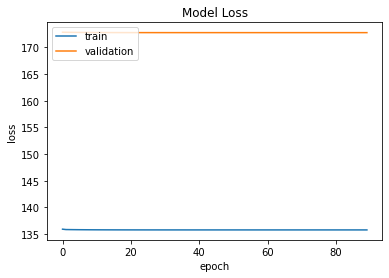

[I 2022-05-26 06:20:48,212] Trial 47 finished with value: 158.44547376803965 and parameters: {'filters1': 800, 'kernel_size': 18, 'activation1': 'relu', 'filters2': 70, 'activation2': 'relu', 'filters3': 310, 'activation3': 'relu', 'optimizer_name': 'Adam', 'learning_rate': 6.276568089668291e-05, 'batch_size': 6}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
654/654 - 27s - loss: 135.6717 - mse: 19167.0957 - val_loss: 172.5907 - val_mse: 30871.0977 - lr: 0.0033 - 27s/epoch - 41ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
654/654 - 9s - loss: 135.6570 - mse: 19163.2559 - val_loss: 172.5891 - val_mse: 30870.5527 - lr: 0.0033 - 9s/epoch - 14ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
654/654 - 8s - loss: 135.6562 - mse: 19163.0391 - val_loss: 172.5887 - val_mse: 30870.4219 - lr: 0.0033 - 8s/epoch - 12ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
654/654 - 9s - loss: 135.6559 - mse: 19162.9805 - val_loss: 172.5885 - val_mse: 30870.3633 - lr: 0.0033 - 9s/epoch - 13ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
654/654 - 9s - loss: 135.6558 - mse: 19162.9434 - val_loss: 172.5885 - val_mse: 30870.3359 - lr: 0.0033 - 9s/epoch - 14ms/step
Epoch 6/500

Epoch 00006: val_los

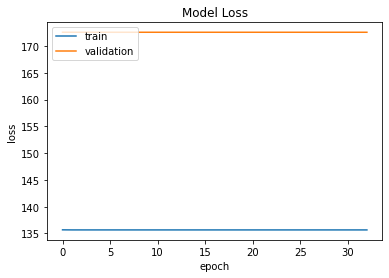

[I 2022-05-26 06:25:34,276] Trial 48 finished with value: 158.44546757601 and parameters: {'filters1': 510, 'kernel_size': 10, 'activation1': 'relu', 'filters2': 250, 'activation2': 'relu', 'filters3': 210, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.003304632091949661, 'batch_size': 4}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
291/291 - 10s - loss: 135.9647 - mse: 19165.5605 - val_loss: 172.9737 - val_mse: 30870.3027 - lr: 0.0058 - 10s/epoch - 33ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
291/291 - 3s - loss: 135.9544 - mse: 19162.8984 - val_loss: 172.9737 - val_mse: 30870.2871 - lr: 0.0058 - 3s/epoch - 10ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
291/291 - 2s - loss: 135.9544 - mse: 19162.8984 - val_loss: 172.9737 - val_mse: 30870.2871 - lr: 0.0058 - 2s/epoch - 7ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
291/291 - 2s - loss: 135.9544 - mse: 19162.8965 - val_loss: 172.9737 - val_mse: 30870.2852 - lr: 0.0058 - 2s/epoch - 7ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
291/291 - 4s - loss: 135.9544 - mse: 19162.8965 - val_loss: 172.9737 - val_mse: 30870.2852 - lr: 0.0058 - 4s/epoch - 13ms/step
Epoch 6/500

Epoch 00006: val_loss 

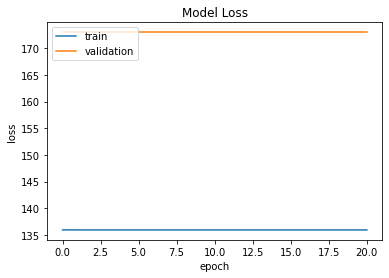

[I 2022-05-26 06:26:58,936] Trial 49 finished with value: 158.44546890694892 and parameters: {'filters1': 500, 'kernel_size': 6, 'activation1': 'tanh', 'filters2': 260, 'activation2': 'relu', 'filters3': 200, 'activation3': 'tanh', 'optimizer_name': 'RMSprop', 'learning_rate': 0.005796956142919434, 'momentum': 0.1794602457509201, 'batch_size': 9}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
524/524 - 21s - loss: 135.8761 - mse: 19200.2852 - val_loss: 172.7397 - val_mse: 30887.5723 - lr: 0.0020 - 21s/epoch - 41ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
524/524 - 5s - loss: 135.7646 - mse: 19170.9707 - val_loss: 172.7080 - val_mse: 30876.6113 - lr: 0.0020 - 5s/epoch - 9ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
524/524 - 4s - loss: 135.7474 - mse: 19166.4219 - val_loss: 172.6990 - val_mse: 30873.5195 - lr: 0.0020 - 4s/epoch - 8ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
524/524 - 5s - loss: 135.7415 - mse: 19164.8379 - val_loss: 172.6953 - val_mse: 30872.2109 - lr: 0.0020 - 5s/epoch - 9ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
524/524 - 5s - loss: 135.7388 - mse: 19164.1152 - val_loss: 172.6933 - val_mse: 30871.5293 - lr: 0.0020 - 5s/epoch - 9ms/step
Epoch 6/500

Epoch 00006: val_loss di

Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
524/524 - 5s - loss: 135.7342 - mse: 19162.9043 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 7.0124e-04 - 5s/epoch - 10ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
524/524 - 6s - loss: 135.7342 - mse: 19162.9043 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 7.0124e-04 - 6s/epoch - 11ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
524/524 - 4s - loss: 135.7342 - mse: 19162.9043 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 7.0124e-04 - 4s/epoch - 8ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 171.94044
524/524 - 5s - loss: 135.7342 - mse: 19162.9043 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 7.0124e-04 - 5s/epoch - 10ms/step
Epoch 47/500

Epoch 00047: val_loss did not improve from 171.94044
524/524 - 6s - loss: 135.7342 - mse: 19162.9043 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 7.0124e-04 - 6s/epoch - 11ms/step
Epoch 48/50

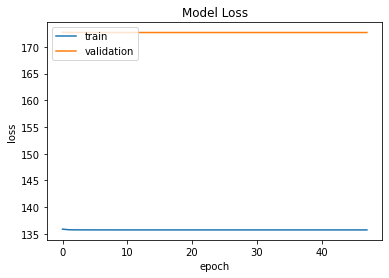

[I 2022-05-26 06:31:42,341] Trial 50 finished with value: 158.44546757601 and parameters: {'filters1': 90, 'kernel_size': 14, 'activation1': 'relu', 'filters2': 310, 'activation2': 'relu', 'filters3': 270, 'activation3': 'relu', 'optimizer_name': 'Adam', 'learning_rate': 0.0020444177173595253, 'batch_size': 5}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
654/654 - 18s - loss: 135.6928 - mse: 19172.8027 - val_loss: 172.6010 - val_mse: 30874.6914 - lr: 8.6698e-04 - 18s/epoch - 28ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
654/654 - 4s - loss: 135.6635 - mse: 19164.9961 - val_loss: 172.5932 - val_mse: 30871.9785 - lr: 8.6698e-04 - 4s/epoch - 6ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
654/654 - 4s - loss: 135.6590 - mse: 19163.8379 - val_loss: 172.5908 - val_mse: 30871.1445 - lr: 8.6698e-04 - 4s/epoch - 6ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
654/654 - 4s - loss: 135.6575 - mse: 19163.4160 - val_loss: 172.5898 - val_mse: 30870.8008 - lr: 8.6698e-04 - 4s/epoch - 6ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
654/654 - 5s - loss: 135.6567 - mse: 19163.2012 - val_loss: 172.5892 - val_mse: 30870.6094 - lr: 8.6698e-04 - 5s/epoch - 7ms/step
Epoch 6/500

Epoc

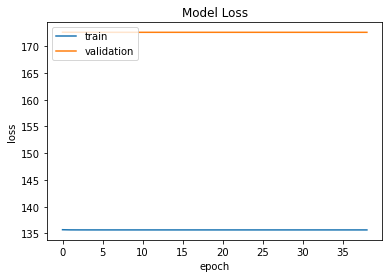

[I 2022-05-26 06:35:33,241] Trial 51 finished with value: 158.44546757601 and parameters: {'filters1': 240, 'kernel_size': 16, 'activation1': 'relu', 'filters2': 190, 'activation2': 'tanh', 'filters3': 60, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.0008669831446678556, 'batch_size': 4}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
374/374 - 16s - loss: 135.8888 - mse: 19169.3320 - val_loss: 172.8114 - val_mse: 30872.4102 - lr: 0.0020 - 16s/epoch - 42ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
374/374 - 3s - loss: 135.8681 - mse: 19163.8867 - val_loss: 172.8076 - val_mse: 30871.0664 - lr: 0.0020 - 3s/epoch - 7ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
374/374 - 2s - loss: 135.8661 - mse: 19163.3418 - val_loss: 172.8065 - val_mse: 30870.7012 - lr: 0.0020 - 2s/epoch - 6ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
374/374 - 2s - loss: 135.8653 - mse: 19163.1523 - val_loss: 172.8060 - val_mse: 30870.5352 - lr: 0.0020 - 2s/epoch - 5ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
374/374 - 2s - loss: 135.8649 - mse: 19163.0625 - val_loss: 172.8058 - val_mse: 30870.4590 - lr: 0.0020 - 2s/epoch - 6ms/step
Epoch 6/500

Epoch 00006: val_loss di

Epoch 42/500

Epoch 00042: val_loss did not improve from 171.94044
374/374 - 4s - loss: 135.8643 - mse: 19162.8984 - val_loss: 172.8053 - val_mse: 30870.2930 - lr: 6.6899e-04 - 4s/epoch - 11ms/step
Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044
374/374 - 3s - loss: 135.8643 - mse: 19162.8984 - val_loss: 172.8053 - val_mse: 30870.2930 - lr: 6.6899e-04 - 3s/epoch - 8ms/step


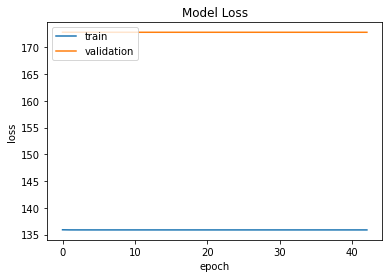

[I 2022-05-26 06:38:26,904] Trial 52 finished with value: 158.44546804074443 and parameters: {'filters1': 80, 'kernel_size': 14, 'activation1': 'relu', 'filters2': 310, 'activation2': 'tanh', 'filters3': 260, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.001950411413165007, 'batch_size': 7}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
2616/2616 - 67s - loss: 135.2833 - mse: 19174.7012 - val_loss: 171.9488 - val_mse: 30873.1719 - lr: 6.9338e-04 - 67s/epoch - 26ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
2616/2616 - 48s - loss: 135.2413 - mse: 19163.9883 - val_loss: 171.9421 - val_mse: 30870.8711 - lr: 6.9338e-04 - 48s/epoch - 18ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
2616/2616 - 53s - loss: 135.2381 - mse: 19163.1523 - val_loss: 171.9408 - val_mse: 30870.4336 - lr: 6.9338e-04 - 53s/epoch - 20ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
2616/2616 - 54s - loss: 135.2375 - mse: 19162.9746 - val_loss: 171.9405 - val_mse: 30870.3125 - lr: 6.9338e-04 - 54s/epoch - 21ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
2616/2616 - 54s - loss: 135.2374 - mse: 19162.9141 - val_loss: 171.9405 - val_mse: 30870.2812 - lr: 6.9338e-04 - 54s/epoch - 21ms/

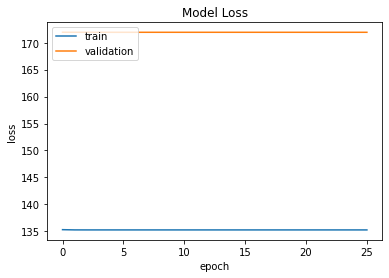

[I 2022-05-26 07:01:58,727] Trial 53 finished with value: 158.44546757601 and parameters: {'filters1': 720, 'kernel_size': 8, 'activation1': 'relu', 'filters2': 700, 'activation2': 'relu', 'filters3': 610, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.0006933828462397245, 'batch_size': 1}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
2616/2616 - 66s - loss: 135.2419 - mse: 19164.1152 - val_loss: 171.9406 - val_mse: 30870.3457 - lr: 0.0051 - 66s/epoch - 25ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
2616/2616 - 52s - loss: 135.2374 - mse: 19162.9199 - val_loss: 171.9405 - val_mse: 30870.2812 - lr: 0.0051 - 52s/epoch - 20ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
2616/2616 - 44s - loss: 135.2374 - mse: 19162.9043 - val_loss: 171.9404 - val_mse: 30870.2754 - lr: 0.0051 - 44s/epoch - 17ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
2616/2616 - 37s - loss: 135.2374 - mse: 19162.8984 - val_loss: 171.9404 - val_mse: 30870.2695 - lr: 0.0051 - 37s/epoch - 14ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
2616/2616 - 44s - loss: 135.2374 - mse: 19162.8965 - val_loss: 171.9404 - val_mse: 30870.2695 - lr: 0.0051 - 44s/epoch - 17ms/step
Epoch 6/500

Ep

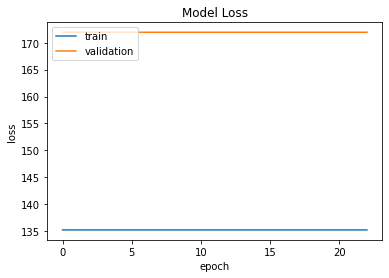

[I 2022-05-26 07:19:38,189] Trial 54 finished with value: 158.44546757601 and parameters: {'filters1': 440, 'kernel_size': 8, 'activation1': 'relu', 'filters2': 740, 'activation2': 'relu', 'filters3': 790, 'activation3': 'relu', 'optimizer_name': 'Adam', 'learning_rate': 0.005088070095370189, 'batch_size': 1}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
872/872 - 29s - loss: 135.6125 - mse: 19174.1660 - val_loss: 172.3828 - val_mse: 30873.9121 - lr: 9.9699e-04 - 29s/epoch - 33ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
872/872 - 15s - loss: 135.5750 - mse: 19164.4902 - val_loss: 172.3757 - val_mse: 30871.4609 - lr: 9.9699e-04 - 15s/epoch - 18ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
872/872 - 15s - loss: 135.5714 - mse: 19163.5410 - val_loss: 172.3739 - val_mse: 30870.8379 - lr: 9.9699e-04 - 15s/epoch - 17ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
872/872 - 15s - loss: 135.5702 - mse: 19163.2051 - val_loss: 172.3732 - val_mse: 30870.5957 - lr: 9.9699e-04 - 15s/epoch - 18ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
872/872 - 16s - loss: 135.5696 - mse: 19163.0703 - val_loss: 172.3728 - val_mse: 30870.4609 - lr: 9.9699e-04 - 16s/epoch - 18ms/step
Epoch

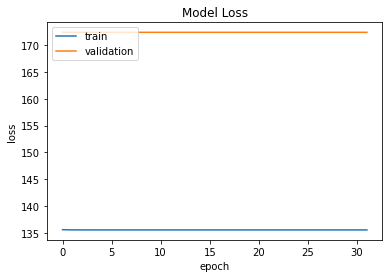

[I 2022-05-26 07:27:44,557] Trial 55 finished with value: 158.44546757601 and parameters: {'filters1': 340, 'kernel_size': 10, 'activation1': 'relu', 'filters2': 710, 'activation2': 'tanh', 'filters3': 600, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.0009969868459482555, 'batch_size': 3}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
2616/2616 - 59s - loss: 135.2399 - mse: 19163.5840 - val_loss: 171.9405 - val_mse: 30870.3027 - lr: 0.0058 - 59s/epoch - 23ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
2616/2616 - 53s - loss: 135.2374 - mse: 19162.9082 - val_loss: 171.9404 - val_mse: 30870.2754 - lr: 0.0058 - 53s/epoch - 20ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
2616/2616 - 53s - loss: 135.2374 - mse: 19162.9023 - val_loss: 171.9404 - val_mse: 30870.2695 - lr: 0.0058 - 53s/epoch - 20ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
2616/2616 - 52s - loss: 135.2374 - mse: 19162.8965 - val_loss: 171.9404 - val_mse: 30870.2695 - lr: 0.0058 - 52s/epoch - 20ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
2616/2616 - 53s - loss: 135.2374 - mse: 19162.8965 - val_loss: 171.9404 - val_mse: 30870.2695 - lr: 0.0058 - 53s/epoch - 20ms/step
Epoch 6/500

Ep

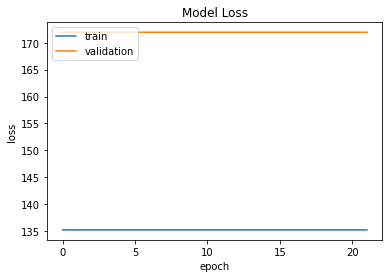

[I 2022-05-26 07:46:30,923] Trial 56 finished with value: 158.44546757601 and parameters: {'filters1': 440, 'kernel_size': 16, 'activation1': 'relu', 'filters2': 770, 'activation2': 'tanh', 'filters3': 790, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.005828251416465593, 'batch_size': 1}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
436/436 - 21s - loss: 135.8284 - mse: 19171.7734 - val_loss: 172.7984 - val_mse: 30874.1680 - lr: 9.7648e-04 - 21s/epoch - 48ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
436/436 - 10s - loss: 135.8015 - mse: 19164.7500 - val_loss: 172.7914 - val_mse: 30871.7734 - lr: 9.7648e-04 - 10s/epoch - 23ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
436/436 - 11s - loss: 135.7977 - mse: 19163.7383 - val_loss: 172.7894 - val_mse: 30871.0762 - lr: 9.7648e-04 - 11s/epoch - 24ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
436/436 - 10s - loss: 135.7963 - mse: 19163.3672 - val_loss: 172.7885 - val_mse: 30870.7617 - lr: 9.7648e-04 - 10s/epoch - 22ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
436/436 - 10s - loss: 135.7957 - mse: 19163.2070 - val_loss: 172.7880 - val_mse: 30870.6113 - lr: 9.7648e-04 - 10s/epoch - 24ms/step
Epoch

Epoch 41/500

Epoch 00041: val_loss did not improve from 171.94044
436/436 - 10s - loss: 135.7946 - mse: 19162.8984 - val_loss: 172.7871 - val_mse: 30870.2852 - lr: 3.3493e-04 - 10s/epoch - 22ms/step


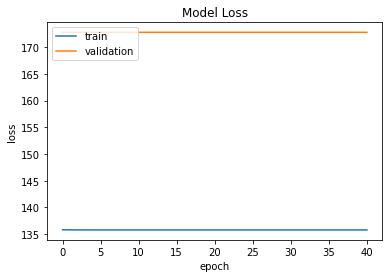

[I 2022-05-26 07:54:08,129] Trial 57 finished with value: 158.44546795213338 and parameters: {'filters1': 370, 'kernel_size': 16, 'activation1': 'relu', 'filters2': 780, 'activation2': 'tanh', 'filters3': 710, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.0009764834042382892, 'batch_size': 6}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
872/872 - 26s - loss: 135.5875 - mse: 19167.6699 - val_loss: 172.3742 - val_mse: 30870.9844 - lr: 0.0038 - 26s/epoch - 29ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
872/872 - 12s - loss: 135.5701 - mse: 19163.1836 - val_loss: 172.3729 - val_mse: 30870.5020 - lr: 0.0038 - 12s/epoch - 14ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
872/872 - 11s - loss: 135.5694 - mse: 19163.0059 - val_loss: 172.3726 - val_mse: 30870.3984 - lr: 0.0038 - 11s/epoch - 12ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
872/872 - 12s - loss: 135.5692 - mse: 19162.9434 - val_loss: 172.3724 - val_mse: 30870.3418 - lr: 0.0038 - 12s/epoch - 14ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
872/872 - 11s - loss: 135.5691 - mse: 19162.9199 - val_loss: 172.3724 - val_mse: 30870.3203 - lr: 0.0038 - 11s/epoch - 13ms/step
Epoch 6/500

Epoch 00006:

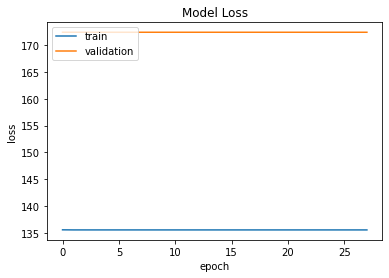

[I 2022-05-26 07:59:45,907] Trial 58 finished with value: 158.44546757601 and parameters: {'filters1': 530, 'kernel_size': 10, 'activation1': 'relu', 'filters2': 440, 'activation2': 'tanh', 'filters3': 190, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.003843724746861706, 'batch_size': 3}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
524/524 - 20s - loss: 135.7805 - mse: 19175.0312 - val_loss: 172.7011 - val_mse: 30874.2383 - lr: 0.0018 - 20s/epoch - 38ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
524/524 - 5s - loss: 135.7411 - mse: 19164.7012 - val_loss: 172.6937 - val_mse: 30871.6875 - lr: 0.0018 - 5s/epoch - 9ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
524/524 - 5s - loss: 135.7371 - mse: 19163.6680 - val_loss: 172.6917 - val_mse: 30870.9941 - lr: 0.0018 - 5s/epoch - 9ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
524/524 - 5s - loss: 135.7358 - mse: 19163.3281 - val_loss: 172.6909 - val_mse: 30870.6934 - lr: 0.0018 - 5s/epoch - 9ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
524/524 - 4s - loss: 135.7352 - mse: 19163.1523 - val_loss: 172.6905 - val_mse: 30870.5566 - lr: 0.0018 - 4s/epoch - 7ms/step
Epoch 6/500

Epoch 00006: val_loss di

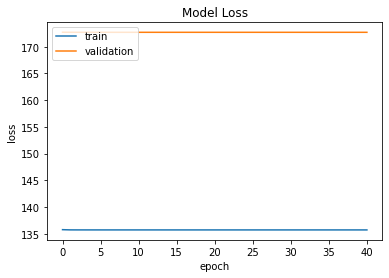

[I 2022-05-26 08:03:15,044] Trial 59 finished with value: 158.44546757601 and parameters: {'filters1': 120, 'kernel_size': 14, 'activation1': 'relu', 'filters2': 370, 'activation2': 'tanh', 'filters3': 160, 'activation3': 'relu', 'optimizer_name': 'Adam', 'learning_rate': 0.001823851243565371, 'batch_size': 5}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
524/524 - 22s - loss: 135.8193 - mse: 19185.6875 - val_loss: 172.7350 - val_mse: 30885.9785 - lr: 4.6562e-04 - 22s/epoch - 41ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
524/524 - 6s - loss: 135.7660 - mse: 19171.3926 - val_loss: 172.7116 - val_mse: 30877.8867 - lr: 4.6562e-04 - 6s/epoch - 11ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
524/524 - 6s - loss: 135.7510 - mse: 19167.3965 - val_loss: 172.7023 - val_mse: 30874.6660 - lr: 4.6562e-04 - 6s/epoch - 11ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
524/524 - 6s - loss: 135.7444 - mse: 19165.6113 - val_loss: 172.6976 - val_mse: 30873.0527 - lr: 4.6562e-04 - 6s/epoch - 11ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
524/524 - 5s - loss: 135.7408 - mse: 19164.6816 - val_loss: 172.6951 - val_mse: 30872.1621 - lr: 4.6562e-04 - 5s/epoch - 10ms/step
Epoch 6/500



Epoch 42/500

Epoch 00042: val_loss did not improve from 171.94044
524/524 - 6s - loss: 135.7342 - mse: 19162.9043 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 2.2816e-04 - 6s/epoch - 11ms/step
Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044

Epoch 00043: ReduceLROnPlateau reducing learning rate to 0.00015970890526659785.
524/524 - 6s - loss: 135.7342 - mse: 19162.9043 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 2.2816e-04 - 6s/epoch - 11ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
524/524 - 5s - loss: 135.7342 - mse: 19162.9043 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 1.5971e-04 - 5s/epoch - 9ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
524/524 - 5s - loss: 135.7342 - mse: 19162.9043 - val_loss: 172.6896 - val_mse: 30870.2871 - lr: 1.5971e-04 - 5s/epoch - 10ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 171.94044
524/524 - 5s - loss: 135.7342 - mse: 19162.9043 - val_loss: 

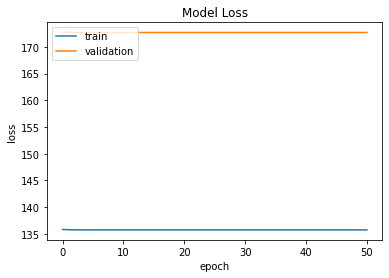

[I 2022-05-26 08:08:00,387] Trial 60 finished with value: 158.44546757601 and parameters: {'filters1': 140, 'kernel_size': 18, 'activation1': 'relu', 'filters2': 270, 'activation2': 'tanh', 'filters3': 460, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.0004656236117155746, 'batch_size': 5}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
872/872 - 26s - loss: 135.6088 - mse: 19173.1602 - val_loss: 172.3791 - val_mse: 30872.6582 - lr: 0.0019 - 26s/epoch - 30ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
872/872 - 12s - loss: 135.5729 - mse: 19163.9238 - val_loss: 172.3744 - val_mse: 30871.0254 - lr: 0.0019 - 12s/epoch - 14ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
872/872 - 11s - loss: 135.5705 - mse: 19163.2852 - val_loss: 172.3732 - val_mse: 30870.6328 - lr: 0.0019 - 11s/epoch - 12ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
872/872 - 12s - loss: 135.5697 - mse: 19163.0879 - val_loss: 172.3728 - val_mse: 30870.4746 - lr: 0.0019 - 12s/epoch - 14ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
872/872 - 12s - loss: 135.5694 - mse: 19163.0020 - val_loss: 172.3726 - val_mse: 30870.3984 - lr: 0.0019 - 12s/epoch - 14ms/step
Epoch 6/500

Epoch 00006:

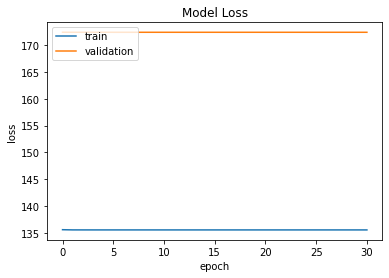

[I 2022-05-26 08:14:10,242] Trial 61 finished with value: 158.44546757601 and parameters: {'filters1': 650, 'kernel_size': 2, 'activation1': 'relu', 'filters2': 530, 'activation2': 'relu', 'filters3': 110, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.0018608671397370045, 'batch_size': 3}. Best is trial 2 with value: 158.44546757601.


Epoch 1/500

Epoch 00001: val_loss did not improve from 171.94044
654/654 - 10s - loss: 135.8056 - mse: 19202.9395 - val_loss: 172.6703 - val_mse: 30898.5957 - lr: 4.7674e-04 - 10s/epoch - 15ms/step
Epoch 2/500

Epoch 00002: val_loss did not improve from 171.94044
654/654 - 4s - loss: 135.7113 - mse: 19177.8066 - val_loss: 172.6258 - val_mse: 30883.2266 - lr: 4.7674e-04 - 4s/epoch - 6ms/step
Epoch 3/500

Epoch 00003: val_loss did not improve from 171.94044
654/654 - 5s - loss: 135.6835 - mse: 19170.3750 - val_loss: 172.6089 - val_mse: 30877.3945 - lr: 4.7674e-04 - 5s/epoch - 8ms/step
Epoch 4/500

Epoch 00004: val_loss did not improve from 171.94044
654/654 - 5s - loss: 135.6717 - mse: 19167.2227 - val_loss: 172.6008 - val_mse: 30874.5898 - lr: 4.7674e-04 - 5s/epoch - 8ms/step
Epoch 5/500

Epoch 00005: val_loss did not improve from 171.94044
654/654 - 6s - loss: 135.6657 - mse: 19165.6094 - val_loss: 172.5964 - val_mse: 30873.0742 - lr: 4.7674e-04 - 6s/epoch - 9ms/step
Epoch 6/500

Epoc

Epoch 42/500

Epoch 00042: val_loss did not improve from 171.94044
654/654 - 6s - loss: 135.6556 - mse: 19162.8984 - val_loss: 172.5883 - val_mse: 30870.2871 - lr: 2.3360e-04 - 6s/epoch - 9ms/step
Epoch 43/500

Epoch 00043: val_loss did not improve from 171.94044

Epoch 00043: ReduceLROnPlateau reducing learning rate to 0.00016352216189261524.
654/654 - 7s - loss: 135.6556 - mse: 19162.8984 - val_loss: 172.5883 - val_mse: 30870.2871 - lr: 2.3360e-04 - 7s/epoch - 11ms/step
Epoch 44/500

Epoch 00044: val_loss did not improve from 171.94044
654/654 - 6s - loss: 135.6556 - mse: 19162.8984 - val_loss: 172.5883 - val_mse: 30870.2871 - lr: 1.6352e-04 - 6s/epoch - 10ms/step
Epoch 45/500

Epoch 00045: val_loss did not improve from 171.94044
654/654 - 7s - loss: 135.6556 - mse: 19162.8984 - val_loss: 172.5883 - val_mse: 30870.2871 - lr: 1.6352e-04 - 7s/epoch - 11ms/step
Epoch 46/500

Epoch 00046: val_loss did not improve from 171.94044
654/654 - 7s - loss: 135.6556 - mse: 19162.8984 - val_loss: 

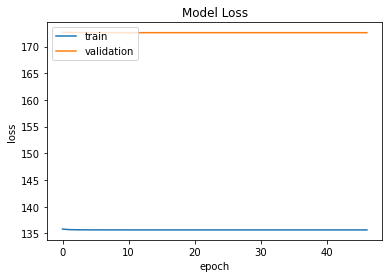

[I 2022-05-26 08:19:18,853] Trial 62 finished with value: 158.44546757601 and parameters: {'filters1': 180, 'kernel_size': 6, 'activation1': 'relu', 'filters2': 460, 'activation2': 'relu', 'filters3': 500, 'activation3': 'tanh', 'optimizer_name': 'Adam', 'learning_rate': 0.00047674100223811717, 'batch_size': 4}. Best is trial 2 with value: 158.44546757601.


In [34]:
study_name = "cnn_study_Kalbar_Opt_SILO"  # unique identifier of the study.
study = optuna.create_study(
    direction='minimize',
    study_name=study_name,
    load_if_exists=True,
)

study.optimize(objective, timeout=8*60*60) # Timeout in seconds e.g. timeout=20*60*60 

In [29]:
DNN_lr_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                     patience=8, verbose=2, factor=0.7,min_delta = 1e-04, cooldown = 0,min_lr =0)
callbacks = [EarlyStopping(monitor='val_loss', patience=50),
             ModelCheckpoint(filepath='best_weights_CELM_Cornubia_SILO.h5',verbose=2,
                             monitor='val_loss', save_best_only=True),DNN_lr_reduction]

In [30]:
#Define CNN Model

def generate_cnn():   
    model = Sequential()
    model.add(Conv1D(filters=20,input_shape=(X_train.shape[1],  X_train.shape[2]),kernel_size=10,activation='relu',
                     padding='same',kernel_initializer="glorot_uniform"))
    model.add(MaxPool1D(pool_size=1))
    model.add(Conv1D(filters=18,kernel_size=8,activation='relu',
                     padding='same',kernel_initializer="glorot_uniform"))
    model.add(MaxPool1D(pool_size=1))
    model.add(Conv1D(filters=14,kernel_size=6,activation='relu',
                     padding='same',kernel_initializer="glorot_uniform"))
    model.add(MaxPool1D(pool_size=1))
    model.add(Flatten(data_format=None,name='FLATTEN'))
    model.add(Dense(units=10,activation='relu')),
    model.add(Dense(units=1,activation='relu')),
    optimizer= RMSprop(learning_rate=0.001, momentum=0.009)
    print(model.summary())
    model.compile(loss='mse', optimizer=optimizer, metrics='mse')
    model.fit(X_train, y_train, epochs=1000,validation_split=0.2, batch_size=2, verbose=2,callbacks=callbacks)      
    return model


In [31]:
cnn = generate_cnn()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 20)             7020      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 20)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 18)             2898      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 18)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 14)             1526      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 14)            0

Epoch 29/1000

Epoch 00029: val_loss did not improve from 380.90836
1308/1308 - 2s - loss: 293.4588 - mse: 293.4588 - val_loss: 381.6649 - val_mse: 381.6649 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 30/1000

Epoch 00030: val_loss did not improve from 380.90836
1308/1308 - 2s - loss: 297.7837 - mse: 297.7837 - val_loss: 382.1727 - val_mse: 382.1727 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 31/1000

Epoch 00031: val_loss did not improve from 380.90836
1308/1308 - 2s - loss: 291.3205 - mse: 291.3205 - val_loss: 409.7867 - val_mse: 409.7867 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 32/1000

Epoch 00032: val_loss did not improve from 380.90836
1308/1308 - 2s - loss: 291.4522 - mse: 291.4522 - val_loss: 415.2650 - val_mse: 415.2650 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 33/1000

Epoch 00033: val_loss did not improve from 380.90836
1308/1308 - 2s - loss: 291.2111 - mse: 291.2111 - val_loss: 460.6319 - val_mse: 460.6319 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 34/1000

Epoch 00034: val_loss imp

Epoch 69/1000

Epoch 00069: val_loss did not improve from 327.20889
1308/1308 - 2s - loss: 267.8652 - mse: 267.8652 - val_loss: 411.1824 - val_mse: 411.1824 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 70/1000

Epoch 00070: val_loss did not improve from 327.20889
1308/1308 - 2s - loss: 266.2540 - mse: 266.2540 - val_loss: 405.5215 - val_mse: 405.5215 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 71/1000

Epoch 00071: val_loss did not improve from 327.20889
1308/1308 - 2s - loss: 270.0062 - mse: 270.0062 - val_loss: 436.8012 - val_mse: 436.8012 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 72/1000

Epoch 00072: val_loss did not improve from 327.20889
1308/1308 - 2s - loss: 269.7212 - mse: 269.7212 - val_loss: 368.3976 - val_mse: 368.3976 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 73/1000

Epoch 00073: val_loss improved from 327.20889 to 323.06125, saving model to best_weights_CELM_Cornubia_SILO.h5
1308/1308 - 2s - loss: 266.2992 - mse: 266.2992 - val_loss: 323.0612 - val_mse: 323.0612 - lr: 0.0010 - 2s

Epoch 109/1000

Epoch 00109: val_loss did not improve from 315.63541
1308/1308 - 2s - loss: 244.1144 - mse: 244.1144 - val_loss: 317.7200 - val_mse: 317.7200 - lr: 3.4300e-04 - 2s/epoch - 2ms/step
Epoch 110/1000

Epoch 00110: val_loss did not improve from 315.63541
1308/1308 - 2s - loss: 246.0946 - mse: 246.0946 - val_loss: 316.6227 - val_mse: 316.6227 - lr: 3.4300e-04 - 2s/epoch - 1ms/step
Epoch 111/1000

Epoch 00111: val_loss did not improve from 315.63541
1308/1308 - 2s - loss: 247.3332 - mse: 247.3332 - val_loss: 337.9273 - val_mse: 337.9273 - lr: 3.4300e-04 - 2s/epoch - 1ms/step
Epoch 112/1000

Epoch 00112: val_loss did not improve from 315.63541
1308/1308 - 2s - loss: 246.7885 - mse: 246.7885 - val_loss: 354.9724 - val_mse: 354.9724 - lr: 3.4300e-04 - 2s/epoch - 1ms/step
Epoch 113/1000

Epoch 00113: val_loss did not improve from 315.63541

Epoch 00113: ReduceLROnPlateau reducing learning rate to 0.00024009999469853935.
1308/1308 - 2s - loss: 245.8942 - mse: 245.8942 - val_loss: 3

Epoch 149/1000

Epoch 00149: val_loss did not improve from 309.94278

Epoch 00149: ReduceLROnPlateau reducing learning rate to 8.235429777414538e-05.
1308/1308 - 2s - loss: 239.4008 - mse: 239.4008 - val_loss: 335.7006 - val_mse: 335.7006 - lr: 1.1765e-04 - 2s/epoch - 1ms/step
Epoch 150/1000

Epoch 00150: val_loss did not improve from 309.94278
1308/1308 - 2s - loss: 239.3919 - mse: 239.3919 - val_loss: 321.1330 - val_mse: 321.1330 - lr: 8.2354e-05 - 2s/epoch - 1ms/step
Epoch 151/1000

Epoch 00151: val_loss did not improve from 309.94278
1308/1308 - 2s - loss: 239.6008 - mse: 239.6008 - val_loss: 317.7107 - val_mse: 317.7107 - lr: 8.2354e-05 - 2s/epoch - 1ms/step
Epoch 152/1000

Epoch 00152: val_loss did not improve from 309.94278
1308/1308 - 2s - loss: 239.2634 - mse: 239.2634 - val_loss: 323.1944 - val_mse: 323.1944 - lr: 8.2354e-05 - 2s/epoch - 1ms/step
Epoch 153/1000

Epoch 00153: val_loss did not improve from 309.94278
1308/1308 - 2s - loss: 239.1855 - mse: 239.1855 - val_loss: 31

In [32]:
from tensorflow.keras.models import load_model
cnn =load_model('best_weights_CELM_Cornubia_SILO.h5')
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 20)             7020      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 20)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 18)             2898      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 18)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 14)             1526      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 14)            0

In [33]:
#Define Hidden Layer
#The Hidden Layer is the layer between CNN and ELM
layer_name = 'FLATTEN'
hidden_layer_model = tf.keras.Model(inputs=cnn.input, outputs=cnn.get_layer(layer_name).output)
Train= hidden_layer_model.predict(X_train)
Test= hidden_layer_model.predict(X_test)

In [34]:
Train.shape,Test.shape

((3270, 14), (365, 14))

In [35]:
from ELM_REG import ELM

In [36]:
def get_ELM(k, hidden, X_train, y_train, num_classes=1):
    input_length = k
    num_hidden_layers = hidden

    model = ELM(input_length,
                num_hidden_layers,
                num_classes)
    
    model.fit(X_train, y_train, display_time=False)
    return model

In [37]:
model = get_ELM(14, 10, Train, y_train )

In [38]:
prediction = model(Test)

In [39]:
prediction.shape

(365,)

In [40]:
YP=prediction
YT=y_test

In [41]:
import PIALL
PIALL_Test_ESN=PIALL.PI(YT.flatten(),YP.flatten())
PIALL_Test_ESN

,R2,WI,LM,NS,KGE,RMSE,RRMSE,MAE,RMAE,APB,MAPE
0,0.677182,0.90316,0.343679,0.556892,0.776484,20.674694,10.632121,16.365451,8.672091,8.416059,0.097514


In [42]:
from sklearn.svm import SVC

from hyperopt import fmin, tpe, hp, SparkTrials, STATUS_OK, Trials
from math import sqrt


In [43]:
def Obj(params):
    model = ELM(**params,num_input_nodes=14,num_out_units=1)
    model.fit(Train, y_train, display_time=False)
    y_pred = model(Test)
    score = sqrt(mean_squared_error(y_test, y_pred))
    print(score)
    return {'loss': score, 'status': STATUS_OK,'Trained_Model': model} 

In [44]:
# kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, 
# epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1
space ={

        'num_hidden_units': hp.choice('num_hidden_units',np.arange(1,1000 , 5, dtype=int)),
        'activation':hp.choice('num_input_nodes', ['sigmoid','hardlimit','fourier'])
    }

In [45]:
def optimize(trials, space):
    
    best = fmin(Obj, space, algo=tpe.suggest, max_evals=500)
    return best

trials = Trials()


best_params = optimize(trials, space)


41.25004152937773                                                                                                      
15624.707124148446                                                                                                     
44.82763922096702                                                                                                      
44.93206620027678                                                                                                      
3831345.5792503143                                                                                                     
44.369950225047354                                                                                                     
42.67485531732331                                                                                                      
44.893712844452715                                                                                                     
41.4728577523121                        

38472244.51821667                                                                                                      
44.99046560295226                                                                                                      
128.22268932505418                                                                                                     
44.402962830911406                                                                                                     
44.5800335676591                                                                                                       
44.72094786601803                                                                                                      
44.11065868572493                                                                                                      
4884633.124459022                                                                                                      
44.56134760394209                       

20.223435170806745                                                                                                     
554911.6305425605                                                                                                      
346.88436174501766                                                                                                     
9512.37041294273                                                                                                       
57.21468106875492                                                                                                      
26017.16595201226                                                                                                      
18511.87343661991                                                                                                      
31682152.09769107                                                                                                      
499188.3323219428                       

794.0253311289358                                                                                                      
371.04369072978994                                                                                                     
478.76964437473964                                                                                                     
1198.8232848872874                                                                                                     
372.9734702324274                                                                                                      
244.94251081932427                                                                                                     
448.3866855979435                                                                                                      
789.0955493923749                                                                                                      
18512815.04347803                       

In [46]:
from hyperopt import hp, fmin, tpe, space_eval,Trials
# Return the best parameters
best_hp=space_eval(space, best_params)
best_hp

{'activation': 'fourier', 'num_hidden_units': 51}

In [47]:
model2 = ELM(num_input_nodes=14, num_hidden_units=51, num_out_units=1, activation='fourier',
                 loss='mse', beta_init=None, w_init=None, bias_init=None)

In [48]:
model2.fit(Train, y_train, display_time=False)

In [49]:
prediction = model2(Test)

In [50]:
YP=prediction
YT=y_test

In [51]:
import PIALL
PIALL_Test_CELM=PIALL.PI(YT.flatten(),YP.flatten())
PIALL_Test_CELM

,R2,WI,LM,NS,KGE,RMSE,RRMSE,MAE,RMAE,APB,MAPE
0,0.72652,0.918456,0.396291,0.621746,0.787827,19.029304,9.803108,15.335449,8.136898,7.900188,0.090587


In [58]:
os.chdir("C:\\Users\\SUJANPC\\Documents\\Energies\\EP2")
TEST=pd.DataFrame([YP.flatten(),YT.flatten()]).T
TEST.columns=['CELM','YTEST']
writer = pd.ExcelWriter('EP2_Cornubia_CELM.xlsx', engine='xlsxwriter')
TEST.to_excel(writer, sheet_name='TEST_Result')
PIALL_Test_CELM.to_excel(writer, sheet_name='PI')
writer.save()